In [82]:
from __future__ import division
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import pandas as pd
import numpy as np
import PIL
from IPython.display import display, Image
from glob import glob
import matplotlib.pyplot as plt
from scipy import ndimage

from sklearn import linear_model



# Config the matlotlib backend as plotting inline in IPython
%matplotlib inline

def img2array(im):
    if im.mode != 'L':
        im = im.convert(mode='L')
    return np.fromstring(im.tobytes(), dtype='uint8').reshape((im.size[1], im.size[0]))

def normalize(arr):
    ''' Function to normalize an input array to 0-1 '''
    arr_min = arr.min()
    arr_max = arr.max()
    return (arr - arr_min) / (arr_max - arr_min)

In [101]:
imagePath = './sampleCaptchas/input/input00.jpg'
targetPath = './sampleCaptchas/output/output00.txt'
target = file(targetPath)
target = target.readline().replace('\n','')
target

'EGYK4'

In [86]:
img = img2array(PIL.Image.open(imagePath))

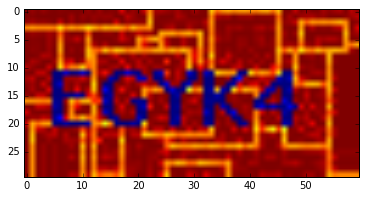

In [87]:

plt.figure()
plt.imshow(img)

5352.34196265


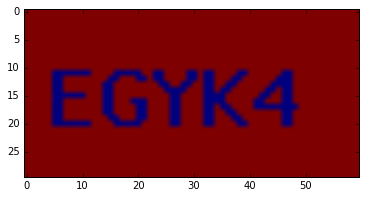

In [88]:
sd = ndimage.standard_deviation(img)
print (ndimage.variance(img))

def filterM(x):
    if x<sd:
        x = 0
    else:
        x = 255
    return x
img = ndimage.generic_filter(img,filterM,1)
plt.figure()
plt.imshow(img)

In [90]:
offset= ndimage.minimum_position(img)
offset

(11, 5)

C:\Users\alvaro.joao.silvino\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


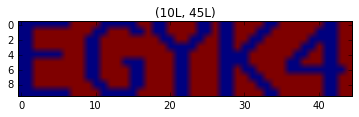

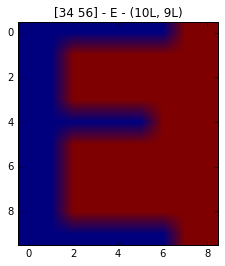

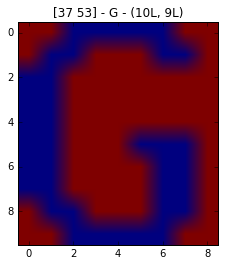

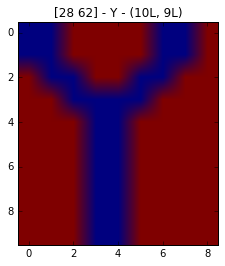

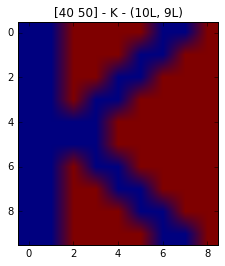

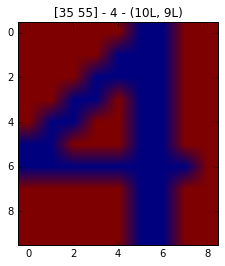

In [192]:
imgC = img[11:21,5:50]

plt.figure()
plt.imshow(imgC)
plt.title(str(imgC.shape))

division = imgC.shape[1]/5
for i in range(5):
    plt.figure()
    temp = imgC[:,i*division:(i+1)*division]
    plt.imshow(temp)
    hist = ndimage.histogram(temp,0,255,2)
    plt.title(str(hist)+' - '+ target[i]+' - '+str(temp.shape) )



In [183]:
def preProcessamento(img,target=None,flatten=True):
    sd = ndimage.standard_deviation(img)
    def filterM(x):
        if x<sd:
            x = 0
        else:
            x = 255
        return x
    img = ndimage.generic_filter(img,filterM,1)
    imgC = img[11:21,5:50]
    division = imgC.shape[1]/5
    result = []
    for i in range(5):
        temp = []
        if flatten:
            temp = imgC[:,i*division:(i+1)*division].flatten()
        else:
            temp = imgC[:,i*division:(i+1)*division]
        if not target is None:
            result.append((temp,target[i]))
        else:
            result.append(temp)

    return result

25 25
EGYK4


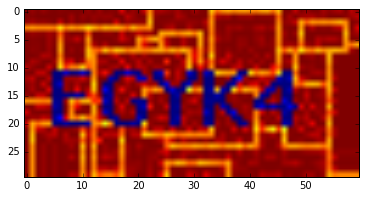

In [184]:
imagesPath = [ f for f in glob('sampleCaptchas/input/*.jpg')  ]
targetsPath = [ f for f in glob('sampleCaptchas/output/*.txt')  ]
images=[img2array(PIL.Image.open(path)) for path in imagesPath ]
targets=[file(path).readline().replace('\n','') for path in targetsPath ]
print(len(images),len(targets))
print(targets[0])
plt.figure()
plt.imshow(images[0])


In [185]:
dataset = []
for i in range(len(images)):
    datasetTemp = preProcessamento(images[i],targets[i])
    dataset = dataset + datasetTemp
    
imagesF,targetsF  = zip(*dataset)
imagesF = np.array(imagesF)
targetsF = np.array([ ord(i) for i in targetsF])



C:\Users\alvaro.joao.silvino\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:16: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [186]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(imagesF, targetsF)

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(imagesF, targetsF)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [187]:
testPath = [ f for f in glob('sampleCaptchas/test/*.jpg')  ]
imagesTest=[img2array(PIL.Image.open(path)) for path in testPath ]
dataset = []
for i in range(len(imagesTest)):
    datasetTemp = preProcessamento(imagesTest[i])
    dataset = dataset + datasetTemp




C:\Users\alvaro.joao.silvino\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:16: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


C:\Users\alvaro.joao.silvino\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\alvaro.joao.silvino\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\alvaro.joao.silvino\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape

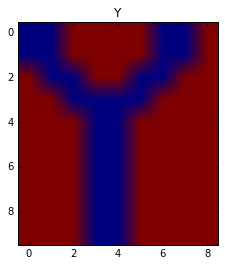

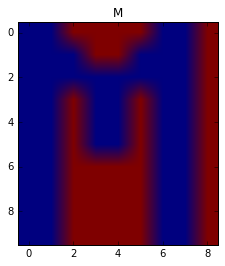

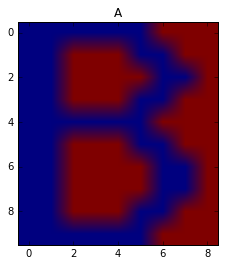

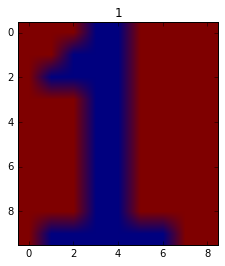

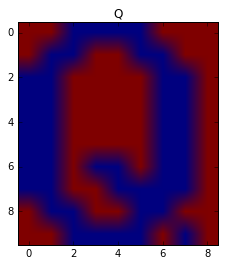

In [193]:
for i in range(len(dataset)):
    v = regr.predict(dataset[i])
    plt.figure()
    plt.imshow(dataset[i].reshape(10,9))
    plt.title(chr(v))

    

C:\Users\alvaro.joao.silvino\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\alvaro.joao.silvino\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\alvaro.joao.silvino\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape

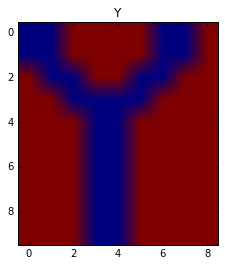

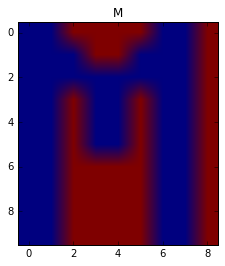

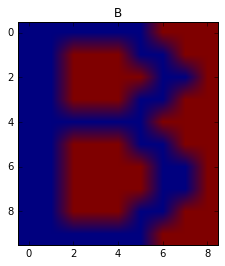

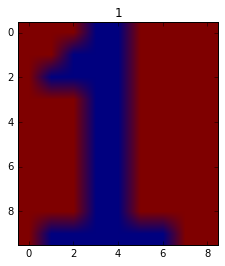

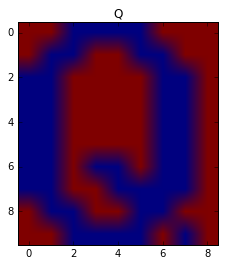

In [180]:
for i in range(len(dataset)):
    v = clf.predict(dataset[i])
    plt.figure()
    plt.imshow(dataset[i].reshape(10,9))
    plt.title(chr(v))

    

In [182]:
from sklearn.externals import joblib

joblib.dump(clf, 'file_name.pkl')

# load pickled model later
clf = joblib.load('file_name.pkl') 

In [196]:
import pickle

In [202]:
arr = pickle.dumps(clf,protocol=0)

In [205]:
arr2 = 'ccopy_reg\n_reconstructor\np0\n(csklearn.naive_bayes\nMultinomialNB\np1\nc__builtin__\nobject\np2\nNtp3\nRp4\n(dp5\nS\'class_log_prior_\'\np6\ncnumpy.core.multiarray\n_reconstruct\np7\n(cnumpy\nndarray\np8\n(I0\ntp9\nS\'b\'\np10\ntp11\nRp12\n(I1\n(L36L\ntp13\ncnumpy\ndtype\np14\n(S\'f8\'\np15\nI0\nI1\ntp16\nRp17\n(I3\nS\'<\'\np18\nNNNI-1\nI-1\nI0\ntp19\nbI00\nS\'\\xa9\\xe2\\x12\\x1ai\\x8a\\x10\\xc04\\x8d\\xed\\xf7A\\xc0\\t\\xc04\\x8d\\xed\\xf7A\\xc0\\t\\xc0\\xa9\\xe2\\x12\\x1ai\\x8a\\x10\\xc0\\xa9\\xe2\\x12\\x1ai\\x8a\\x10\\xc0H\\xd2\\x8d\\xb6m\\xd6\\r\\xc0H\\xd2\\x8d\\xb6m\\xd6\\r\\xc0\\xd66gtA\\x89\\x0b\\xc0\\xe7)\\xf2y1P\\x13\\xc04\\x8d\\xed\\xf7A\\xc0\\t\\xc0\\xd66gtA\\x89\\x0b\\xc0H\\xd2\\x8d\\xb6m\\xd6\\r\\xc04\\x8d\\xed\\xf7A\\xc0\\t\\xc04\\x8d\\xed\\xf7A\\xc0\\t\\xc0\\xcdC\\xcf\\xf6\\xdcJ\\x08\\xc0\\xe7)\\xf2y1P\\x13\\xc04\\x8d\\xed\\xf7A\\xc0\\t\\xc0\\xd66gtA\\x89\\x0b\\xc0\\xa9\\xe2\\x12\\x1ai\\x8a\\x10\\xc0H\\xd2\\x8d\\xb6m\\xd6\\r\\xc0H\\xd2\\x8d\\xb6m\\xd6\\r\\xc0H\\xd2\\x8d\\xb6m\\xd6\\r\\xc04\\x8d\\xed\\xf7A\\xc0\\t\\xc0\\xe7)\\xf2y1P\\x13\\xc0\\xcdC\\xcf\\xf6\\xdcJ\\x08\\xc0\\xe7)\\xf2y1P\\x13\\xc04\\x8d\\xed\\xf7A\\xc0\\t\\xc0H\\xd2\\x8d\\xb6m\\xd6\\r\\xc0\\xd66gtA\\x89\\x0b\\xc0\\xa9\\xe2\\x12\\x1ai\\x8a\\x10\\xc0\\xa9\\xe2\\x12\\x1ai\\x8a\\x10\\xc0\\xa2&\\xcb\\x9c)\\x0f\\x07\\xc0\\xd66gtA\\x89\\x0b\\xc0\\xa9\\xe2\\x12\\x1ai\\x8a\\x10\\xc0\\xa9\\xe2\\x12\\x1ai\\x8a\\x10\\xc04\\x8d\\xed\\xf7A\\xc0\\t\\xc0\'\np20\ntp21\nbsS\'feature_log_prob_\'\np22\ng7\n(g8\n(I0\ntp23\ng10\ntp24\nRp25\n(I1\n(L36L\nL90L\ntp26\ng17\nI00\nS\'\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\xde\\xb3\\xeap\\x0ct$\\xc0\\xde\\xb3\\xeap\\x0ct$\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\xde\\xb3\\xeap\\x0ct$\\xc0\\xde\\xb3\\xeap\\x0ct$\\xc0\\xde\\xb3\\xeap\\x0ct$\\xc0\\xde\\xb3\\xeap\\x0ct$\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\xde\\xb3\\xeap\\x0ct$\\xc0\\xde\\xb3\\xeap\\x0ct$\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\xde\\xb3\\xeap\\x0ct$\\xc0\\xde\\xb3\\xeap\\x0ct$\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\xde\\xb3\\xeap\\x0ct$\\xc0\\xde\\xb3\\xeap\\x0ct$\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\xde\\xb3\\xeap\\x0ct$\\xc0\\xde\\xb3\\xeap\\x0ct$\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\xde\\xb3\\xeap\\x0ct$\\xc0\\xde\\xb3\\xeap\\x0ct$\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\xde\\xb3\\xeap\\x0ct$\\xc0\\xde\\xb3\\xeap\\x0ct$\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\xde\\xb3\\xeap\\x0ct$\\xc0\\xde\\xb3\\xeap\\x0ct$\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\xde\\xb3\\xeap\\x0ct$\\xc0\\xde\\xb3\\xeap\\x0ct$\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\xde\\xb3\\xeap\\x0ct$\\xc0\\xde\\xb3\\xeap\\x0ct$\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\xde\\xb3\\xeap\\x0ct$\\xc0\\xde\\xb3\\xeap\\x0ct$\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\xde\\xb3\\xeap\\x0ct$\\xc0\\xde\\xb3\\xeap\\x0ct$\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\xde\\xb3\\xeap\\x0ct$\\xc0\\xde\\xb3\\xeap\\x0ct$\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\xde\\xb3\\xeap\\x0ct$\\xc0\\xde\\xb3\\xeap\\x0ct$\\xc0\\xde\\xb3\\xeap\\x0ct$\\xc0\\xde\\xb3\\xeap\\x0ct$\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\xde\\xb3\\xeap\\x0ct$\\xc0\\xde\\xb3\\xeap\\x0ct$\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0C\\x91\\x06\\xf1\\xe9\\x92\\x10\\xc0C\\x91\\x06\\xf1\\xe9\\x92\\x10\\xc0C\\x91\\x06\\xf1\\xe9\\x92\\x10\\xc0:\\xdd5y\\x04\\x97&\\xc0:\\xdd5y\\x04\\x97&\\xc0C\\x91\\x06\\xf1\\xe9\\x92\\x10\\xc0C\\x91\\x06\\xf1\\xe9\\x92\\x10\\xc0C\\x91\\x06\\xf1\\xe9\\x92\\x10\\xc0C\\x91\\x06\\xf1\\xe9\\x92\\x10\\xc0C\\x91\\x06\\xf1\\xe9\\x92\\x10\\xc0C\\x91\\x06\\xf1\\xe9\\x92\\x10\\xc0:\\xdd5y\\x04\\x97&\\xc0:\\xdd5y\\x04\\x97&\\xc0:\\xdd5y\\x04\\x97&\\xc0C\\x91\\x06\\xf1\\xe9\\x92\\x10\\xc0C\\x91\\x06\\xf1\\xe9\\x92\\x10\\xc0C\\x91\\x06\\xf1\\xe9\\x92\\x10\\xc0C\\x91\\x06\\xf1\\xe9\\x92\\x10\\xc0C\\x91\\x06\\xf1\\xe9\\x92\\x10\\xc0:\\xdd5y\\x04\\x97&\\xc0:\\xdd5y\\x04\\x97&\\xc0:\\xdd5y\\x04\\x97&\\xc0:\\xdd5y\\x04\\x97&\\xc0C\\x91\\x06\\xf1\\xe9\\x92\\x10\\xc0C\\x91\\x06\\xf1\\xe9\\x92\\x10\\xc0C\\x91\\x06\\xf1\\xe9\\x92\\x10\\xc0C\\x91\\x06\\xf1\\xe9\\x92\\x10\\xc0C\\x91\\x06\\xf1\\xe9\\x92\\x10\\xc0C\\x91\\x06\\xf1\\xe9\\x92\\x10\\xc0C\\x91\\x06\\xf1\\xe9\\x92\\x10\\xc0:\\xdd5y\\x04\\x97&\\xc0:\\xdd5y\\x04\\x97&\\xc0C\\x91\\x06\\xf1\\xe9\\x92\\x10\\xc0C\\x91\\x06\\xf1\\xe9\\x92\\x10\\xc0C\\x91\\x06\\xf1\\xe9\\x92\\x10\\xc0C\\x91\\x06\\xf1\\xe9\\x92\\x10\\xc0C\\x91\\x06\\xf1\\xe9\\x92\\x10\\xc0C\\x91\\x06\\xf1\\xe9\\x92\\x10\\xc0C\\x91\\x06\\xf1\\xe9\\x92\\x10\\xc0:\\xdd5y\\x04\\x97&\\xc0:\\xdd5y\\x04\\x97&\\xc0C\\x91\\x06\\xf1\\xe9\\x92\\x10\\xc0C\\x91\\x06\\xf1\\xe9\\x92\\x10\\xc0C\\x91\\x06\\xf1\\xe9\\x92\\x10\\xc0C\\x91\\x06\\xf1\\xe9\\x92\\x10\\xc0C\\x91\\x06\\xf1\\xe9\\x92\\x10\\xc0C\\x91\\x06\\xf1\\xe9\\x92\\x10\\xc0C\\x91\\x06\\xf1\\xe9\\x92\\x10\\xc0:\\xdd5y\\x04\\x97&\\xc0:\\xdd5y\\x04\\x97&\\xc0C\\x91\\x06\\xf1\\xe9\\x92\\x10\\xc0C\\x91\\x06\\xf1\\xe9\\x92\\x10\\xc0C\\x91\\x06\\xf1\\xe9\\x92\\x10\\xc0C\\x91\\x06\\xf1\\xe9\\x92\\x10\\xc0C\\x91\\x06\\xf1\\xe9\\x92\\x10\\xc0C\\x91\\x06\\xf1\\xe9\\x92\\x10\\xc0C\\x91\\x06\\xf1\\xe9\\x92\\x10\\xc0:\\xdd5y\\x04\\x97&\\xc0:\\xdd5y\\x04\\x97&\\xc0C\\x91\\x06\\xf1\\xe9\\x92\\x10\\xc0C\\x91\\x06\\xf1\\xe9\\x92\\x10\\xc0C\\x91\\x06\\xf1\\xe9\\x92\\x10\\xc0C\\x91\\x06\\xf1\\xe9\\x92\\x10\\xc0C\\x91\\x06\\xf1\\xe9\\x92\\x10\\xc0C\\x91\\x06\\xf1\\xe9\\x92\\x10\\xc0C\\x91\\x06\\xf1\\xe9\\x92\\x10\\xc0:\\xdd5y\\x04\\x97&\\xc0:\\xdd5y\\x04\\x97&\\xc0C\\x91\\x06\\xf1\\xe9\\x92\\x10\\xc0C\\x91\\x06\\xf1\\xe9\\x92\\x10\\xc0C\\x91\\x06\\xf1\\xe9\\x92\\x10\\xc0C\\x91\\x06\\xf1\\xe9\\x92\\x10\\xc0C\\x91\\x06\\xf1\\xe9\\x92\\x10\\xc0C\\x91\\x06\\xf1\\xe9\\x92\\x10\\xc0C\\x91\\x06\\xf1\\xe9\\x92\\x10\\xc0:\\xdd5y\\x04\\x97&\\xc0:\\xdd5y\\x04\\x97&\\xc0C\\x91\\x06\\xf1\\xe9\\x92\\x10\\xc0C\\x91\\x06\\xf1\\xe9\\x92\\x10\\xc0C\\x91\\x06\\xf1\\xe9\\x92\\x10\\xc0C\\x91\\x06\\xf1\\xe9\\x92\\x10\\xc0C\\x91\\x06\\xf1\\xe9\\x92\\x10\\xc0:\\xdd5y\\x04\\x97&\\xc0:\\xdd5y\\x04\\x97&\\xc0:\\xdd5y\\x04\\x97&\\xc0:\\xdd5y\\x04\\x97&\\xc0:\\xdd5y\\x04\\x97&\\xc0:\\xdd5y\\x04\\x97&\\xc0C\\x91\\x06\\xf1\\xe9\\x92\\x10\\xc0C\\x91\\x06\\xf1\\xe9\\x92\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\x85\\xc0\\xe7\\x8c\\xbal&\\xc0\\x85\\xc0\\xe7\\x8c\\xbal&\\xc0\\x85\\xc0\\xe7\\x8c\\xbal&\\xc0\\x85\\xc0\\xe7\\x8c\\xbal&\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\x85\\xc0\\xe7\\x8c\\xbal&\\xc0\\x85\\xc0\\xe7\\x8c\\xbal&\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\x85\\xc0\\xe7\\x8c\\xbal&\\xc0\\x85\\xc0\\xe7\\x8c\\xbal&\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\x85\\xc0\\xe7\\x8c\\xbal&\\xc0\\x85\\xc0\\xe7\\x8c\\xbal&\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\x85\\xc0\\xe7\\x8c\\xbal&\\xc0\\x85\\xc0\\xe7\\x8c\\xbal&\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\x85\\xc0\\xe7\\x8c\\xbal&\\xc0\\x85\\xc0\\xe7\\x8c\\xbal&\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\x85\\xc0\\xe7\\x8c\\xbal&\\xc0\\x85\\xc0\\xe7\\x8c\\xbal&\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\x85\\xc0\\xe7\\x8c\\xbal&\\xc0\\x85\\xc0\\xe7\\x8c\\xbal&\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\x85\\xc0\\xe7\\x8c\\xbal&\\xc0\\x85\\xc0\\xe7\\x8c\\xbal&\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\x85\\xc0\\xe7\\x8c\\xbal&\\xc0\\x85\\xc0\\xe7\\x8c\\xbal&\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\x85\\xc0\\xe7\\x8c\\xbal&\\xc0\\x85\\xc0\\xe7\\x8c\\xbal&\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\x85\\xc0\\xe7\\x8c\\xbal&\\xc0\\x85\\xc0\\xe7\\x8c\\xbal&\\xc0\\x85\\xc0\\xe7\\x8c\\xbal&\\xc0\\x85\\xc0\\xe7\\x8c\\xbal&\\xc0\\x85\\xc0\\xe7\\x8c\\xbal&\\xc0\\x85\\xc0\\xe7\\x8c\\xbal&\\xc0\\x85\\xc0\\xe7\\x8c\\xbal&\\xc0\\x85\\xc0\\xe7\\x8c\\xbal&\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\x0e\\x03pasP\\x10\\xc0\\xc5d\\x0f ?\\xa1$\\xc0\\xc5d\\x0f ?\\xa1$\\xc0\\xc5d\\x0f ?\\xa1$\\xc0\\xc5d\\x0f ?\\xa1$\\xc0\\xc5d\\x0f ?\\xa1$\\xc0\\x0e\\x03pasP\\x10\\xc0\\x0e\\x03pasP\\x10\\xc0\\x0e\\x03pasP\\x10\\xc0\\xc5d\\x0f ?\\xa1$\\xc0\\xc5d\\x0f ?\\xa1$\\xc0\\x0e\\x03pasP\\x10\\xc0\\x0e\\x03pasP\\x10\\xc0\\x0e\\x03pasP\\x10\\xc0\\xc5d\\x0f ?\\xa1$\\xc0\\xc5d\\x0f ?\\xa1$\\xc0\\x0e\\x03pasP\\x10\\xc0\\x0e\\x03pasP\\x10\\xc0\\x0e\\x03pasP\\x10\\xc0\\x0e\\x03pasP\\x10\\xc0\\x0e\\x03pasP\\x10\\xc0\\x0e\\x03pasP\\x10\\xc0\\x0e\\x03pasP\\x10\\xc0\\x0e\\x03pasP\\x10\\xc0\\xc5d\\x0f ?\\xa1$\\xc0\\xc5d\\x0f ?\\xa1$\\xc0\\x0e\\x03pasP\\x10\\xc0\\x0e\\x03pasP\\x10\\xc0\\x0e\\x03pasP\\x10\\xc0\\x0e\\x03pasP\\x10\\xc0\\x0e\\x03pasP\\x10\\xc0\\x0e\\x03pasP\\x10\\xc0\\xc5d\\x0f ?\\xa1$\\xc0\\xc5d\\x0f ?\\xa1$\\xc0\\x0e\\x03pasP\\x10\\xc0\\x0e\\x03pasP\\x10\\xc0\\x0e\\x03pasP\\x10\\xc0\\x0e\\x03pasP\\x10\\xc0\\x0e\\x03pasP\\x10\\xc0\\xc5d\\x0f ?\\xa1$\\xc0\\xc5d\\x0f ?\\xa1$\\xc0\\xc5d\\x0f ?\\xa1$\\xc0\\x0e\\x03pasP\\x10\\xc0\\x0e\\x03pasP\\x10\\xc0\\x0e\\x03pasP\\x10\\xc0\\x0e\\x03pasP\\x10\\xc0\\x0e\\x03pasP\\x10\\xc0\\x0e\\x03pasP\\x10\\xc0\\x0e\\x03pasP\\x10\\xc0\\x0e\\x03pasP\\x10\\xc0\\xc5d\\x0f ?\\xa1$\\xc0\\xc5d\\x0f ?\\xa1$\\xc0\\x0e\\x03pasP\\x10\\xc0\\x0e\\x03pasP\\x10\\xc0\\x0e\\x03pasP\\x10\\xc0\\x0e\\x03pasP\\x10\\xc0\\x0e\\x03pasP\\x10\\xc0\\x0e\\x03pasP\\x10\\xc0\\x0e\\x03pasP\\x10\\xc0\\x0e\\x03pasP\\x10\\xc0\\xc5d\\x0f ?\\xa1$\\xc0\\xc5d\\x0f ?\\xa1$\\xc0\\x0e\\x03pasP\\x10\\xc0\\x0e\\x03pasP\\x10\\xc0\\x0e\\x03pasP\\x10\\xc0\\x0e\\x03pasP\\x10\\xc0\\x0e\\x03pasP\\x10\\xc0\\x0e\\x03pasP\\x10\\xc0\\x0e\\x03pasP\\x10\\xc0\\xc5d\\x0f ?\\xa1$\\xc0\\xc5d\\x0f ?\\xa1$\\xc0\\x0e\\x03pasP\\x10\\xc0\\xc5d\\x0f ?\\xa1$\\xc0\\xc5d\\x0f ?\\xa1$\\xc0\\x0e\\x03pasP\\x10\\xc0\\x0e\\x03pasP\\x10\\xc0\\x0e\\x03pasP\\x10\\xc0\\xc5d\\x0f ?\\xa1$\\xc0\\xc5d\\x0f ?\\xa1$\\xc0\\x0e\\x03pasP\\x10\\xc0\\x0e\\x03pasP\\x10\\xc0\\x0e\\x03pasP\\x10\\xc0\\xc5d\\x0f ?\\xa1$\\xc0\\xc5d\\x0f ?\\xa1$\\xc0\\xc5d\\x0f ?\\xa1$\\xc0\\xc5d\\x0f ?\\xa1$\\xc0\\xc5d\\x0f ?\\xa1$\\xc0\\x0e\\x03pasP\\x10\\xc0\\x0e\\x03pasP\\x10\\xc0\\x0e\\x03pasP\\x10\\xc0\\xd2\\x13k\\x9a\\xc8\\x08\\x10\\xc0\\xd2\\x13k\\x9a\\xc8\\x08\\x10\\xc0\\xd2\\x13k\\x9a\\xc8\\x08\\x10\\xc0\\xd2\\x13k\\x9a\\xc8\\x08\\x10\\xc0\\xd2\\x13k\\x9a\\xc8\\x08\\x10\\xc0\\\'\\xed\\x8c\\xbci}$\\xc0\\\'\\xed\\x8c\\xbci}$\\xc0\\xd2\\x13k\\x9a\\xc8\\x08\\x10\\xc0\\xd2\\x13k\\x9a\\xc8\\x08\\x10\\xc0\\xd2\\x13k\\x9a\\xc8\\x08\\x10\\xc0\\xd2\\x13k\\x9a\\xc8\\x08\\x10\\xc0\\xd2\\x13k\\x9a\\xc8\\x08\\x10\\xc0\\xd2\\x13k\\x9a\\xc8\\x08\\x10\\xc0\\\'\\xed\\x8c\\xbci}$\\xc0\\\'\\xed\\x8c\\xbci}$\\xc0\\\'\\xed\\x8c\\xbci}$\\xc0\\xd2\\x13k\\x9a\\xc8\\x08\\x10\\xc0\\xd2\\x13k\\x9a\\xc8\\x08\\x10\\xc0\\xd2\\x13k\\x9a\\xc8\\x08\\x10\\xc0\\xd2\\x13k\\x9a\\xc8\\x08\\x10\\xc0\\xd2\\x13k\\x9a\\xc8\\x08\\x10\\xc0\\\'\\xed\\x8c\\xbci}$\\xc0\\\'\\xed\\x8c\\xbci}$\\xc0\\\'\\xed\\x8c\\xbci}$\\xc0\\\'\\xed\\x8c\\xbci}$\\xc0\\xd2\\x13k\\x9a\\xc8\\x08\\x10\\xc0\\xd2\\x13k\\x9a\\xc8\\x08\\x10\\xc0\\xd2\\x13k\\x9a\\xc8\\x08\\x10\\xc0\\xd2\\x13k\\x9a\\xc8\\x08\\x10\\xc0\\\'\\xed\\x8c\\xbci}$\\xc0\\\'\\xed\\x8c\\xbci}$\\xc0\\xd2\\x13k\\x9a\\xc8\\x08\\x10\\xc0\\\'\\xed\\x8c\\xbci}$\\xc0\\\'\\xed\\x8c\\xbci}$\\xc0\\xd2\\x13k\\x9a\\xc8\\x08\\x10\\xc0\\xd2\\x13k\\x9a\\xc8\\x08\\x10\\xc0\\xd2\\x13k\\x9a\\xc8\\x08\\x10\\xc0\\\'\\xed\\x8c\\xbci}$\\xc0\\\'\\xed\\x8c\\xbci}$\\xc0\\xd2\\x13k\\x9a\\xc8\\x08\\x10\\xc0\\xd2\\x13k\\x9a\\xc8\\x08\\x10\\xc0\\\'\\xed\\x8c\\xbci}$\\xc0\\\'\\xed\\x8c\\xbci}$\\xc0\\xd2\\x13k\\x9a\\xc8\\x08\\x10\\xc0\\xd2\\x13k\\x9a\\xc8\\x08\\x10\\xc0\\\'\\xed\\x8c\\xbci}$\\xc0\\\'\\xed\\x8c\\xbci}$\\xc0\\xd2\\x13k\\x9a\\xc8\\x08\\x10\\xc0\\xd2\\x13k\\x9a\\xc8\\x08\\x10\\xc0\\xd2\\x13k\\x9a\\xc8\\x08\\x10\\xc0\\\'\\xed\\x8c\\xbci}$\\xc0\\\'\\xed\\x8c\\xbci}$\\xc0\\xd2\\x13k\\x9a\\xc8\\x08\\x10\\xc0\\xd2\\x13k\\x9a\\xc8\\x08\\x10\\xc0\\\'\\xed\\x8c\\xbci}$\\xc0\\\'\\xed\\x8c\\xbci}$\\xc0\\\'\\xed\\x8c\\xbci}$\\xc0\\\'\\xed\\x8c\\xbci}$\\xc0\\\'\\xed\\x8c\\xbci}$\\xc0\\\'\\xed\\x8c\\xbci}$\\xc0\\\'\\xed\\x8c\\xbci}$\\xc0\\\'\\xed\\x8c\\xbci}$\\xc0\\xd2\\x13k\\x9a\\xc8\\x08\\x10\\xc0\\xd2\\x13k\\x9a\\xc8\\x08\\x10\\xc0\\xd2\\x13k\\x9a\\xc8\\x08\\x10\\xc0\\xd2\\x13k\\x9a\\xc8\\x08\\x10\\xc0\\xd2\\x13k\\x9a\\xc8\\x08\\x10\\xc0\\xd2\\x13k\\x9a\\xc8\\x08\\x10\\xc0\\\'\\xed\\x8c\\xbci}$\\xc0\\\'\\xed\\x8c\\xbci}$\\xc0\\xd2\\x13k\\x9a\\xc8\\x08\\x10\\xc0\\xd2\\x13k\\x9a\\xc8\\x08\\x10\\xc0\\xd2\\x13k\\x9a\\xc8\\x08\\x10\\xc0\\xd2\\x13k\\x9a\\xc8\\x08\\x10\\xc0\\xd2\\x13k\\x9a\\xc8\\x08\\x10\\xc0\\xd2\\x13k\\x9a\\xc8\\x08\\x10\\xc0\\xd2\\x13k\\x9a\\xc8\\x08\\x10\\xc0\\\'\\xed\\x8c\\xbci}$\\xc0\\\'\\xed\\x8c\\xbci}$\\xc0\\xd2\\x13k\\x9a\\xc8\\x08\\x10\\xc0\\xd2\\x13k\\x9a\\xc8\\x08\\x10\\xc0\\xd2\\x13k\\x9a\\xc8\\x08\\x10\\xc0\\xd2\\x13k\\x9a\\xc8\\x08\\x10\\xc0\\xd2\\x13k\\x9a\\xc8\\x08\\x10\\xc0\\xd2\\x13k\\x9a\\xc8\\x08\\x10\\xc0\\xd2\\x13k\\x9a\\xc8\\x08\\x10\\xc0\\\'\\xed\\x8c\\xbci}$\\xc0\\\'\\xed\\x8c\\xbci}$\\xc0\\xd2\\x13k\\x9a\\xc8\\x08\\x10\\xc0\\xd2\\x13k\\x9a\\xc8\\x08\\x10\\xc0\\x1a\\x19J\\x88\\x8a9%\\xc0\\x1a\\x19J\\x88\\x8a9%\\xc0\\x1a\\x19J\\x88\\x8a9%\\xc0\\x1a\\x19J\\x88\\x8a9%\\xc0\\x1a\\x19J\\x88\\x8a9%\\xc0\\x1a\\x19J\\x88\\x8a9%\\xc0\\x1a\\x19J\\x88\\x8a9%\\xc0\\x02\\xe1\\x19\\x03\\x06\\xc5\\x0f\\xc0\\x02\\xe1\\x19\\x03\\x06\\xc5\\x0f\\xc0\\x1a\\x19J\\x88\\x8a9%\\xc0\\x1a\\x19J\\x88\\x8a9%\\xc0\\x02\\xe1\\x19\\x03\\x06\\xc5\\x0f\\xc0\\x02\\xe1\\x19\\x03\\x06\\xc5\\x0f\\xc0\\x02\\xe1\\x19\\x03\\x06\\xc5\\x0f\\xc0\\x02\\xe1\\x19\\x03\\x06\\xc5\\x0f\\xc0\\x02\\xe1\\x19\\x03\\x06\\xc5\\x0f\\xc0\\x02\\xe1\\x19\\x03\\x06\\xc5\\x0f\\xc0\\x02\\xe1\\x19\\x03\\x06\\xc5\\x0f\\xc0\\x1a\\x19J\\x88\\x8a9%\\xc0\\x1a\\x19J\\x88\\x8a9%\\xc0\\x02\\xe1\\x19\\x03\\x06\\xc5\\x0f\\xc0\\x02\\xe1\\x19\\x03\\x06\\xc5\\x0f\\xc0\\x02\\xe1\\x19\\x03\\x06\\xc5\\x0f\\xc0\\x02\\xe1\\x19\\x03\\x06\\xc5\\x0f\\xc0\\x02\\xe1\\x19\\x03\\x06\\xc5\\x0f\\xc0\\x02\\xe1\\x19\\x03\\x06\\xc5\\x0f\\xc0\\x02\\xe1\\x19\\x03\\x06\\xc5\\x0f\\xc0\\x1a\\x19J\\x88\\x8a9%\\xc0\\x1a\\x19J\\x88\\x8a9%\\xc0\\x02\\xe1\\x19\\x03\\x06\\xc5\\x0f\\xc0\\x1a\\x19J\\x88\\x8a9%\\xc0\\x1a\\x19J\\x88\\x8a9%\\xc0\\x1a\\x19J\\x88\\x8a9%\\xc0\\x02\\xe1\\x19\\x03\\x06\\xc5\\x0f\\xc0\\x02\\xe1\\x19\\x03\\x06\\xc5\\x0f\\xc0\\x02\\xe1\\x19\\x03\\x06\\xc5\\x0f\\xc0\\x1a\\x19J\\x88\\x8a9%\\xc0\\x1a\\x19J\\x88\\x8a9%\\xc0\\x1a\\x19J\\x88\\x8a9%\\xc0\\x02\\xe1\\x19\\x03\\x06\\xc5\\x0f\\xc0\\x02\\xe1\\x19\\x03\\x06\\xc5\\x0f\\xc0\\x1a\\x19J\\x88\\x8a9%\\xc0\\x1a\\x19J\\x88\\x8a9%\\xc0\\x02\\xe1\\x19\\x03\\x06\\xc5\\x0f\\xc0\\x02\\xe1\\x19\\x03\\x06\\xc5\\x0f\\xc0\\x02\\xe1\\x19\\x03\\x06\\xc5\\x0f\\xc0\\x02\\xe1\\x19\\x03\\x06\\xc5\\x0f\\xc0\\x02\\xe1\\x19\\x03\\x06\\xc5\\x0f\\xc0\\x02\\xe1\\x19\\x03\\x06\\xc5\\x0f\\xc0\\x02\\xe1\\x19\\x03\\x06\\xc5\\x0f\\xc0\\x02\\xe1\\x19\\x03\\x06\\xc5\\x0f\\xc0\\x1a\\x19J\\x88\\x8a9%\\xc0\\x1a\\x19J\\x88\\x8a9%\\xc0\\x02\\xe1\\x19\\x03\\x06\\xc5\\x0f\\xc0\\x02\\xe1\\x19\\x03\\x06\\xc5\\x0f\\xc0\\x02\\xe1\\x19\\x03\\x06\\xc5\\x0f\\xc0\\x02\\xe1\\x19\\x03\\x06\\xc5\\x0f\\xc0\\x02\\xe1\\x19\\x03\\x06\\xc5\\x0f\\xc0\\x02\\xe1\\x19\\x03\\x06\\xc5\\x0f\\xc0\\x02\\xe1\\x19\\x03\\x06\\xc5\\x0f\\xc0\\x1a\\x19J\\x88\\x8a9%\\xc0\\x1a\\x19J\\x88\\x8a9%\\xc0\\x02\\xe1\\x19\\x03\\x06\\xc5\\x0f\\xc0\\x1a\\x19J\\x88\\x8a9%\\xc0\\x1a\\x19J\\x88\\x8a9%\\xc0\\x02\\xe1\\x19\\x03\\x06\\xc5\\x0f\\xc0\\x02\\xe1\\x19\\x03\\x06\\xc5\\x0f\\xc0\\x02\\xe1\\x19\\x03\\x06\\xc5\\x0f\\xc0\\x02\\xe1\\x19\\x03\\x06\\xc5\\x0f\\xc0\\x1a\\x19J\\x88\\x8a9%\\xc0\\x1a\\x19J\\x88\\x8a9%\\xc0\\x02\\xe1\\x19\\x03\\x06\\xc5\\x0f\\xc0\\x02\\xe1\\x19\\x03\\x06\\xc5\\x0f\\xc0\\x1a\\x19J\\x88\\x8a9%\\xc0\\x1a\\x19J\\x88\\x8a9%\\xc0\\x02\\xe1\\x19\\x03\\x06\\xc5\\x0f\\xc0\\x02\\xe1\\x19\\x03\\x06\\xc5\\x0f\\xc0\\x1a\\x19J\\x88\\x8a9%\\xc0\\x1a\\x19J\\x88\\x8a9%\\xc0\\x02\\xe1\\x19\\x03\\x06\\xc5\\x0f\\xc0\\x02\\xe1\\x19\\x03\\x06\\xc5\\x0f\\xc0\\x02\\xe1\\x19\\x03\\x06\\xc5\\x0f\\xc0\\x02\\xe1\\x19\\x03\\x06\\xc5\\x0f\\xc0\\x1a\\x19J\\x88\\x8a9%\\xc0\\x1a\\x19J\\x88\\x8a9%\\xc0\\x1a\\x19J\\x88\\x8a9%\\xc0\\x1a\\x19J\\x88\\x8a9%\\xc0\\x02\\xe1\\x19\\x03\\x06\\xc5\\x0f\\xc0\\x02\\xe1\\x19\\x03\\x06\\xc5\\x0f\\xc0\\x02\\xe1\\x19\\x03\\x06\\xc5\\x0f\\xc0r\\xe0s#lv\\x0f\\xc0r\\xe0s#lv\\x0f\\xc0\\xf6\\x98`\\x10\\xe4%%\\xc0\\xf6\\x98`\\x10\\xe4%%\\xc0\\xf6\\x98`\\x10\\xe4%%\\xc0\\xf6\\x98`\\x10\\xe4%%\\xc0r\\xe0s#lv\\x0f\\xc0r\\xe0s#lv\\x0f\\xc0r\\xe0s#lv\\x0f\\xc0r\\xe0s#lv\\x0f\\xc0\\xf6\\x98`\\x10\\xe4%%\\xc0\\xf6\\x98`\\x10\\xe4%%\\xc0r\\xe0s#lv\\x0f\\xc0r\\xe0s#lv\\x0f\\xc0\\xf6\\x98`\\x10\\xe4%%\\xc0\\xf6\\x98`\\x10\\xe4%%\\xc0r\\xe0s#lv\\x0f\\xc0r\\xe0s#lv\\x0f\\xc0\\xf6\\x98`\\x10\\xe4%%\\xc0\\xf6\\x98`\\x10\\xe4%%\\xc0r\\xe0s#lv\\x0f\\xc0r\\xe0s#lv\\x0f\\xc0r\\xe0s#lv\\x0f\\xc0r\\xe0s#lv\\x0f\\xc0\\xf6\\x98`\\x10\\xe4%%\\xc0r\\xe0s#lv\\x0f\\xc0r\\xe0s#lv\\x0f\\xc0\\xf6\\x98`\\x10\\xe4%%\\xc0\\xf6\\x98`\\x10\\xe4%%\\xc0r\\xe0s#lv\\x0f\\xc0r\\xe0s#lv\\x0f\\xc0r\\xe0s#lv\\x0f\\xc0r\\xe0s#lv\\x0f\\xc0r\\xe0s#lv\\x0f\\xc0r\\xe0s#lv\\x0f\\xc0r\\xe0s#lv\\x0f\\xc0\\xf6\\x98`\\x10\\xe4%%\\xc0\\xf6\\x98`\\x10\\xe4%%\\xc0r\\xe0s#lv\\x0f\\xc0\\xf6\\x98`\\x10\\xe4%%\\xc0\\xf6\\x98`\\x10\\xe4%%\\xc0\\xf6\\x98`\\x10\\xe4%%\\xc0r\\xe0s#lv\\x0f\\xc0r\\xe0s#lv\\x0f\\xc0r\\xe0s#lv\\x0f\\xc0\\xf6\\x98`\\x10\\xe4%%\\xc0\\xf6\\x98`\\x10\\xe4%%\\xc0\\xf6\\x98`\\x10\\xe4%%\\xc0r\\xe0s#lv\\x0f\\xc0r\\xe0s#lv\\x0f\\xc0\\xf6\\x98`\\x10\\xe4%%\\xc0\\xf6\\x98`\\x10\\xe4%%\\xc0r\\xe0s#lv\\x0f\\xc0r\\xe0s#lv\\x0f\\xc0\\xf6\\x98`\\x10\\xe4%%\\xc0\\xf6\\x98`\\x10\\xe4%%\\xc0r\\xe0s#lv\\x0f\\xc0r\\xe0s#lv\\x0f\\xc0r\\xe0s#lv\\x0f\\xc0r\\xe0s#lv\\x0f\\xc0\\xf6\\x98`\\x10\\xe4%%\\xc0\\xf6\\x98`\\x10\\xe4%%\\xc0r\\xe0s#lv\\x0f\\xc0\\xf6\\x98`\\x10\\xe4%%\\xc0\\xf6\\x98`\\x10\\xe4%%\\xc0r\\xe0s#lv\\x0f\\xc0r\\xe0s#lv\\x0f\\xc0r\\xe0s#lv\\x0f\\xc0r\\xe0s#lv\\x0f\\xc0\\xf6\\x98`\\x10\\xe4%%\\xc0\\xf6\\x98`\\x10\\xe4%%\\xc0r\\xe0s#lv\\x0f\\xc0r\\xe0s#lv\\x0f\\xc0\\xf6\\x98`\\x10\\xe4%%\\xc0\\xf6\\x98`\\x10\\xe4%%\\xc0r\\xe0s#lv\\x0f\\xc0r\\xe0s#lv\\x0f\\xc0\\xf6\\x98`\\x10\\xe4%%\\xc0\\xf6\\x98`\\x10\\xe4%%\\xc0r\\xe0s#lv\\x0f\\xc0r\\xe0s#lv\\x0f\\xc0r\\xe0s#lv\\x0f\\xc0r\\xe0s#lv\\x0f\\xc0\\xf6\\x98`\\x10\\xe4%%\\xc0\\xf6\\x98`\\x10\\xe4%%\\xc0\\xf6\\x98`\\x10\\xe4%%\\xc0\\xf6\\x98`\\x10\\xe4%%\\xc0r\\xe0s#lv\\x0f\\xc0r\\xe0s#lv\\x0f\\xc0r\\xe0s#lv\\x0f\\xc0\\x08\\x9b\\\'\\x93\\xf6,&\\xc0\\x08\\x9b\\\'\\x93\\xf6,&\\xc0\\x08\\x9b\\\'\\x93\\xf6,&\\xc0\\x08\\x9b\\\'\\x93\\xf6,&\\xc0\\x08\\x9b\\\'\\x93\\xf6,&\\xc0\\x08\\x9b\\\'\\x93\\xf6,&\\xc0\\x08\\x9b\\\'\\x93\\xf6,&\\xc0\\x08\\x9b\\\'\\x93\\xf6,&\\xc0\\xd6\\xbe&\\x88\\x1a\\xa3\\x10\\xc0\\xd6\\xbe&\\x88\\x1a\\xa3\\x10\\xc0\\xd6\\xbe&\\x88\\x1a\\xa3\\x10\\xc0\\xd6\\xbe&\\x88\\x1a\\xa3\\x10\\xc0\\xd6\\xbe&\\x88\\x1a\\xa3\\x10\\xc0\\xd6\\xbe&\\x88\\x1a\\xa3\\x10\\xc0\\xd6\\xbe&\\x88\\x1a\\xa3\\x10\\xc0\\x08\\x9b\\\'\\x93\\xf6,&\\xc0\\x08\\x9b\\\'\\x93\\xf6,&\\xc0\\xd6\\xbe&\\x88\\x1a\\xa3\\x10\\xc0\\xd6\\xbe&\\x88\\x1a\\xa3\\x10\\xc0\\xd6\\xbe&\\x88\\x1a\\xa3\\x10\\xc0\\xd6\\xbe&\\x88\\x1a\\xa3\\x10\\xc0\\xd6\\xbe&\\x88\\x1a\\xa3\\x10\\xc0\\xd6\\xbe&\\x88\\x1a\\xa3\\x10\\xc0\\xd6\\xbe&\\x88\\x1a\\xa3\\x10\\xc0\\x08\\x9b\\\'\\x93\\xf6,&\\xc0\\x08\\x9b\\\'\\x93\\xf6,&\\xc0\\xd6\\xbe&\\x88\\x1a\\xa3\\x10\\xc0\\xd6\\xbe&\\x88\\x1a\\xa3\\x10\\xc0\\xd6\\xbe&\\x88\\x1a\\xa3\\x10\\xc0\\xd6\\xbe&\\x88\\x1a\\xa3\\x10\\xc0\\xd6\\xbe&\\x88\\x1a\\xa3\\x10\\xc0\\xd6\\xbe&\\x88\\x1a\\xa3\\x10\\xc0\\x08\\x9b\\\'\\x93\\xf6,&\\xc0\\x08\\x9b\\\'\\x93\\xf6,&\\xc0\\xd6\\xbe&\\x88\\x1a\\xa3\\x10\\xc0\\xd6\\xbe&\\x88\\x1a\\xa3\\x10\\xc0\\xd6\\xbe&\\x88\\x1a\\xa3\\x10\\xc0\\xd6\\xbe&\\x88\\x1a\\xa3\\x10\\xc0\\xd6\\xbe&\\x88\\x1a\\xa3\\x10\\xc0\\xd6\\xbe&\\x88\\x1a\\xa3\\x10\\xc0\\x08\\x9b\\\'\\x93\\xf6,&\\xc0\\x08\\x9b\\\'\\x93\\xf6,&\\xc0\\xd6\\xbe&\\x88\\x1a\\xa3\\x10\\xc0\\xd6\\xbe&\\x88\\x1a\\xa3\\x10\\xc0\\xd6\\xbe&\\x88\\x1a\\xa3\\x10\\xc0\\xd6\\xbe&\\x88\\x1a\\xa3\\x10\\xc0\\xd6\\xbe&\\x88\\x1a\\xa3\\x10\\xc0\\xd6\\xbe&\\x88\\x1a\\xa3\\x10\\xc0\\x08\\x9b\\\'\\x93\\xf6,&\\xc0\\x08\\x9b\\\'\\x93\\xf6,&\\xc0\\xd6\\xbe&\\x88\\x1a\\xa3\\x10\\xc0\\xd6\\xbe&\\x88\\x1a\\xa3\\x10\\xc0\\xd6\\xbe&\\x88\\x1a\\xa3\\x10\\xc0\\xd6\\xbe&\\x88\\x1a\\xa3\\x10\\xc0\\xd6\\xbe&\\x88\\x1a\\xa3\\x10\\xc0\\xd6\\xbe&\\x88\\x1a\\xa3\\x10\\xc0\\x08\\x9b\\\'\\x93\\xf6,&\\xc0\\x08\\x9b\\\'\\x93\\xf6,&\\xc0\\xd6\\xbe&\\x88\\x1a\\xa3\\x10\\xc0\\xd6\\xbe&\\x88\\x1a\\xa3\\x10\\xc0\\xd6\\xbe&\\x88\\x1a\\xa3\\x10\\xc0\\xd6\\xbe&\\x88\\x1a\\xa3\\x10\\xc0\\xd6\\xbe&\\x88\\x1a\\xa3\\x10\\xc0\\xd6\\xbe&\\x88\\x1a\\xa3\\x10\\xc0\\x08\\x9b\\\'\\x93\\xf6,&\\xc0\\x08\\x9b\\\'\\x93\\xf6,&\\xc0\\xd6\\xbe&\\x88\\x1a\\xa3\\x10\\xc0\\xd6\\xbe&\\x88\\x1a\\xa3\\x10\\xc0\\xd6\\xbe&\\x88\\x1a\\xa3\\x10\\xc0\\xd6\\xbe&\\x88\\x1a\\xa3\\x10\\xc0\\xd6\\xbe&\\x88\\x1a\\xa3\\x10\\xc0\\xd6\\xbe&\\x88\\x1a\\xa3\\x10\\xc0\\x08\\x9b\\\'\\x93\\xf6,&\\xc0\\x08\\x9b\\\'\\x93\\xf6,&\\xc0\\xd6\\xbe&\\x88\\x1a\\xa3\\x10\\xc0\\xd6\\xbe&\\x88\\x1a\\xa3\\x10\\xc0\\xd6\\xbe&\\x88\\x1a\\xa3\\x10\\xc0\\xd6\\xbe&\\x88\\x1a\\xa3\\x10\\xc0\\xd6\\xbe&\\x88\\x1a\\xa3\\x10\\xc0\\xd6\\xbe&\\x88\\x1a\\xa3\\x10\\xc0\\xd6\\xbe&\\x88\\x1a\\xa3\\x10\\xc0\\x08\\x9b\\\'\\x93\\xf6,&\\xc0\\x08\\x9b\\\'\\x93\\xf6,&\\xc0\\xd6\\xbe&\\x88\\x1a\\xa3\\x10\\xc0\\xd6\\xbe&\\x88\\x1a\\xa3\\x10\\xc0\\xd6\\xbe&\\x88\\x1a\\xa3\\x10\\xc0\\xd6\\xbe&\\x88\\x1a\\xa3\\x10\\xc0\\xd6\\xbe&\\x88\\x1a\\xa3\\x10\\xc0\\xd6\\xbe&\\x88\\x1a\\xa3\\x10\\xc0\\xd6\\xbe&\\x88\\x1a\\xa3\\x10\\xc0j\\x0e\\x13\\x906R\\x0f\\xc0j\\x0e\\x13\\x906R\\x0f\\xc0\\x92\\xe0\\x81#\\xaf\\xeb"\\xc0\\x92\\xe0\\x81#\\xaf\\xeb"\\xc0\\x92\\xe0\\x81#\\xaf\\xeb"\\xc0\\x92\\xe0\\x81#\\xaf\\xeb"\\xc0j\\x0e\\x13\\x906R\\x0f\\xc0j\\x0e\\x13\\x906R\\x0f\\xc0j\\x0e\\x13\\x906R\\x0f\\xc0j\\x0e\\x13\\x906R\\x0f\\xc0\\x92\\xe0\\x81#\\xaf\\xeb"\\xc0\\x92\\xe0\\x81#\\xaf\\xeb"\\xc0j\\x0e\\x13\\x906R\\x0f\\xc0j\\x0e\\x13\\x906R\\x0f\\xc0\\x92\\xe0\\x81#\\xaf\\xeb"\\xc0\\x92\\xe0\\x81#\\xaf\\xeb"\\xc0j\\x0e\\x13\\x906R\\x0f\\xc0j\\x0e\\x13\\x906R\\x0f\\xc0\\x92\\xe0\\x81#\\xaf\\xeb"\\xc0\\x92\\xe0\\x81#\\xaf\\xeb"\\xc0j\\x0e\\x13\\x906R\\x0f\\xc0j\\x0e\\x13\\x906R\\x0f\\xc0j\\x0e\\x13\\x906R\\x0f\\xc0j\\x0e\\x13\\x906R\\x0f\\xc0\\x92\\xe0\\x81#\\xaf\\xeb"\\xc0\\x92\\xe0\\x81#\\xaf\\xeb"\\xc0j\\x0e\\x13\\x906R\\x0f\\xc0j\\x0e\\x13\\x906R\\x0f\\xc0\\x92\\xe0\\x81#\\xaf\\xeb"\\xc0\\x92\\xe0\\x81#\\xaf\\xeb"\\xc0j\\x0e\\x13\\x906R\\x0f\\xc0j\\x0e\\x13\\x906R\\x0f\\xc0\\x92\\xe0\\x81#\\xaf\\xeb"\\xc0\\x92\\xe0\\x81#\\xaf\\xeb"\\xc0j\\x0e\\x13\\x906R\\x0f\\xc0j\\x0e\\x13\\x906R\\x0f\\xc0j\\x0e\\x13\\x906R\\x0f\\xc0j\\x0e\\x13\\x906R\\x0f\\xc0\\x92\\xe0\\x81#\\xaf\\xeb"\\xc0\\x92\\xe0\\x81#\\xaf\\xeb"\\xc0\\x92\\xe0\\x81#\\xaf\\xeb"\\xc0\\x92\\xe0\\x81#\\xaf\\xeb"\\xc0j\\x0e\\x13\\x906R\\x0f\\xc0j\\x0e\\x13\\x906R\\x0f\\xc0j\\x0e\\x13\\x906R\\x0f\\xc0j\\x0e\\x13\\x906R\\x0f\\xc0\\x92\\xe0\\x81#\\xaf\\xeb"\\xc0\\x92\\xe0\\x81#\\xaf\\xeb"\\xc0j\\x0e\\x13\\x906R\\x0f\\xc0j\\x0e\\x13\\x906R\\x0f\\xc0\\x92\\xe0\\x81#\\xaf\\xeb"\\xc0\\x92\\xe0\\x81#\\xaf\\xeb"\\xc0j\\x0e\\x13\\x906R\\x0f\\xc0j\\x0e\\x13\\x906R\\x0f\\xc0\\x92\\xe0\\x81#\\xaf\\xeb"\\xc0\\x92\\xe0\\x81#\\xaf\\xeb"\\xc0j\\x0e\\x13\\x906R\\x0f\\xc0j\\x0e\\x13\\x906R\\x0f\\xc0j\\x0e\\x13\\x906R\\x0f\\xc0j\\x0e\\x13\\x906R\\x0f\\xc0\\x92\\xe0\\x81#\\xaf\\xeb"\\xc0\\x92\\xe0\\x81#\\xaf\\xeb"\\xc0j\\x0e\\x13\\x906R\\x0f\\xc0\\x92\\xe0\\x81#\\xaf\\xeb"\\xc0\\x92\\xe0\\x81#\\xaf\\xeb"\\xc0j\\x0e\\x13\\x906R\\x0f\\xc0j\\x0e\\x13\\x906R\\x0f\\xc0j\\x0e\\x13\\x906R\\x0f\\xc0j\\x0e\\x13\\x906R\\x0f\\xc0\\x92\\xe0\\x81#\\xaf\\xeb"\\xc0\\x92\\xe0\\x81#\\xaf\\xeb"\\xc0j\\x0e\\x13\\x906R\\x0f\\xc0j\\x0e\\x13\\x906R\\x0f\\xc0\\x92\\xe0\\x81#\\xaf\\xeb"\\xc0\\x92\\xe0\\x81#\\xaf\\xeb"\\xc0j\\x0e\\x13\\x906R\\x0f\\xc0j\\x0e\\x13\\x906R\\x0f\\xc0\\x92\\xe0\\x81#\\xaf\\xeb"\\xc0\\x92\\xe0\\x81#\\xaf\\xeb"\\xc0j\\x0e\\x13\\x906R\\x0f\\xc0j\\x0e\\x13\\x906R\\x0f\\xc0j\\x0e\\x13\\x906R\\x0f\\xc0j\\x0e\\x13\\x906R\\x0f\\xc0\\x92\\xe0\\x81#\\xaf\\xeb"\\xc0\\x92\\xe0\\x81#\\xaf\\xeb"\\xc0\\x92\\xe0\\x81#\\xaf\\xeb"\\xc0\\x92\\xe0\\x81#\\xaf\\xeb"\\xc0j\\x0e\\x13\\x906R\\x0f\\xc0j\\x0e\\x13\\x906R\\x0f\\xc0j\\x0e\\x13\\x906R\\x0f\\xc0~\\xa5\\xcf\\x1b\\x9bu\\x0f\\xc0~\\xa5\\xcf\\x1b\\x9bu\\x0f\\xc0\\xf8}\\xa6G\\xf6*&\\xc0\\xf8}\\xa6G\\xf6*&\\xc0\\xf8}\\xa6G\\xf6*&\\xc0\\xf8}\\xa6G\\xf6*&\\xc0~\\xa5\\xcf\\x1b\\x9bu\\x0f\\xc0~\\xa5\\xcf\\x1b\\x9bu\\x0f\\xc0~\\xa5\\xcf\\x1b\\x9bu\\x0f\\xc0~\\xa5\\xcf\\x1b\\x9bu\\x0f\\xc0\\xf8}\\xa6G\\xf6*&\\xc0\\xf8}\\xa6G\\xf6*&\\xc0~\\xa5\\xcf\\x1b\\x9bu\\x0f\\xc0~\\xa5\\xcf\\x1b\\x9bu\\x0f\\xc0\\xf8}\\xa6G\\xf6*&\\xc0\\xf8}\\xa6G\\xf6*&\\xc0~\\xa5\\xcf\\x1b\\x9bu\\x0f\\xc0~\\xa5\\xcf\\x1b\\x9bu\\x0f\\xc0\\xf8}\\xa6G\\xf6*&\\xc0\\xf8}\\xa6G\\xf6*&\\xc0~\\xa5\\xcf\\x1b\\x9bu\\x0f\\xc0~\\xa5\\xcf\\x1b\\x9bu\\x0f\\xc0~\\xa5\\xcf\\x1b\\x9bu\\x0f\\xc0~\\xa5\\xcf\\x1b\\x9bu\\x0f\\xc0\\xf8}\\xa6G\\xf6*&\\xc0\\xf8}\\xa6G\\xf6*&\\xc0~\\xa5\\xcf\\x1b\\x9bu\\x0f\\xc0\\xf8}\\xa6G\\xf6*&\\xc0\\xf8}\\xa6G\\xf6*&\\xc0~\\xa5\\xcf\\x1b\\x9bu\\x0f\\xc0~\\xa5\\xcf\\x1b\\x9bu\\x0f\\xc0~\\xa5\\xcf\\x1b\\x9bu\\x0f\\xc0~\\xa5\\xcf\\x1b\\x9bu\\x0f\\xc0\\xf8}\\xa6G\\xf6*&\\xc0\\xf8}\\xa6G\\xf6*&\\xc0~\\xa5\\xcf\\x1b\\x9bu\\x0f\\xc0~\\xa5\\xcf\\x1b\\x9bu\\x0f\\xc0\\xf8}\\xa6G\\xf6*&\\xc0\\xf8}\\xa6G\\xf6*&\\xc0~\\xa5\\xcf\\x1b\\x9bu\\x0f\\xc0~\\xa5\\xcf\\x1b\\x9bu\\x0f\\xc0\\xf8}\\xa6G\\xf6*&\\xc0\\xf8}\\xa6G\\xf6*&\\xc0\\xf8}\\xa6G\\xf6*&\\xc0~\\xa5\\xcf\\x1b\\x9bu\\x0f\\xc0~\\xa5\\xcf\\x1b\\x9bu\\x0f\\xc0~\\xa5\\xcf\\x1b\\x9bu\\x0f\\xc0\\xf8}\\xa6G\\xf6*&\\xc0\\xf8}\\xa6G\\xf6*&\\xc0\\xf8}\\xa6G\\xf6*&\\xc0~\\xa5\\xcf\\x1b\\x9bu\\x0f\\xc0\\xf8}\\xa6G\\xf6*&\\xc0\\xf8}\\xa6G\\xf6*&\\xc0~\\xa5\\xcf\\x1b\\x9bu\\x0f\\xc0~\\xa5\\xcf\\x1b\\x9bu\\x0f\\xc0~\\xa5\\xcf\\x1b\\x9bu\\x0f\\xc0~\\xa5\\xcf\\x1b\\x9bu\\x0f\\xc0~\\xa5\\xcf\\x1b\\x9bu\\x0f\\xc0~\\xa5\\xcf\\x1b\\x9bu\\x0f\\xc0~\\xa5\\xcf\\x1b\\x9bu\\x0f\\xc0\\xf8}\\xa6G\\xf6*&\\xc0\\xf8}\\xa6G\\xf6*&\\xc0~\\xa5\\xcf\\x1b\\x9bu\\x0f\\xc0~\\xa5\\xcf\\x1b\\x9bu\\x0f\\xc0\\xf8}\\xa6G\\xf6*&\\xc0~\\xa5\\xcf\\x1b\\x9bu\\x0f\\xc0~\\xa5\\xcf\\x1b\\x9bu\\x0f\\xc0~\\xa5\\xcf\\x1b\\x9bu\\x0f\\xc0~\\xa5\\xcf\\x1b\\x9bu\\x0f\\xc0\\xf8}\\xa6G\\xf6*&\\xc0\\xf8}\\xa6G\\xf6*&\\xc0~\\xa5\\xcf\\x1b\\x9bu\\x0f\\xc0~\\xa5\\xcf\\x1b\\x9bu\\x0f\\xc0\\xf8}\\xa6G\\xf6*&\\xc0\\xf8}\\xa6G\\xf6*&\\xc0~\\xa5\\xcf\\x1b\\x9bu\\x0f\\xc0~\\xa5\\xcf\\x1b\\x9bu\\x0f\\xc0\\xf8}\\xa6G\\xf6*&\\xc0\\xf8}\\xa6G\\xf6*&\\xc0~\\xa5\\xcf\\x1b\\x9bu\\x0f\\xc0~\\xa5\\xcf\\x1b\\x9bu\\x0f\\xc0~\\xa5\\xcf\\x1b\\x9bu\\x0f\\xc0~\\xa5\\xcf\\x1b\\x9bu\\x0f\\xc0\\xf8}\\xa6G\\xf6*&\\xc0\\xf8}\\xa6G\\xf6*&\\xc0\\xf8}\\xa6G\\xf6*&\\xc0\\xf8}\\xa6G\\xf6*&\\xc0~\\xa5\\xcf\\x1b\\x9bu\\x0f\\xc0~\\xa5\\xcf\\x1b\\x9bu\\x0f\\xc0~\\xa5\\xcf\\x1b\\x9bu\\x0f\\xc0T\\xda\\n\\\\\\xf9\\xf9\\x0e\\xc0T\\xda\\n\\\\\\xf9\\xf9\\x0e\\xc0T\\xda\\n\\\\\\xf9\\xf9\\x0e\\xc02\\xf2\\x16\\xa6\\xe7\\x99%\\xc02\\xf2\\x16\\xa6\\xe7\\x99%\\xc0T\\xda\\n\\\\\\xf9\\xf9\\x0e\\xc0T\\xda\\n\\\\\\xf9\\xf9\\x0e\\xc0T\\xda\\n\\\\\\xf9\\xf9\\x0e\\xc0T\\xda\\n\\\\\\xf9\\xf9\\x0e\\xc0T\\xda\\n\\\\\\xf9\\xf9\\x0e\\xc0T\\xda\\n\\\\\\xf9\\xf9\\x0e\\xc02\\xf2\\x16\\xa6\\xe7\\x99%\\xc02\\xf2\\x16\\xa6\\xe7\\x99%\\xc02\\xf2\\x16\\xa6\\xe7\\x99%\\xc02\\xf2\\x16\\xa6\\xe7\\x99%\\xc0T\\xda\\n\\\\\\xf9\\xf9\\x0e\\xc0T\\xda\\n\\\\\\xf9\\xf9\\x0e\\xc0T\\xda\\n\\\\\\xf9\\xf9\\x0e\\xc0T\\xda\\n\\\\\\xf9\\xf9\\x0e\\xc02\\xf2\\x16\\xa6\\xe7\\x99%\\xc02\\xf2\\x16\\xa6\\xe7\\x99%\\xc0T\\xda\\n\\\\\\xf9\\xf9\\x0e\\xc0T\\xda\\n\\\\\\xf9\\xf9\\x0e\\xc02\\xf2\\x16\\xa6\\xe7\\x99%\\xc02\\xf2\\x16\\xa6\\xe7\\x99%\\xc0T\\xda\\n\\\\\\xf9\\xf9\\x0e\\xc0T\\xda\\n\\\\\\xf9\\xf9\\x0e\\xc02\\xf2\\x16\\xa6\\xe7\\x99%\\xc02\\xf2\\x16\\xa6\\xe7\\x99%\\xc0T\\xda\\n\\\\\\xf9\\xf9\\x0e\\xc0T\\xda\\n\\\\\\xf9\\xf9\\x0e\\xc0T\\xda\\n\\\\\\xf9\\xf9\\x0e\\xc0T\\xda\\n\\\\\\xf9\\xf9\\x0e\\xc02\\xf2\\x16\\xa6\\xe7\\x99%\\xc02\\xf2\\x16\\xa6\\xe7\\x99%\\xc0T\\xda\\n\\\\\\xf9\\xf9\\x0e\\xc02\\xf2\\x16\\xa6\\xe7\\x99%\\xc02\\xf2\\x16\\xa6\\xe7\\x99%\\xc0T\\xda\\n\\\\\\xf9\\xf9\\x0e\\xc0T\\xda\\n\\\\\\xf9\\xf9\\x0e\\xc0T\\xda\\n\\\\\\xf9\\xf9\\x0e\\xc0T\\xda\\n\\\\\\xf9\\xf9\\x0e\\xc02\\xf2\\x16\\xa6\\xe7\\x99%\\xc02\\xf2\\x16\\xa6\\xe7\\x99%\\xc0T\\xda\\n\\\\\\xf9\\xf9\\x0e\\xc02\\xf2\\x16\\xa6\\xe7\\x99%\\xc02\\xf2\\x16\\xa6\\xe7\\x99%\\xc0T\\xda\\n\\\\\\xf9\\xf9\\x0e\\xc0T\\xda\\n\\\\\\xf9\\xf9\\x0e\\xc0T\\xda\\n\\\\\\xf9\\xf9\\x0e\\xc0T\\xda\\n\\\\\\xf9\\xf9\\x0e\\xc02\\xf2\\x16\\xa6\\xe7\\x99%\\xc02\\xf2\\x16\\xa6\\xe7\\x99%\\xc0T\\xda\\n\\\\\\xf9\\xf9\\x0e\\xc02\\xf2\\x16\\xa6\\xe7\\x99%\\xc02\\xf2\\x16\\xa6\\xe7\\x99%\\xc02\\xf2\\x16\\xa6\\xe7\\x99%\\xc02\\xf2\\x16\\xa6\\xe7\\x99%\\xc02\\xf2\\x16\\xa6\\xe7\\x99%\\xc02\\xf2\\x16\\xa6\\xe7\\x99%\\xc02\\xf2\\x16\\xa6\\xe7\\x99%\\xc02\\xf2\\x16\\xa6\\xe7\\x99%\\xc0T\\xda\\n\\\\\\xf9\\xf9\\x0e\\xc02\\xf2\\x16\\xa6\\xe7\\x99%\\xc02\\xf2\\x16\\xa6\\xe7\\x99%\\xc0T\\xda\\n\\\\\\xf9\\xf9\\x0e\\xc0T\\xda\\n\\\\\\xf9\\xf9\\x0e\\xc0T\\xda\\n\\\\\\xf9\\xf9\\x0e\\xc0T\\xda\\n\\\\\\xf9\\xf9\\x0e\\xc02\\xf2\\x16\\xa6\\xe7\\x99%\\xc02\\xf2\\x16\\xa6\\xe7\\x99%\\xc0T\\xda\\n\\\\\\xf9\\xf9\\x0e\\xc02\\xf2\\x16\\xa6\\xe7\\x99%\\xc02\\xf2\\x16\\xa6\\xe7\\x99%\\xc0T\\xda\\n\\\\\\xf9\\xf9\\x0e\\xc0T\\xda\\n\\\\\\xf9\\xf9\\x0e\\xc0T\\xda\\n\\\\\\xf9\\xf9\\x0e\\xc0T\\xda\\n\\\\\\xf9\\xf9\\x0e\\xc02\\xf2\\x16\\xa6\\xe7\\x99%\\xc02\\xf2\\x16\\xa6\\xe7\\x99%\\xc0T\\xda\\n\\\\\\xf9\\xf9\\x0e\\xc02\\xf2\\x16\\xa6\\xe7\\x99%\\xc02\\xf2\\x16\\xa6\\xe7\\x99%\\xc0T\\xda\\n\\\\\\xf9\\xf9\\x0e\\xc0T\\xda\\n\\\\\\xf9\\xf9\\x0e\\xc0T\\xda\\n\\\\\\xf9\\xf9\\x0e\\xc0T\\xda\\n\\\\\\xf9\\xf9\\x0e\\xc02\\xf2\\x16\\xa6\\xe7\\x99%\\xc02\\xf2\\x16\\xa6\\xe7\\x99%\\xc0T\\xda\\n\\\\\\xf9\\xf9\\x0e\\xc0]K\\xe7\\x19}\\xda$\\xc0]K\\xe7\\x19}\\xda$\\xc0]K\\xe7\\x19}\\xda$\\xc0]K\\xe7\\x19}\\xda$\\xc0]K\\xe7\\x19}\\xda$\\xc0]K\\xe7\\x19}\\xda$\\xc0\\x0e\\xaa\\x8eI\\xd0H\\x0e\\xc0\\x0e\\xaa\\x8eI\\xd0H\\x0e\\xc0\\x0e\\xaa\\x8eI\\xd0H\\x0e\\xc0]K\\xe7\\x19}\\xda$\\xc0]K\\xe7\\x19}\\xda$\\xc0\\x0e\\xaa\\x8eI\\xd0H\\x0e\\xc0\\x0e\\xaa\\x8eI\\xd0H\\x0e\\xc0\\x0e\\xaa\\x8eI\\xd0H\\x0e\\xc0]K\\xe7\\x19}\\xda$\\xc0]K\\xe7\\x19}\\xda$\\xc0\\x0e\\xaa\\x8eI\\xd0H\\x0e\\xc0\\x0e\\xaa\\x8eI\\xd0H\\x0e\\xc0]K\\xe7\\x19}\\xda$\\xc0]K\\xe7\\x19}\\xda$\\xc0\\x0e\\xaa\\x8eI\\xd0H\\x0e\\xc0\\x0e\\xaa\\x8eI\\xd0H\\x0e\\xc0\\x0e\\xaa\\x8eI\\xd0H\\x0e\\xc0\\x0e\\xaa\\x8eI\\xd0H\\x0e\\xc0]K\\xe7\\x19}\\xda$\\xc0]K\\xe7\\x19}\\xda$\\xc0\\x0e\\xaa\\x8eI\\xd0H\\x0e\\xc0]K\\xe7\\x19}\\xda$\\xc0]K\\xe7\\x19}\\xda$\\xc0\\x0e\\xaa\\x8eI\\xd0H\\x0e\\xc0\\x0e\\xaa\\x8eI\\xd0H\\x0e\\xc0\\x0e\\xaa\\x8eI\\xd0H\\x0e\\xc0]K\\xe7\\x19}\\xda$\\xc0]K\\xe7\\x19}\\xda$\\xc0\\x0e\\xaa\\x8eI\\xd0H\\x0e\\xc0\\x0e\\xaa\\x8eI\\xd0H\\x0e\\xc0]K\\xe7\\x19}\\xda$\\xc0]K\\xe7\\x19}\\xda$\\xc0]K\\xe7\\x19}\\xda$\\xc0]K\\xe7\\x19}\\xda$\\xc0]K\\xe7\\x19}\\xda$\\xc0]K\\xe7\\x19}\\xda$\\xc0\\x0e\\xaa\\x8eI\\xd0H\\x0e\\xc0\\x0e\\xaa\\x8eI\\xd0H\\x0e\\xc0\\x0e\\xaa\\x8eI\\xd0H\\x0e\\xc0]K\\xe7\\x19}\\xda$\\xc0]K\\xe7\\x19}\\xda$\\xc0\\x0e\\xaa\\x8eI\\xd0H\\x0e\\xc0\\x0e\\xaa\\x8eI\\xd0H\\x0e\\xc0\\x0e\\xaa\\x8eI\\xd0H\\x0e\\xc0]K\\xe7\\x19}\\xda$\\xc0]K\\xe7\\x19}\\xda$\\xc0\\x0e\\xaa\\x8eI\\xd0H\\x0e\\xc0\\x0e\\xaa\\x8eI\\xd0H\\x0e\\xc0]K\\xe7\\x19}\\xda$\\xc0]K\\xe7\\x19}\\xda$\\xc0\\x0e\\xaa\\x8eI\\xd0H\\x0e\\xc0\\x0e\\xaa\\x8eI\\xd0H\\x0e\\xc0\\x0e\\xaa\\x8eI\\xd0H\\x0e\\xc0\\x0e\\xaa\\x8eI\\xd0H\\x0e\\xc0]K\\xe7\\x19}\\xda$\\xc0]K\\xe7\\x19}\\xda$\\xc0\\x0e\\xaa\\x8eI\\xd0H\\x0e\\xc0]K\\xe7\\x19}\\xda$\\xc0]K\\xe7\\x19}\\xda$\\xc0\\x0e\\xaa\\x8eI\\xd0H\\x0e\\xc0\\x0e\\xaa\\x8eI\\xd0H\\x0e\\xc0\\x0e\\xaa\\x8eI\\xd0H\\x0e\\xc0\\x0e\\xaa\\x8eI\\xd0H\\x0e\\xc0]K\\xe7\\x19}\\xda$\\xc0]K\\xe7\\x19}\\xda$\\xc0\\x0e\\xaa\\x8eI\\xd0H\\x0e\\xc0]K\\xe7\\x19}\\xda$\\xc0]K\\xe7\\x19}\\xda$\\xc0\\x0e\\xaa\\x8eI\\xd0H\\x0e\\xc0\\x0e\\xaa\\x8eI\\xd0H\\x0e\\xc0\\x0e\\xaa\\x8eI\\xd0H\\x0e\\xc0]K\\xe7\\x19}\\xda$\\xc0]K\\xe7\\x19}\\xda$\\xc0\\x0e\\xaa\\x8eI\\xd0H\\x0e\\xc0\\x0e\\xaa\\x8eI\\xd0H\\x0e\\xc0]K\\xe7\\x19}\\xda$\\xc0]K\\xe7\\x19}\\xda$\\xc0]K\\xe7\\x19}\\xda$\\xc0]K\\xe7\\x19}\\xda$\\xc0]K\\xe7\\x19}\\xda$\\xc0]K\\xe7\\x19}\\xda$\\xc0\\x0e\\xaa\\x8eI\\xd0H\\x0e\\xc0\\x0e\\xaa\\x8eI\\xd0H\\x0e\\xc0\\x0e\\xaa\\x8eI\\xd0H\\x0e\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\x85\\xc0\\xe7\\x8c\\xbal&\\xc0\\x85\\xc0\\xe7\\x8c\\xbal&\\xc0\\x85\\xc0\\xe7\\x8c\\xbal&\\xc0\\x85\\xc0\\xe7\\x8c\\xbal&\\xc0\\x85\\xc0\\xe7\\x8c\\xbal&\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\x85\\xc0\\xe7\\x8c\\xbal&\\xc0\\x85\\xc0\\xe7\\x8c\\xbal&\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\x85\\xc0\\xe7\\x8c\\xbal&\\xc0\\x85\\xc0\\xe7\\x8c\\xbal&\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\x85\\xc0\\xe7\\x8c\\xbal&\\xc0\\x85\\xc0\\xe7\\x8c\\xbal&\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\x85\\xc0\\xe7\\x8c\\xbal&\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\x85\\xc0\\xe7\\x8c\\xbal&\\xc0\\x85\\xc0\\xe7\\x8c\\xbal&\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\x85\\xc0\\xe7\\x8c\\xbal&\\xc0\\x85\\xc0\\xe7\\x8c\\xbal&\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\x85\\xc0\\xe7\\x8c\\xbal&\\xc0\\x85\\xc0\\xe7\\x8c\\xbal&\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\x85\\xc0\\xe7\\x8c\\xbal&\\xc0\\x85\\xc0\\xe7\\x8c\\xbal&\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\x85\\xc0\\xe7\\x8c\\xbal&\\xc0\\x85\\xc0\\xe7\\x8c\\xbal&\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\x85\\xc0\\xe7\\x8c\\xbal&\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\x85\\xc0\\xe7\\x8c\\xbal&\\xc0\\x85\\xc0\\xe7\\x8c\\xbal&\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\x85\\xc0\\xe7\\x8c\\xbal&\\xc0\\x85\\xc0\\xe7\\x8c\\xbal&\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\x85\\xc0\\xe7\\x8c\\xbal&\\xc0\\x85\\xc0\\xe7\\x8c\\xbal&\\xc0\\x85\\xc0\\xe7\\x8c\\xbal&\\xc0\\x85\\xc0\\xe7\\x8c\\xbal&\\xc0\\x85\\xc0\\xe7\\x8c\\xbal&\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\xd9Wj\\x18V>\\x10\\xc0\\x94\\xac\\xe9g5\\xf6%\\xc0\\x94\\xac\\xe9g5\\xf6%\\xc0\\x94\\xac\\xe9g5\\xf6%\\xc0\\x94\\xac\\xe9g5\\xf6%\\xc0\\x94\\xac\\xe9g5\\xf6%\\xc0\\x94\\xac\\xe9g5\\xf6%\\xc0\\xee_\\xdc\\x9c\\x97\\xa2\\x0e\\xc0\\xee_\\xdc\\x9c\\x97\\xa2\\x0e\\xc0\\xee_\\xdc\\x9c\\x97\\xa2\\x0e\\xc0\\x94\\xac\\xe9g5\\xf6%\\xc0\\x94\\xac\\xe9g5\\xf6%\\xc0\\xee_\\xdc\\x9c\\x97\\xa2\\x0e\\xc0\\xee_\\xdc\\x9c\\x97\\xa2\\x0e\\xc0\\xee_\\xdc\\x9c\\x97\\xa2\\x0e\\xc0\\x94\\xac\\xe9g5\\xf6%\\xc0\\x94\\xac\\xe9g5\\xf6%\\xc0\\xee_\\xdc\\x9c\\x97\\xa2\\x0e\\xc0\\xee_\\xdc\\x9c\\x97\\xa2\\x0e\\xc0\\x94\\xac\\xe9g5\\xf6%\\xc0\\x94\\xac\\xe9g5\\xf6%\\xc0\\xee_\\xdc\\x9c\\x97\\xa2\\x0e\\xc0\\xee_\\xdc\\x9c\\x97\\xa2\\x0e\\xc0\\xee_\\xdc\\x9c\\x97\\xa2\\x0e\\xc0\\xee_\\xdc\\x9c\\x97\\xa2\\x0e\\xc0\\x94\\xac\\xe9g5\\xf6%\\xc0\\x94\\xac\\xe9g5\\xf6%\\xc0\\xee_\\xdc\\x9c\\x97\\xa2\\x0e\\xc0\\x94\\xac\\xe9g5\\xf6%\\xc0\\x94\\xac\\xe9g5\\xf6%\\xc0\\xee_\\xdc\\x9c\\x97\\xa2\\x0e\\xc0\\xee_\\xdc\\x9c\\x97\\xa2\\x0e\\xc0\\xee_\\xdc\\x9c\\x97\\xa2\\x0e\\xc0\\xee_\\xdc\\x9c\\x97\\xa2\\x0e\\xc0\\x94\\xac\\xe9g5\\xf6%\\xc0\\x94\\xac\\xe9g5\\xf6%\\xc0\\xee_\\xdc\\x9c\\x97\\xa2\\x0e\\xc0\\x94\\xac\\xe9g5\\xf6%\\xc0\\x94\\xac\\xe9g5\\xf6%\\xc0\\xee_\\xdc\\x9c\\x97\\xa2\\x0e\\xc0\\xee_\\xdc\\x9c\\x97\\xa2\\x0e\\xc0\\xee_\\xdc\\x9c\\x97\\xa2\\x0e\\xc0\\xee_\\xdc\\x9c\\x97\\xa2\\x0e\\xc0\\x94\\xac\\xe9g5\\xf6%\\xc0\\x94\\xac\\xe9g5\\xf6%\\xc0\\xee_\\xdc\\x9c\\x97\\xa2\\x0e\\xc0\\x94\\xac\\xe9g5\\xf6%\\xc0\\x94\\xac\\xe9g5\\xf6%\\xc0\\xee_\\xdc\\x9c\\x97\\xa2\\x0e\\xc0\\xee_\\xdc\\x9c\\x97\\xa2\\x0e\\xc0\\xee_\\xdc\\x9c\\x97\\xa2\\x0e\\xc0\\xee_\\xdc\\x9c\\x97\\xa2\\x0e\\xc0\\x94\\xac\\xe9g5\\xf6%\\xc0\\x94\\xac\\xe9g5\\xf6%\\xc0\\xee_\\xdc\\x9c\\x97\\xa2\\x0e\\xc0\\x94\\xac\\xe9g5\\xf6%\\xc0\\x94\\xac\\xe9g5\\xf6%\\xc0\\xee_\\xdc\\x9c\\x97\\xa2\\x0e\\xc0\\xee_\\xdc\\x9c\\x97\\xa2\\x0e\\xc0\\xee_\\xdc\\x9c\\x97\\xa2\\x0e\\xc0\\xee_\\xdc\\x9c\\x97\\xa2\\x0e\\xc0\\x94\\xac\\xe9g5\\xf6%\\xc0\\x94\\xac\\xe9g5\\xf6%\\xc0\\xee_\\xdc\\x9c\\x97\\xa2\\x0e\\xc0\\x94\\xac\\xe9g5\\xf6%\\xc0\\x94\\xac\\xe9g5\\xf6%\\xc0\\xee_\\xdc\\x9c\\x97\\xa2\\x0e\\xc0\\xee_\\xdc\\x9c\\x97\\xa2\\x0e\\xc0\\xee_\\xdc\\x9c\\x97\\xa2\\x0e\\xc0\\xee_\\xdc\\x9c\\x97\\xa2\\x0e\\xc0\\x94\\xac\\xe9g5\\xf6%\\xc0\\x94\\xac\\xe9g5\\xf6%\\xc0\\xee_\\xdc\\x9c\\x97\\xa2\\x0e\\xc0\\x94\\xac\\xe9g5\\xf6%\\xc0\\x94\\xac\\xe9g5\\xf6%\\xc0\\xee_\\xdc\\x9c\\x97\\xa2\\x0e\\xc0\\xee_\\xdc\\x9c\\x97\\xa2\\x0e\\xc0\\xee_\\xdc\\x9c\\x97\\xa2\\x0e\\xc0\\x94\\xac\\xe9g5\\xf6%\\xc0\\x94\\xac\\xe9g5\\xf6%\\xc0\\xee_\\xdc\\x9c\\x97\\xa2\\x0e\\xc0\\xee_\\xdc\\x9c\\x97\\xa2\\x0e\\xc0\\x94\\xac\\xe9g5\\xf6%\\xc0\\x94\\xac\\xe9g5\\xf6%\\xc0\\x94\\xac\\xe9g5\\xf6%\\xc0\\x94\\xac\\xe9g5\\xf6%\\xc0\\x94\\xac\\xe9g5\\xf6%\\xc0\\x94\\xac\\xe9g5\\xf6%\\xc0\\xee_\\xdc\\x9c\\x97\\xa2\\x0e\\xc0\\xee_\\xdc\\x9c\\x97\\xa2\\x0e\\xc0\\xee_\\xdc\\x9c\\x97\\xa2\\x0e\\xc0\\xb7Hm\\x7f\\x06\\xb8&\\xc0\\xb7Hm\\x7f\\x06\\xb8&\\xc0\\xb7Hm\\x7f\\x06\\xb8&\\xc0\\xb7Hm\\x7f\\x06\\xb8&\\xc0\\xb7Hm\\x7f\\x06\\xb8&\\xc0\\xb7Hm\\x7f\\x06\\xb8&\\xc0\\xb7Hm\\x7f\\x06\\xb8&\\xc0ea\\xff\\xba]\\x1a\\x10\\xc0ea\\xff\\xba]\\x1a\\x10\\xc0\\xb7Hm\\x7f\\x06\\xb8&\\xc0\\xb7Hm\\x7f\\x06\\xb8&\\xc0ea\\xff\\xba]\\x1a\\x10\\xc0ea\\xff\\xba]\\x1a\\x10\\xc0ea\\xff\\xba]\\x1a\\x10\\xc0ea\\xff\\xba]\\x1a\\x10\\xc0ea\\xff\\xba]\\x1a\\x10\\xc0ea\\xff\\xba]\\x1a\\x10\\xc0ea\\xff\\xba]\\x1a\\x10\\xc0\\xb7Hm\\x7f\\x06\\xb8&\\xc0\\xb7Hm\\x7f\\x06\\xb8&\\xc0ea\\xff\\xba]\\x1a\\x10\\xc0ea\\xff\\xba]\\x1a\\x10\\xc0ea\\xff\\xba]\\x1a\\x10\\xc0ea\\xff\\xba]\\x1a\\x10\\xc0ea\\xff\\xba]\\x1a\\x10\\xc0ea\\xff\\xba]\\x1a\\x10\\xc0ea\\xff\\xba]\\x1a\\x10\\xc0\\xb7Hm\\x7f\\x06\\xb8&\\xc0\\xb7Hm\\x7f\\x06\\xb8&\\xc0ea\\xff\\xba]\\x1a\\x10\\xc0ea\\xff\\xba]\\x1a\\x10\\xc0ea\\xff\\xba]\\x1a\\x10\\xc0ea\\xff\\xba]\\x1a\\x10\\xc0ea\\xff\\xba]\\x1a\\x10\\xc0ea\\xff\\xba]\\x1a\\x10\\xc0ea\\xff\\xba]\\x1a\\x10\\xc0\\xb7Hm\\x7f\\x06\\xb8&\\xc0\\xb7Hm\\x7f\\x06\\xb8&\\xc0\\xb7Hm\\x7f\\x06\\xb8&\\xc0\\xb7Hm\\x7f\\x06\\xb8&\\xc0\\xb7Hm\\x7f\\x06\\xb8&\\xc0\\xb7Hm\\x7f\\x06\\xb8&\\xc0ea\\xff\\xba]\\x1a\\x10\\xc0ea\\xff\\xba]\\x1a\\x10\\xc0ea\\xff\\xba]\\x1a\\x10\\xc0\\xb7Hm\\x7f\\x06\\xb8&\\xc0\\xb7Hm\\x7f\\x06\\xb8&\\xc0ea\\xff\\xba]\\x1a\\x10\\xc0ea\\xff\\xba]\\x1a\\x10\\xc0ea\\xff\\xba]\\x1a\\x10\\xc0ea\\xff\\xba]\\x1a\\x10\\xc0ea\\xff\\xba]\\x1a\\x10\\xc0ea\\xff\\xba]\\x1a\\x10\\xc0ea\\xff\\xba]\\x1a\\x10\\xc0\\xb7Hm\\x7f\\x06\\xb8&\\xc0\\xb7Hm\\x7f\\x06\\xb8&\\xc0ea\\xff\\xba]\\x1a\\x10\\xc0ea\\xff\\xba]\\x1a\\x10\\xc0ea\\xff\\xba]\\x1a\\x10\\xc0ea\\xff\\xba]\\x1a\\x10\\xc0ea\\xff\\xba]\\x1a\\x10\\xc0ea\\xff\\xba]\\x1a\\x10\\xc0ea\\xff\\xba]\\x1a\\x10\\xc0\\xb7Hm\\x7f\\x06\\xb8&\\xc0\\xb7Hm\\x7f\\x06\\xb8&\\xc0ea\\xff\\xba]\\x1a\\x10\\xc0ea\\xff\\xba]\\x1a\\x10\\xc0ea\\xff\\xba]\\x1a\\x10\\xc0ea\\xff\\xba]\\x1a\\x10\\xc0ea\\xff\\xba]\\x1a\\x10\\xc0ea\\xff\\xba]\\x1a\\x10\\xc0ea\\xff\\xba]\\x1a\\x10\\xc0\\xb7Hm\\x7f\\x06\\xb8&\\xc0\\xb7Hm\\x7f\\x06\\xb8&\\xc0ea\\xff\\xba]\\x1a\\x10\\xc0ea\\xff\\xba]\\x1a\\x10\\xc0ea\\xff\\xba]\\x1a\\x10\\xc0ea\\xff\\xba]\\x1a\\x10\\xc0ea\\xff\\xba]\\x1a\\x10\\xc0ea\\xff\\xba]\\x1a\\x10\\xc0ea\\xff\\xba]\\x1a\\x10\\xc0\\xb7Hm\\x7f\\x06\\xb8&\\xc0\\xb7Hm\\x7f\\x06\\xb8&\\xc0\\xb7Hm\\x7f\\x06\\xb8&\\xc0\\xb7Hm\\x7f\\x06\\xb8&\\xc0\\xb7Hm\\x7f\\x06\\xb8&\\xc0\\xb7Hm\\x7f\\x06\\xb8&\\xc0\\xb7Hm\\x7f\\x06\\xb8&\\xc0ea\\xff\\xba]\\x1a\\x10\\xc0ea\\xff\\xba]\\x1a\\x10\\xc0\\x96\\x03\\xc5-oH#\\xc0\\x96\\x03\\xc5-oH#\\xc0\\x96\\x03\\xc5-oH#\\xc0\\x96\\x03\\xc5-oH#\\xc0\\x96\\x03\\xc5-oH#\\xc0\\x96\\x03\\xc5-oH#\\xc0\\x96\\x03\\xc5-oH#\\xc0\\x96\\x03\\xc5-oH#\\xc0=\\xcd\\x8f\\\\\\x9bb\\x10\\xc0\\x96\\x03\\xc5-oH#\\xc0\\x96\\x03\\xc5-oH#\\xc0=\\xcd\\x8f\\\\\\x9bb\\x10\\xc0=\\xcd\\x8f\\\\\\x9bb\\x10\\xc0=\\xcd\\x8f\\\\\\x9bb\\x10\\xc0=\\xcd\\x8f\\\\\\x9bb\\x10\\xc0=\\xcd\\x8f\\\\\\x9bb\\x10\\xc0=\\xcd\\x8f\\\\\\x9bb\\x10\\xc0=\\xcd\\x8f\\\\\\x9bb\\x10\\xc0\\x96\\x03\\xc5-oH#\\xc0\\x96\\x03\\xc5-oH#\\xc0=\\xcd\\x8f\\\\\\x9bb\\x10\\xc0=\\xcd\\x8f\\\\\\x9bb\\x10\\xc0=\\xcd\\x8f\\\\\\x9bb\\x10\\xc0=\\xcd\\x8f\\\\\\x9bb\\x10\\xc0=\\xcd\\x8f\\\\\\x9bb\\x10\\xc0=\\xcd\\x8f\\\\\\x9bb\\x10\\xc0=\\xcd\\x8f\\\\\\x9bb\\x10\\xc0\\x96\\x03\\xc5-oH#\\xc0\\x96\\x03\\xc5-oH#\\xc0=\\xcd\\x8f\\\\\\x9bb\\x10\\xc0=\\xcd\\x8f\\\\\\x9bb\\x10\\xc0=\\xcd\\x8f\\\\\\x9bb\\x10\\xc0=\\xcd\\x8f\\\\\\x9bb\\x10\\xc0=\\xcd\\x8f\\\\\\x9bb\\x10\\xc0=\\xcd\\x8f\\\\\\x9bb\\x10\\xc0=\\xcd\\x8f\\\\\\x9bb\\x10\\xc0\\x96\\x03\\xc5-oH#\\xc0\\x96\\x03\\xc5-oH#\\xc0\\x96\\x03\\xc5-oH#\\xc0\\x96\\x03\\xc5-oH#\\xc0\\x96\\x03\\xc5-oH#\\xc0\\x96\\x03\\xc5-oH#\\xc0=\\xcd\\x8f\\\\\\x9bb\\x10\\xc0=\\xcd\\x8f\\\\\\x9bb\\x10\\xc0=\\xcd\\x8f\\\\\\x9bb\\x10\\xc0\\x96\\x03\\xc5-oH#\\xc0\\x96\\x03\\xc5-oH#\\xc0=\\xcd\\x8f\\\\\\x9bb\\x10\\xc0=\\xcd\\x8f\\\\\\x9bb\\x10\\xc0=\\xcd\\x8f\\\\\\x9bb\\x10\\xc0=\\xcd\\x8f\\\\\\x9bb\\x10\\xc0=\\xcd\\x8f\\\\\\x9bb\\x10\\xc0=\\xcd\\x8f\\\\\\x9bb\\x10\\xc0=\\xcd\\x8f\\\\\\x9bb\\x10\\xc0\\x96\\x03\\xc5-oH#\\xc0\\x96\\x03\\xc5-oH#\\xc0=\\xcd\\x8f\\\\\\x9bb\\x10\\xc0=\\xcd\\x8f\\\\\\x9bb\\x10\\xc0=\\xcd\\x8f\\\\\\x9bb\\x10\\xc0=\\xcd\\x8f\\\\\\x9bb\\x10\\xc0=\\xcd\\x8f\\\\\\x9bb\\x10\\xc0=\\xcd\\x8f\\\\\\x9bb\\x10\\xc0=\\xcd\\x8f\\\\\\x9bb\\x10\\xc0\\x96\\x03\\xc5-oH#\\xc0\\x96\\x03\\xc5-oH#\\xc0=\\xcd\\x8f\\\\\\x9bb\\x10\\xc0=\\xcd\\x8f\\\\\\x9bb\\x10\\xc0=\\xcd\\x8f\\\\\\x9bb\\x10\\xc0=\\xcd\\x8f\\\\\\x9bb\\x10\\xc0=\\xcd\\x8f\\\\\\x9bb\\x10\\xc0=\\xcd\\x8f\\\\\\x9bb\\x10\\xc0=\\xcd\\x8f\\\\\\x9bb\\x10\\xc0\\x96\\x03\\xc5-oH#\\xc0\\x96\\x03\\xc5-oH#\\xc0=\\xcd\\x8f\\\\\\x9bb\\x10\\xc0=\\xcd\\x8f\\\\\\x9bb\\x10\\xc0=\\xcd\\x8f\\\\\\x9bb\\x10\\xc0=\\xcd\\x8f\\\\\\x9bb\\x10\\xc0=\\xcd\\x8f\\\\\\x9bb\\x10\\xc0=\\xcd\\x8f\\\\\\x9bb\\x10\\xc0=\\xcd\\x8f\\\\\\x9bb\\x10\\xc0\\x96\\x03\\xc5-oH#\\xc0\\x96\\x03\\xc5-oH#\\xc0=\\xcd\\x8f\\\\\\x9bb\\x10\\xc0=\\xcd\\x8f\\\\\\x9bb\\x10\\xc0=\\xcd\\x8f\\\\\\x9bb\\x10\\xc0=\\xcd\\x8f\\\\\\x9bb\\x10\\xc0=\\xcd\\x8f\\\\\\x9bb\\x10\\xc0=\\xcd\\x8f\\\\\\x9bb\\x10\\xc0=\\xcd\\x8f\\\\\\x9bb\\x10\\xc0\\xf6\\xf0\\x00,G\\xc4\\x0f\\xc0\\xf6\\xf0\\x00,G\\xc4\\x0f\\xc0\\xd6\\xd0\\xb2K\\xa1>&\\xc0\\xd6\\xd0\\xb2K\\xa1>&\\xc0\\xd6\\xd0\\xb2K\\xa1>&\\xc0\\xd6\\xd0\\xb2K\\xa1>&\\xc0\\xd6\\xd0\\xb2K\\xa1>&\\xc0\\xf6\\xf0\\x00,G\\xc4\\x0f\\xc0\\xf6\\xf0\\x00,G\\xc4\\x0f\\xc0\\xf6\\xf0\\x00,G\\xc4\\x0f\\xc0\\xd6\\xd0\\xb2K\\xa1>&\\xc0\\xd6\\xd0\\xb2K\\xa1>&\\xc0\\xf6\\xf0\\x00,G\\xc4\\x0f\\xc0\\xf6\\xf0\\x00,G\\xc4\\x0f\\xc0\\xf6\\xf0\\x00,G\\xc4\\x0f\\xc0\\xd6\\xd0\\xb2K\\xa1>&\\xc0\\xd6\\xd0\\xb2K\\xa1>&\\xc0\\xf6\\xf0\\x00,G\\xc4\\x0f\\xc0\\xd6\\xd0\\xb2K\\xa1>&\\xc0\\xd6\\xd0\\xb2K\\xa1>&\\xc0\\xf6\\xf0\\x00,G\\xc4\\x0f\\xc0\\xf6\\xf0\\x00,G\\xc4\\x0f\\xc0\\xf6\\xf0\\x00,G\\xc4\\x0f\\xc0\\xf6\\xf0\\x00,G\\xc4\\x0f\\xc0\\xf6\\xf0\\x00,G\\xc4\\x0f\\xc0\\xf6\\xf0\\x00,G\\xc4\\x0f\\xc0\\xf6\\xf0\\x00,G\\xc4\\x0f\\xc0\\xd6\\xd0\\xb2K\\xa1>&\\xc0\\xd6\\xd0\\xb2K\\xa1>&\\xc0\\xf6\\xf0\\x00,G\\xc4\\x0f\\xc0\\xf6\\xf0\\x00,G\\xc4\\x0f\\xc0\\xf6\\xf0\\x00,G\\xc4\\x0f\\xc0\\xf6\\xf0\\x00,G\\xc4\\x0f\\xc0\\xf6\\xf0\\x00,G\\xc4\\x0f\\xc0\\xf6\\xf0\\x00,G\\xc4\\x0f\\xc0\\xf6\\xf0\\x00,G\\xc4\\x0f\\xc0\\xd6\\xd0\\xb2K\\xa1>&\\xc0\\xd6\\xd0\\xb2K\\xa1>&\\xc0\\xf6\\xf0\\x00,G\\xc4\\x0f\\xc0\\xf6\\xf0\\x00,G\\xc4\\x0f\\xc0\\xf6\\xf0\\x00,G\\xc4\\x0f\\xc0\\xf6\\xf0\\x00,G\\xc4\\x0f\\xc0\\xf6\\xf0\\x00,G\\xc4\\x0f\\xc0\\xf6\\xf0\\x00,G\\xc4\\x0f\\xc0\\xf6\\xf0\\x00,G\\xc4\\x0f\\xc0\\xd6\\xd0\\xb2K\\xa1>&\\xc0\\xd6\\xd0\\xb2K\\xa1>&\\xc0\\xf6\\xf0\\x00,G\\xc4\\x0f\\xc0\\xf6\\xf0\\x00,G\\xc4\\x0f\\xc0\\xf6\\xf0\\x00,G\\xc4\\x0f\\xc0\\xd6\\xd0\\xb2K\\xa1>&\\xc0\\xd6\\xd0\\xb2K\\xa1>&\\xc0\\xd6\\xd0\\xb2K\\xa1>&\\xc0\\xf6\\xf0\\x00,G\\xc4\\x0f\\xc0\\xd6\\xd0\\xb2K\\xa1>&\\xc0\\xd6\\xd0\\xb2K\\xa1>&\\xc0\\xf6\\xf0\\x00,G\\xc4\\x0f\\xc0\\xf6\\xf0\\x00,G\\xc4\\x0f\\xc0\\xf6\\xf0\\x00,G\\xc4\\x0f\\xc0\\xf6\\xf0\\x00,G\\xc4\\x0f\\xc0\\xd6\\xd0\\xb2K\\xa1>&\\xc0\\xd6\\xd0\\xb2K\\xa1>&\\xc0\\xf6\\xf0\\x00,G\\xc4\\x0f\\xc0\\xd6\\xd0\\xb2K\\xa1>&\\xc0\\xd6\\xd0\\xb2K\\xa1>&\\xc0\\xf6\\xf0\\x00,G\\xc4\\x0f\\xc0\\xf6\\xf0\\x00,G\\xc4\\x0f\\xc0\\xf6\\xf0\\x00,G\\xc4\\x0f\\xc0\\xf6\\xf0\\x00,G\\xc4\\x0f\\xc0\\xd6\\xd0\\xb2K\\xa1>&\\xc0\\xd6\\xd0\\xb2K\\xa1>&\\xc0\\xf6\\xf0\\x00,G\\xc4\\x0f\\xc0\\xf6\\xf0\\x00,G\\xc4\\x0f\\xc0\\xd6\\xd0\\xb2K\\xa1>&\\xc0\\xd6\\xd0\\xb2K\\xa1>&\\xc0\\xf6\\xf0\\x00,G\\xc4\\x0f\\xc0\\xf6\\xf0\\x00,G\\xc4\\x0f\\xc0\\xf6\\xf0\\x00,G\\xc4\\x0f\\xc0\\xd6\\xd0\\xb2K\\xa1>&\\xc0\\xd6\\xd0\\xb2K\\xa1>&\\xc0\\xf6\\xf0\\x00,G\\xc4\\x0f\\xc0\\xf6\\xf0\\x00,G\\xc4\\x0f\\xc0\\xf6\\xf0\\x00,G\\xc4\\x0f\\xc0\\xd6\\xd0\\xb2K\\xa1>&\\xc0\\xd6\\xd0\\xb2K\\xa1>&\\xc0\\xd6\\xd0\\xb2K\\xa1>&\\xc0\\xd6\\xd0\\xb2K\\xa1>&\\xc0\\xd6\\xd0\\xb2K\\xa1>&\\xc0\\xf6\\xf0\\x00,G\\xc4\\x0f\\xc0\\xf6\\xf0\\x00,G\\xc4\\x0f\\xc0I}\\\'\\xbb\\\'\\x84%\\xc0I}\\\'\\xbb\\\'\\x84%\\xc0\\xb0\\x06M\\xb0\\xf9\\xa2\\x0e\\xc0\\xb0\\x06M\\xb0\\xf9\\xa2\\x0e\\xc0\\xb0\\x06M\\xb0\\xf9\\xa2\\x0e\\xc0\\xb0\\x06M\\xb0\\xf9\\xa2\\x0e\\xc0I}\\\'\\xbb\\\'\\x84%\\xc0I}\\\'\\xbb\\\'\\x84%\\xc0\\xb0\\x06M\\xb0\\xf9\\xa2\\x0e\\xc0I}\\\'\\xbb\\\'\\x84%\\xc0I}\\\'\\xbb\\\'\\x84%\\xc0\\xb0\\x06M\\xb0\\xf9\\xa2\\x0e\\xc0\\xb0\\x06M\\xb0\\xf9\\xa2\\x0e\\xc0\\xb0\\x06M\\xb0\\xf9\\xa2\\x0e\\xc0\\xb0\\x06M\\xb0\\xf9\\xa2\\x0e\\xc0I}\\\'\\xbb\\\'\\x84%\\xc0I}\\\'\\xbb\\\'\\x84%\\xc0\\xb0\\x06M\\xb0\\xf9\\xa2\\x0e\\xc0I}\\\'\\xbb\\\'\\x84%\\xc0I}\\\'\\xbb\\\'\\x84%\\xc0\\xb0\\x06M\\xb0\\xf9\\xa2\\x0e\\xc0\\xb0\\x06M\\xb0\\xf9\\xa2\\x0e\\xc0\\xb0\\x06M\\xb0\\xf9\\xa2\\x0e\\xc0\\xb0\\x06M\\xb0\\xf9\\xa2\\x0e\\xc0I}\\\'\\xbb\\\'\\x84%\\xc0I}\\\'\\xbb\\\'\\x84%\\xc0\\xb0\\x06M\\xb0\\xf9\\xa2\\x0e\\xc0I}\\\'\\xbb\\\'\\x84%\\xc0I}\\\'\\xbb\\\'\\x84%\\xc0\\xb0\\x06M\\xb0\\xf9\\xa2\\x0e\\xc0\\xb0\\x06M\\xb0\\xf9\\xa2\\x0e\\xc0\\xb0\\x06M\\xb0\\xf9\\xa2\\x0e\\xc0\\xb0\\x06M\\xb0\\xf9\\xa2\\x0e\\xc0I}\\\'\\xbb\\\'\\x84%\\xc0I}\\\'\\xbb\\\'\\x84%\\xc0\\xb0\\x06M\\xb0\\xf9\\xa2\\x0e\\xc0I}\\\'\\xbb\\\'\\x84%\\xc0I}\\\'\\xbb\\\'\\x84%\\xc0I}\\\'\\xbb\\\'\\x84%\\xc0I}\\\'\\xbb\\\'\\x84%\\xc0I}\\\'\\xbb\\\'\\x84%\\xc0I}\\\'\\xbb\\\'\\x84%\\xc0I}\\\'\\xbb\\\'\\x84%\\xc0I}\\\'\\xbb\\\'\\x84%\\xc0\\xb0\\x06M\\xb0\\xf9\\xa2\\x0e\\xc0I}\\\'\\xbb\\\'\\x84%\\xc0I}\\\'\\xbb\\\'\\x84%\\xc0\\xb0\\x06M\\xb0\\xf9\\xa2\\x0e\\xc0\\xb0\\x06M\\xb0\\xf9\\xa2\\x0e\\xc0\\xb0\\x06M\\xb0\\xf9\\xa2\\x0e\\xc0\\xb0\\x06M\\xb0\\xf9\\xa2\\x0e\\xc0I}\\\'\\xbb\\\'\\x84%\\xc0I}\\\'\\xbb\\\'\\x84%\\xc0\\xb0\\x06M\\xb0\\xf9\\xa2\\x0e\\xc0I}\\\'\\xbb\\\'\\x84%\\xc0I}\\\'\\xbb\\\'\\x84%\\xc0\\xb0\\x06M\\xb0\\xf9\\xa2\\x0e\\xc0\\xb0\\x06M\\xb0\\xf9\\xa2\\x0e\\xc0\\xb0\\x06M\\xb0\\xf9\\xa2\\x0e\\xc0\\xb0\\x06M\\xb0\\xf9\\xa2\\x0e\\xc0I}\\\'\\xbb\\\'\\x84%\\xc0I}\\\'\\xbb\\\'\\x84%\\xc0\\xb0\\x06M\\xb0\\xf9\\xa2\\x0e\\xc0I}\\\'\\xbb\\\'\\x84%\\xc0I}\\\'\\xbb\\\'\\x84%\\xc0\\xb0\\x06M\\xb0\\xf9\\xa2\\x0e\\xc0\\xb0\\x06M\\xb0\\xf9\\xa2\\x0e\\xc0\\xb0\\x06M\\xb0\\xf9\\xa2\\x0e\\xc0\\xb0\\x06M\\xb0\\xf9\\xa2\\x0e\\xc0I}\\\'\\xbb\\\'\\x84%\\xc0I}\\\'\\xbb\\\'\\x84%\\xc0\\xb0\\x06M\\xb0\\xf9\\xa2\\x0e\\xc0I}\\\'\\xbb\\\'\\x84%\\xc0I}\\\'\\xbb\\\'\\x84%\\xc0\\xb0\\x06M\\xb0\\xf9\\xa2\\x0e\\xc0\\xb0\\x06M\\xb0\\xf9\\xa2\\x0e\\xc0\\xb0\\x06M\\xb0\\xf9\\xa2\\x0e\\xc0\\xb0\\x06M\\xb0\\xf9\\xa2\\x0e\\xc0I}\\\'\\xbb\\\'\\x84%\\xc0I}\\\'\\xbb\\\'\\x84%\\xc0\\xb0\\x06M\\xb0\\xf9\\xa2\\x0e\\xc0I}\\\'\\xbb\\\'\\x84%\\xc0I}\\\'\\xbb\\\'\\x84%\\xc0\\xb0\\x06M\\xb0\\xf9\\xa2\\x0e\\xc0\\xb0\\x06M\\xb0\\xf9\\xa2\\x0e\\xc0\\xb0\\x06M\\xb0\\xf9\\xa2\\x0e\\xc0\\xb0\\x06M\\xb0\\xf9\\xa2\\x0e\\xc0I}\\\'\\xbb\\\'\\x84%\\xc0I}\\\'\\xbb\\\'\\x84%\\xc0\\xb0\\x06M\\xb0\\xf9\\xa2\\x0e\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\x1bA%\\xfb\\x90\\xba$\\xc0\\x1bA%\\xfb\\x90\\xba$\\xc0\\x1bA%\\xfb\\x90\\xba$\\xc0\\x1bA%\\xfb\\x90\\xba$\\xc0\\x1bA%\\xfb\\x90\\xba$\\xc0\\x1bA%\\xfb\\x90\\xba$\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\x1bA%\\xfb\\x90\\xba$\\xc0\\x1bA%\\xfb\\x90\\xba$\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\x1bA%\\xfb\\x90\\xba$\\xc0\\x1bA%\\xfb\\x90\\xba$\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\x1bA%\\xfb\\x90\\xba$\\xc0\\x1bA%\\xfb\\x90\\xba$\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\x1bA%\\xfb\\x90\\xba$\\xc0\\x1bA%\\xfb\\x90\\xba$\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\x1bA%\\xfb\\x90\\xba$\\xc0\\x1bA%\\xfb\\x90\\xba$\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\x1bA%\\xfb\\x90\\xba$\\xc0\\x1bA%\\xfb\\x90\\xba$\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\x1bA%\\xfb\\x90\\xba$\\xc0\\x1bA%\\xfb\\x90\\xba$\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\x1bA%\\xfb\\x90\\xba$\\xc0\\x1bA%\\xfb\\x90\\xba$\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\x1bA%\\xfb\\x90\\xba$\\xc0\\x1bA%\\xfb\\x90\\xba$\\xc0\\x1bA%\\xfb\\x90\\xba$\\xc0\\x1bA%\\xfb\\x90\\xba$\\xc0\\x1bA%\\xfb\\x90\\xba$\\xc0\\x1bA%\\xfb\\x90\\xba$\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xb1\\xa2&==\\xa3\\x10\\xc0\\xb1\\xa2&==\\xa3\\x10\\xc0\\xb1\\xa2&==\\xa3\\x10\\xc02\\xf2\\x16\\xa6\\xe7\\x99%\\xc02\\xf2\\x16\\xa6\\xe7\\x99%\\xc02\\xf2\\x16\\xa6\\xe7\\x99%\\xc02\\xf2\\x16\\xa6\\xe7\\x99%\\xc0\\xb1\\xa2&==\\xa3\\x10\\xc0\\xb1\\xa2&==\\xa3\\x10\\xc0\\xb1\\xa2&==\\xa3\\x10\\xc0\\xb1\\xa2&==\\xa3\\x10\\xc0\\xb1\\xa2&==\\xa3\\x10\\xc0\\xb1\\xa2&==\\xa3\\x10\\xc0\\xb1\\xa2&==\\xa3\\x10\\xc02\\xf2\\x16\\xa6\\xe7\\x99%\\xc02\\xf2\\x16\\xa6\\xe7\\x99%\\xc0\\xb1\\xa2&==\\xa3\\x10\\xc0\\xb1\\xa2&==\\xa3\\x10\\xc0\\xb1\\xa2&==\\xa3\\x10\\xc0\\xb1\\xa2&==\\xa3\\x10\\xc0\\xb1\\xa2&==\\xa3\\x10\\xc0\\xb1\\xa2&==\\xa3\\x10\\xc0\\xb1\\xa2&==\\xa3\\x10\\xc02\\xf2\\x16\\xa6\\xe7\\x99%\\xc02\\xf2\\x16\\xa6\\xe7\\x99%\\xc0\\xb1\\xa2&==\\xa3\\x10\\xc0\\xb1\\xa2&==\\xa3\\x10\\xc0\\xb1\\xa2&==\\xa3\\x10\\xc0\\xb1\\xa2&==\\xa3\\x10\\xc0\\xb1\\xa2&==\\xa3\\x10\\xc0\\xb1\\xa2&==\\xa3\\x10\\xc0\\xb1\\xa2&==\\xa3\\x10\\xc02\\xf2\\x16\\xa6\\xe7\\x99%\\xc02\\xf2\\x16\\xa6\\xe7\\x99%\\xc0\\xb1\\xa2&==\\xa3\\x10\\xc0\\xb1\\xa2&==\\xa3\\x10\\xc0\\xb1\\xa2&==\\xa3\\x10\\xc0\\xb1\\xa2&==\\xa3\\x10\\xc0\\xb1\\xa2&==\\xa3\\x10\\xc0\\xb1\\xa2&==\\xa3\\x10\\xc0\\xb1\\xa2&==\\xa3\\x10\\xc02\\xf2\\x16\\xa6\\xe7\\x99%\\xc02\\xf2\\x16\\xa6\\xe7\\x99%\\xc0\\xb1\\xa2&==\\xa3\\x10\\xc0\\xb1\\xa2&==\\xa3\\x10\\xc0\\xb1\\xa2&==\\xa3\\x10\\xc0\\xb1\\xa2&==\\xa3\\x10\\xc0\\xb1\\xa2&==\\xa3\\x10\\xc0\\xb1\\xa2&==\\xa3\\x10\\xc0\\xb1\\xa2&==\\xa3\\x10\\xc02\\xf2\\x16\\xa6\\xe7\\x99%\\xc02\\xf2\\x16\\xa6\\xe7\\x99%\\xc0\\xb1\\xa2&==\\xa3\\x10\\xc0\\xb1\\xa2&==\\xa3\\x10\\xc0\\xb1\\xa2&==\\xa3\\x10\\xc0\\xb1\\xa2&==\\xa3\\x10\\xc0\\xb1\\xa2&==\\xa3\\x10\\xc0\\xb1\\xa2&==\\xa3\\x10\\xc0\\xb1\\xa2&==\\xa3\\x10\\xc02\\xf2\\x16\\xa6\\xe7\\x99%\\xc02\\xf2\\x16\\xa6\\xe7\\x99%\\xc0\\xb1\\xa2&==\\xa3\\x10\\xc0\\xb1\\xa2&==\\xa3\\x10\\xc0\\xb1\\xa2&==\\xa3\\x10\\xc02\\xf2\\x16\\xa6\\xe7\\x99%\\xc0\\xb1\\xa2&==\\xa3\\x10\\xc0\\xb1\\xa2&==\\xa3\\x10\\xc0\\xb1\\xa2&==\\xa3\\x10\\xc02\\xf2\\x16\\xa6\\xe7\\x99%\\xc02\\xf2\\x16\\xa6\\xe7\\x99%\\xc0\\xb1\\xa2&==\\xa3\\x10\\xc0\\xb1\\xa2&==\\xa3\\x10\\xc0\\xb1\\xa2&==\\xa3\\x10\\xc02\\xf2\\x16\\xa6\\xe7\\x99%\\xc02\\xf2\\x16\\xa6\\xe7\\x99%\\xc0\\xb1\\xa2&==\\xa3\\x10\\xc02\\xf2\\x16\\xa6\\xe7\\x99%\\xc02\\xf2\\x16\\xa6\\xe7\\x99%\\xc0\\xb1\\xa2&==\\xa3\\x10\\xc0\\xb1\\xa2&==\\xa3\\x10\\xc0\\xb1\\xa2&==\\xa3\\x10\\xc0\\xb1\\xa2&==\\xa3\\x10\\xc0\\xb1\\xa2&==\\xa3\\x10\\xc02\\xf2\\x16\\xa6\\xe7\\x99%\\xc02\\xf2\\x16\\xa6\\xe7\\x99%\\xc02\\xf2\\x16\\xa6\\xe7\\x99%\\xc0\\xb1\\xa2&==\\xa3\\x10\\xc0\\xb1\\xa2&==\\xa3\\x10\\xc0\\xb1\\xa2&==\\xa3\\x10\\xc0\\xb1\\xa2&==\\xa3\\x10\\xc0mE\\xf0\\x86\\xc6\\x1b%\\xc0mE\\xf0\\x86\\xc6\\x1b%\\xc0N\\x92\\xb2\\xfd\\xf5M\\x0f\\xc0N\\x92\\xb2\\xfd\\xf5M\\x0f\\xc0N\\x92\\xb2\\xfd\\xf5M\\x0f\\xc0N\\x92\\xb2\\xfd\\xf5M\\x0f\\xc0mE\\xf0\\x86\\xc6\\x1b%\\xc0mE\\xf0\\x86\\xc6\\x1b%\\xc0N\\x92\\xb2\\xfd\\xf5M\\x0f\\xc0mE\\xf0\\x86\\xc6\\x1b%\\xc0mE\\xf0\\x86\\xc6\\x1b%\\xc0N\\x92\\xb2\\xfd\\xf5M\\x0f\\xc0N\\x92\\xb2\\xfd\\xf5M\\x0f\\xc0N\\x92\\xb2\\xfd\\xf5M\\x0f\\xc0mE\\xf0\\x86\\xc6\\x1b%\\xc0mE\\xf0\\x86\\xc6\\x1b%\\xc0N\\x92\\xb2\\xfd\\xf5M\\x0f\\xc0N\\x92\\xb2\\xfd\\xf5M\\x0f\\xc0mE\\xf0\\x86\\xc6\\x1b%\\xc0mE\\xf0\\x86\\xc6\\x1b%\\xc0N\\x92\\xb2\\xfd\\xf5M\\x0f\\xc0N\\x92\\xb2\\xfd\\xf5M\\x0f\\xc0mE\\xf0\\x86\\xc6\\x1b%\\xc0mE\\xf0\\x86\\xc6\\x1b%\\xc0N\\x92\\xb2\\xfd\\xf5M\\x0f\\xc0N\\x92\\xb2\\xfd\\xf5M\\x0f\\xc0N\\x92\\xb2\\xfd\\xf5M\\x0f\\xc0mE\\xf0\\x86\\xc6\\x1b%\\xc0mE\\xf0\\x86\\xc6\\x1b%\\xc0N\\x92\\xb2\\xfd\\xf5M\\x0f\\xc0mE\\xf0\\x86\\xc6\\x1b%\\xc0mE\\xf0\\x86\\xc6\\x1b%\\xc0N\\x92\\xb2\\xfd\\xf5M\\x0f\\xc0N\\x92\\xb2\\xfd\\xf5M\\x0f\\xc0N\\x92\\xb2\\xfd\\xf5M\\x0f\\xc0N\\x92\\xb2\\xfd\\xf5M\\x0f\\xc0mE\\xf0\\x86\\xc6\\x1b%\\xc0mE\\xf0\\x86\\xc6\\x1b%\\xc0mE\\xf0\\x86\\xc6\\x1b%\\xc0mE\\xf0\\x86\\xc6\\x1b%\\xc0N\\x92\\xb2\\xfd\\xf5M\\x0f\\xc0N\\x92\\xb2\\xfd\\xf5M\\x0f\\xc0N\\x92\\xb2\\xfd\\xf5M\\x0f\\xc0N\\x92\\xb2\\xfd\\xf5M\\x0f\\xc0N\\x92\\xb2\\xfd\\xf5M\\x0f\\xc0mE\\xf0\\x86\\xc6\\x1b%\\xc0mE\\xf0\\x86\\xc6\\x1b%\\xc0mE\\xf0\\x86\\xc6\\x1b%\\xc0mE\\xf0\\x86\\xc6\\x1b%\\xc0N\\x92\\xb2\\xfd\\xf5M\\x0f\\xc0N\\x92\\xb2\\xfd\\xf5M\\x0f\\xc0N\\x92\\xb2\\xfd\\xf5M\\x0f\\xc0N\\x92\\xb2\\xfd\\xf5M\\x0f\\xc0N\\x92\\xb2\\xfd\\xf5M\\x0f\\xc0mE\\xf0\\x86\\xc6\\x1b%\\xc0mE\\xf0\\x86\\xc6\\x1b%\\xc0N\\x92\\xb2\\xfd\\xf5M\\x0f\\xc0mE\\xf0\\x86\\xc6\\x1b%\\xc0mE\\xf0\\x86\\xc6\\x1b%\\xc0N\\x92\\xb2\\xfd\\xf5M\\x0f\\xc0N\\x92\\xb2\\xfd\\xf5M\\x0f\\xc0N\\x92\\xb2\\xfd\\xf5M\\x0f\\xc0N\\x92\\xb2\\xfd\\xf5M\\x0f\\xc0mE\\xf0\\x86\\xc6\\x1b%\\xc0mE\\xf0\\x86\\xc6\\x1b%\\xc0N\\x92\\xb2\\xfd\\xf5M\\x0f\\xc0N\\x92\\xb2\\xfd\\xf5M\\x0f\\xc0mE\\xf0\\x86\\xc6\\x1b%\\xc0mE\\xf0\\x86\\xc6\\x1b%\\xc0N\\x92\\xb2\\xfd\\xf5M\\x0f\\xc0N\\x92\\xb2\\xfd\\xf5M\\x0f\\xc0N\\x92\\xb2\\xfd\\xf5M\\x0f\\xc0mE\\xf0\\x86\\xc6\\x1b%\\xc0mE\\xf0\\x86\\xc6\\x1b%\\xc0N\\x92\\xb2\\xfd\\xf5M\\x0f\\xc0N\\x92\\xb2\\xfd\\xf5M\\x0f\\xc0N\\x92\\xb2\\xfd\\xf5M\\x0f\\xc0mE\\xf0\\x86\\xc6\\x1b%\\xc0mE\\xf0\\x86\\xc6\\x1b%\\xc0N\\x92\\xb2\\xfd\\xf5M\\x0f\\xc0N\\x92\\xb2\\xfd\\xf5M\\x0f\\xc0mE\\xf0\\x86\\xc6\\x1b%\\xc0mE\\xf0\\x86\\xc6\\x1b%\\xc0N\\x92\\xb2\\xfd\\xf5M\\x0f\\xc0N\\x92\\xb2\\xfd\\xf5M\\x0f\\xc0N\\x92\\xb2\\xfd\\xf5M\\x0f\\xc0N\\x92\\xb2\\xfd\\xf5M\\x0f\\xc0mE\\xf0\\x86\\xc6\\x1b%\\xc0mE\\xf0\\x86\\xc6\\x1b%\\xc0N\\x92\\xb2\\xfd\\xf5M\\x0f\\xc0\\xa0~\\r\\x1d\\xd4\\xa1%\\xc0\\xa0~\\r\\x1d\\xd4\\xa1%\\xc0\\x8d\\xbb\\x13+\\x16\\xb3\\x10\\xc0\\x8d\\xbb\\x13+\\x16\\xb3\\x10\\xc0\\x8d\\xbb\\x13+\\x16\\xb3\\x10\\xc0\\x8d\\xbb\\x13+\\x16\\xb3\\x10\\xc0\\x8d\\xbb\\x13+\\x16\\xb3\\x10\\xc0\\x8d\\xbb\\x13+\\x16\\xb3\\x10\\xc0\\x8d\\xbb\\x13+\\x16\\xb3\\x10\\xc0\\xa0~\\r\\x1d\\xd4\\xa1%\\xc0\\xa0~\\r\\x1d\\xd4\\xa1%\\xc0\\x8d\\xbb\\x13+\\x16\\xb3\\x10\\xc0\\x8d\\xbb\\x13+\\x16\\xb3\\x10\\xc0\\x8d\\xbb\\x13+\\x16\\xb3\\x10\\xc0\\x8d\\xbb\\x13+\\x16\\xb3\\x10\\xc0\\x8d\\xbb\\x13+\\x16\\xb3\\x10\\xc0\\x8d\\xbb\\x13+\\x16\\xb3\\x10\\xc0\\x8d\\xbb\\x13+\\x16\\xb3\\x10\\xc0\\xa0~\\r\\x1d\\xd4\\xa1%\\xc0\\xa0~\\r\\x1d\\xd4\\xa1%\\xc0\\x8d\\xbb\\x13+\\x16\\xb3\\x10\\xc0\\x8d\\xbb\\x13+\\x16\\xb3\\x10\\xc0\\x8d\\xbb\\x13+\\x16\\xb3\\x10\\xc0\\x8d\\xbb\\x13+\\x16\\xb3\\x10\\xc0\\x8d\\xbb\\x13+\\x16\\xb3\\x10\\xc0\\x8d\\xbb\\x13+\\x16\\xb3\\x10\\xc0\\x8d\\xbb\\x13+\\x16\\xb3\\x10\\xc0\\xa0~\\r\\x1d\\xd4\\xa1%\\xc0\\xa0~\\r\\x1d\\xd4\\xa1%\\xc0\\x8d\\xbb\\x13+\\x16\\xb3\\x10\\xc0\\x8d\\xbb\\x13+\\x16\\xb3\\x10\\xc0\\x8d\\xbb\\x13+\\x16\\xb3\\x10\\xc0\\x8d\\xbb\\x13+\\x16\\xb3\\x10\\xc0\\x8d\\xbb\\x13+\\x16\\xb3\\x10\\xc0\\x8d\\xbb\\x13+\\x16\\xb3\\x10\\xc0\\x8d\\xbb\\x13+\\x16\\xb3\\x10\\xc0\\xa0~\\r\\x1d\\xd4\\xa1%\\xc0\\xa0~\\r\\x1d\\xd4\\xa1%\\xc0\\x8d\\xbb\\x13+\\x16\\xb3\\x10\\xc0\\x8d\\xbb\\x13+\\x16\\xb3\\x10\\xc0\\x8d\\xbb\\x13+\\x16\\xb3\\x10\\xc0\\x8d\\xbb\\x13+\\x16\\xb3\\x10\\xc0\\x8d\\xbb\\x13+\\x16\\xb3\\x10\\xc0\\x8d\\xbb\\x13+\\x16\\xb3\\x10\\xc0\\x8d\\xbb\\x13+\\x16\\xb3\\x10\\xc0\\xa0~\\r\\x1d\\xd4\\xa1%\\xc0\\xa0~\\r\\x1d\\xd4\\xa1%\\xc0\\x8d\\xbb\\x13+\\x16\\xb3\\x10\\xc0\\x8d\\xbb\\x13+\\x16\\xb3\\x10\\xc0\\x8d\\xbb\\x13+\\x16\\xb3\\x10\\xc0\\x8d\\xbb\\x13+\\x16\\xb3\\x10\\xc0\\x8d\\xbb\\x13+\\x16\\xb3\\x10\\xc0\\x8d\\xbb\\x13+\\x16\\xb3\\x10\\xc0\\x8d\\xbb\\x13+\\x16\\xb3\\x10\\xc0\\xa0~\\r\\x1d\\xd4\\xa1%\\xc0\\xa0~\\r\\x1d\\xd4\\xa1%\\xc0\\x8d\\xbb\\x13+\\x16\\xb3\\x10\\xc0\\x8d\\xbb\\x13+\\x16\\xb3\\x10\\xc0\\x8d\\xbb\\x13+\\x16\\xb3\\x10\\xc0\\x8d\\xbb\\x13+\\x16\\xb3\\x10\\xc0\\x8d\\xbb\\x13+\\x16\\xb3\\x10\\xc0\\x8d\\xbb\\x13+\\x16\\xb3\\x10\\xc0\\x8d\\xbb\\x13+\\x16\\xb3\\x10\\xc0\\xa0~\\r\\x1d\\xd4\\xa1%\\xc0\\xa0~\\r\\x1d\\xd4\\xa1%\\xc0\\x8d\\xbb\\x13+\\x16\\xb3\\x10\\xc0\\x8d\\xbb\\x13+\\x16\\xb3\\x10\\xc0\\x8d\\xbb\\x13+\\x16\\xb3\\x10\\xc0\\x8d\\xbb\\x13+\\x16\\xb3\\x10\\xc0\\x8d\\xbb\\x13+\\x16\\xb3\\x10\\xc0\\x8d\\xbb\\x13+\\x16\\xb3\\x10\\xc0\\x8d\\xbb\\x13+\\x16\\xb3\\x10\\xc0\\xa0~\\r\\x1d\\xd4\\xa1%\\xc0\\xa0~\\r\\x1d\\xd4\\xa1%\\xc0\\x8d\\xbb\\x13+\\x16\\xb3\\x10\\xc0\\x8d\\xbb\\x13+\\x16\\xb3\\x10\\xc0\\x8d\\xbb\\x13+\\x16\\xb3\\x10\\xc0\\x8d\\xbb\\x13+\\x16\\xb3\\x10\\xc0\\x8d\\xbb\\x13+\\x16\\xb3\\x10\\xc0\\x8d\\xbb\\x13+\\x16\\xb3\\x10\\xc0\\x8d\\xbb\\x13+\\x16\\xb3\\x10\\xc0\\xa0~\\r\\x1d\\xd4\\xa1%\\xc0\\xa0~\\r\\x1d\\xd4\\xa1%\\xc0\\xa0~\\r\\x1d\\xd4\\xa1%\\xc0\\xa0~\\r\\x1d\\xd4\\xa1%\\xc0\\xa0~\\r\\x1d\\xd4\\xa1%\\xc0\\xa0~\\r\\x1d\\xd4\\xa1%\\xc0\\xa0~\\r\\x1d\\xd4\\xa1%\\xc0\\x8d\\xbb\\x13+\\x16\\xb3\\x10\\xc0\\x8d\\xbb\\x13+\\x16\\xb3\\x10\\xc0\\xcbP\\xa5\\xaf\\x8d\\x94%\\xc0\\xcbP\\xa5\\xaf\\x8d\\x94%\\xc0\\xca\\xf0\\xca\\xbb\\xf8\\x1b\\r\\xc0\\xca\\xf0\\xca\\xbb\\xf8\\x1b\\r\\xc0\\xca\\xf0\\xca\\xbb\\xf8\\x1b\\r\\xc0\\xca\\xf0\\xca\\xbb\\xf8\\x1b\\r\\xc0\\xcbP\\xa5\\xaf\\x8d\\x94%\\xc0\\xcbP\\xa5\\xaf\\x8d\\x94%\\xc0\\xca\\xf0\\xca\\xbb\\xf8\\x1b\\r\\xc0\\xcbP\\xa5\\xaf\\x8d\\x94%\\xc0\\xcbP\\xa5\\xaf\\x8d\\x94%\\xc0\\xcbP\\xa5\\xaf\\x8d\\x94%\\xc0\\xca\\xf0\\xca\\xbb\\xf8\\x1b\\r\\xc0\\xca\\xf0\\xca\\xbb\\xf8\\x1b\\r\\xc0\\xcbP\\xa5\\xaf\\x8d\\x94%\\xc0\\xcbP\\xa5\\xaf\\x8d\\x94%\\xc0\\xcbP\\xa5\\xaf\\x8d\\x94%\\xc0\\xca\\xf0\\xca\\xbb\\xf8\\x1b\\r\\xc0\\xcbP\\xa5\\xaf\\x8d\\x94%\\xc0\\xcbP\\xa5\\xaf\\x8d\\x94%\\xc0\\xcbP\\xa5\\xaf\\x8d\\x94%\\xc0\\xcbP\\xa5\\xaf\\x8d\\x94%\\xc0\\xcbP\\xa5\\xaf\\x8d\\x94%\\xc0\\xcbP\\xa5\\xaf\\x8d\\x94%\\xc0\\xcbP\\xa5\\xaf\\x8d\\x94%\\xc0\\xcbP\\xa5\\xaf\\x8d\\x94%\\xc0\\xca\\xf0\\xca\\xbb\\xf8\\x1b\\r\\xc0\\xcbP\\xa5\\xaf\\x8d\\x94%\\xc0\\xcbP\\xa5\\xaf\\x8d\\x94%\\xc0\\xca\\xf0\\xca\\xbb\\xf8\\x1b\\r\\xc0\\xcbP\\xa5\\xaf\\x8d\\x94%\\xc0\\xcbP\\xa5\\xaf\\x8d\\x94%\\xc0\\xca\\xf0\\xca\\xbb\\xf8\\x1b\\r\\xc0\\xcbP\\xa5\\xaf\\x8d\\x94%\\xc0\\xcbP\\xa5\\xaf\\x8d\\x94%\\xc0\\xca\\xf0\\xca\\xbb\\xf8\\x1b\\r\\xc0\\xcbP\\xa5\\xaf\\x8d\\x94%\\xc0\\xcbP\\xa5\\xaf\\x8d\\x94%\\xc0\\xca\\xf0\\xca\\xbb\\xf8\\x1b\\r\\xc0\\xcbP\\xa5\\xaf\\x8d\\x94%\\xc0\\xcbP\\xa5\\xaf\\x8d\\x94%\\xc0\\xca\\xf0\\xca\\xbb\\xf8\\x1b\\r\\xc0\\xcbP\\xa5\\xaf\\x8d\\x94%\\xc0\\xcbP\\xa5\\xaf\\x8d\\x94%\\xc0\\xca\\xf0\\xca\\xbb\\xf8\\x1b\\r\\xc0\\xcbP\\xa5\\xaf\\x8d\\x94%\\xc0\\xcbP\\xa5\\xaf\\x8d\\x94%\\xc0\\xca\\xf0\\xca\\xbb\\xf8\\x1b\\r\\xc0\\xcbP\\xa5\\xaf\\x8d\\x94%\\xc0\\xcbP\\xa5\\xaf\\x8d\\x94%\\xc0\\xca\\xf0\\xca\\xbb\\xf8\\x1b\\r\\xc0\\xcbP\\xa5\\xaf\\x8d\\x94%\\xc0\\xcbP\\xa5\\xaf\\x8d\\x94%\\xc0\\xca\\xf0\\xca\\xbb\\xf8\\x1b\\r\\xc0\\xcbP\\xa5\\xaf\\x8d\\x94%\\xc0\\xcbP\\xa5\\xaf\\x8d\\x94%\\xc0\\xca\\xf0\\xca\\xbb\\xf8\\x1b\\r\\xc0\\xca\\xf0\\xca\\xbb\\xf8\\x1b\\r\\xc0\\xca\\xf0\\xca\\xbb\\xf8\\x1b\\r\\xc0\\xca\\xf0\\xca\\xbb\\xf8\\x1b\\r\\xc0\\xcbP\\xa5\\xaf\\x8d\\x94%\\xc0\\xcbP\\xa5\\xaf\\x8d\\x94%\\xc0\\xca\\xf0\\xca\\xbb\\xf8\\x1b\\r\\xc0\\xcbP\\xa5\\xaf\\x8d\\x94%\\xc0\\xcbP\\xa5\\xaf\\x8d\\x94%\\xc0\\xca\\xf0\\xca\\xbb\\xf8\\x1b\\r\\xc0\\xca\\xf0\\xca\\xbb\\xf8\\x1b\\r\\xc0\\xca\\xf0\\xca\\xbb\\xf8\\x1b\\r\\xc0\\xca\\xf0\\xca\\xbb\\xf8\\x1b\\r\\xc0\\xcbP\\xa5\\xaf\\x8d\\x94%\\xc0\\xcbP\\xa5\\xaf\\x8d\\x94%\\xc0\\xca\\xf0\\xca\\xbb\\xf8\\x1b\\r\\xc0\\xcbP\\xa5\\xaf\\x8d\\x94%\\xc0\\xcbP\\xa5\\xaf\\x8d\\x94%\\xc0\\xca\\xf0\\xca\\xbb\\xf8\\x1b\\r\\xc0\\xca\\xf0\\xca\\xbb\\xf8\\x1b\\r\\xc0\\xca\\xf0\\xca\\xbb\\xf8\\x1b\\r\\xc0\\xca\\xf0\\xca\\xbb\\xf8\\x1b\\r\\xc0\\xcbP\\xa5\\xaf\\x8d\\x94%\\xc0\\xcbP\\xa5\\xaf\\x8d\\x94%\\xc0\\xca\\xf0\\xca\\xbb\\xf8\\x1b\\r\\xc0\\xcbP\\xa5\\xaf\\x8d\\x94%\\xc0\\xcbP\\xa5\\xaf\\x8d\\x94%\\xc0\\xca\\xf0\\xca\\xbb\\xf8\\x1b\\r\\xc0\\xca\\xf0\\xca\\xbb\\xf8\\x1b\\r\\xc0\\xca\\xf0\\xca\\xbb\\xf8\\x1b\\r\\xc0\\xca\\xf0\\xca\\xbb\\xf8\\x1b\\r\\xc0\\xcbP\\xa5\\xaf\\x8d\\x94%\\xc0\\xcbP\\xa5\\xaf\\x8d\\x94%\\xc0\\xca\\xf0\\xca\\xbb\\xf8\\x1b\\r\\xc0\\xcf\\x1a\\x81\\x17\\xc7R"\\xc0\\xcf\\x1a\\x81\\x17\\xc7R"\\xc0^\\xf7\\x0f`\\x96\\xee\\x0c\\xc0^\\xf7\\x0f`\\x96\\xee\\x0c\\xc0^\\xf7\\x0f`\\x96\\xee\\x0c\\xc0^\\xf7\\x0f`\\x96\\xee\\x0c\\xc0\\xcf\\x1a\\x81\\x17\\xc7R"\\xc0\\xcf\\x1a\\x81\\x17\\xc7R"\\xc0^\\xf7\\x0f`\\x96\\xee\\x0c\\xc0\\xcf\\x1a\\x81\\x17\\xc7R"\\xc0\\xcf\\x1a\\x81\\x17\\xc7R"\\xc0\\xcf\\x1a\\x81\\x17\\xc7R"\\xc0^\\xf7\\x0f`\\x96\\xee\\x0c\\xc0^\\xf7\\x0f`\\x96\\xee\\x0c\\xc0^\\xf7\\x0f`\\x96\\xee\\x0c\\xc0\\xcf\\x1a\\x81\\x17\\xc7R"\\xc0\\xcf\\x1a\\x81\\x17\\xc7R"\\xc0^\\xf7\\x0f`\\x96\\xee\\x0c\\xc0\\xcf\\x1a\\x81\\x17\\xc7R"\\xc0\\xcf\\x1a\\x81\\x17\\xc7R"\\xc0\\xcf\\x1a\\x81\\x17\\xc7R"\\xc0\\xcf\\x1a\\x81\\x17\\xc7R"\\xc0^\\xf7\\x0f`\\x96\\xee\\x0c\\xc0^\\xf7\\x0f`\\x96\\xee\\x0c\\xc0\\xcf\\x1a\\x81\\x17\\xc7R"\\xc0\\xcf\\x1a\\x81\\x17\\xc7R"\\xc0^\\xf7\\x0f`\\x96\\xee\\x0c\\xc0\\xcf\\x1a\\x81\\x17\\xc7R"\\xc0\\xcf\\x1a\\x81\\x17\\xc7R"\\xc0\\xcf\\x1a\\x81\\x17\\xc7R"\\xc0\\xcf\\x1a\\x81\\x17\\xc7R"\\xc0^\\xf7\\x0f`\\x96\\xee\\x0c\\xc0^\\xf7\\x0f`\\x96\\xee\\x0c\\xc0\\xcf\\x1a\\x81\\x17\\xc7R"\\xc0\\xcf\\x1a\\x81\\x17\\xc7R"\\xc0^\\xf7\\x0f`\\x96\\xee\\x0c\\xc0\\xcf\\x1a\\x81\\x17\\xc7R"\\xc0\\xcf\\x1a\\x81\\x17\\xc7R"\\xc0^\\xf7\\x0f`\\x96\\xee\\x0c\\xc0\\xcf\\x1a\\x81\\x17\\xc7R"\\xc0\\xcf\\x1a\\x81\\x17\\xc7R"\\xc0^\\xf7\\x0f`\\x96\\xee\\x0c\\xc0\\xcf\\x1a\\x81\\x17\\xc7R"\\xc0\\xcf\\x1a\\x81\\x17\\xc7R"\\xc0^\\xf7\\x0f`\\x96\\xee\\x0c\\xc0\\xcf\\x1a\\x81\\x17\\xc7R"\\xc0\\xcf\\x1a\\x81\\x17\\xc7R"\\xc0^\\xf7\\x0f`\\x96\\xee\\x0c\\xc0\\xcf\\x1a\\x81\\x17\\xc7R"\\xc0\\xcf\\x1a\\x81\\x17\\xc7R"\\xc0^\\xf7\\x0f`\\x96\\xee\\x0c\\xc0\\xcf\\x1a\\x81\\x17\\xc7R"\\xc0\\xcf\\x1a\\x81\\x17\\xc7R"\\xc0^\\xf7\\x0f`\\x96\\xee\\x0c\\xc0\\xcf\\x1a\\x81\\x17\\xc7R"\\xc0\\xcf\\x1a\\x81\\x17\\xc7R"\\xc0^\\xf7\\x0f`\\x96\\xee\\x0c\\xc0^\\xf7\\x0f`\\x96\\xee\\x0c\\xc0\\xcf\\x1a\\x81\\x17\\xc7R"\\xc0\\xcf\\x1a\\x81\\x17\\xc7R"\\xc0\\xcf\\x1a\\x81\\x17\\xc7R"\\xc0\\xcf\\x1a\\x81\\x17\\xc7R"\\xc0^\\xf7\\x0f`\\x96\\xee\\x0c\\xc0\\xcf\\x1a\\x81\\x17\\xc7R"\\xc0\\xcf\\x1a\\x81\\x17\\xc7R"\\xc0^\\xf7\\x0f`\\x96\\xee\\x0c\\xc0^\\xf7\\x0f`\\x96\\xee\\x0c\\xc0^\\xf7\\x0f`\\x96\\xee\\x0c\\xc0\\xcf\\x1a\\x81\\x17\\xc7R"\\xc0\\xcf\\x1a\\x81\\x17\\xc7R"\\xc0\\xcf\\x1a\\x81\\x17\\xc7R"\\xc0^\\xf7\\x0f`\\x96\\xee\\x0c\\xc0\\xcf\\x1a\\x81\\x17\\xc7R"\\xc0\\xcf\\x1a\\x81\\x17\\xc7R"\\xc0^\\xf7\\x0f`\\x96\\xee\\x0c\\xc0^\\xf7\\x0f`\\x96\\xee\\x0c\\xc0^\\xf7\\x0f`\\x96\\xee\\x0c\\xc0\\xcf\\x1a\\x81\\x17\\xc7R"\\xc0\\xcf\\x1a\\x81\\x17\\xc7R"\\xc0\\xcf\\x1a\\x81\\x17\\xc7R"\\xc0^\\xf7\\x0f`\\x96\\xee\\x0c\\xc0\\xcf\\x1a\\x81\\x17\\xc7R"\\xc0\\xcf\\x1a\\x81\\x17\\xc7R"\\xc0^\\xf7\\x0f`\\x96\\xee\\x0c\\xc0^\\xf7\\x0f`\\x96\\xee\\x0c\\xc0^\\xf7\\x0f`\\x96\\xee\\x0c\\xc0^\\xf7\\x0f`\\x96\\xee\\x0c\\xc0\\xcf\\x1a\\x81\\x17\\xc7R"\\xc0\\xcf\\x1a\\x81\\x17\\xc7R"\\xc0^\\xf7\\x0f`\\x96\\xee\\x0c\\xc0\\xbas\\xb8\\x9a\\xe4L\\x0f\\xc0\\xbas\\xb8\\x9a\\xe4L\\x0f\\xc0\\xf3\\xb4\\x9b\\xc8\\x10~&\\xc0\\xf3\\xb4\\x9b\\xc8\\x10~&\\xc0\\xf3\\xb4\\x9b\\xc8\\x10~&\\xc0\\xf3\\xb4\\x9b\\xc8\\x10~&\\xc0\\xbas\\xb8\\x9a\\xe4L\\x0f\\xc0\\xbas\\xb8\\x9a\\xe4L\\x0f\\xc0\\xbas\\xb8\\x9a\\xe4L\\x0f\\xc0\\xbas\\xb8\\x9a\\xe4L\\x0f\\xc0\\xf3\\xb4\\x9b\\xc8\\x10~&\\xc0\\xf3\\xb4\\x9b\\xc8\\x10~&\\xc0\\xbas\\xb8\\x9a\\xe4L\\x0f\\xc0\\xbas\\xb8\\x9a\\xe4L\\x0f\\xc0\\xf3\\xb4\\x9b\\xc8\\x10~&\\xc0\\xf3\\xb4\\x9b\\xc8\\x10~&\\xc0\\xbas\\xb8\\x9a\\xe4L\\x0f\\xc0\\xbas\\xb8\\x9a\\xe4L\\x0f\\xc0\\xf3\\xb4\\x9b\\xc8\\x10~&\\xc0\\xf3\\xb4\\x9b\\xc8\\x10~&\\xc0\\xbas\\xb8\\x9a\\xe4L\\x0f\\xc0\\xbas\\xb8\\x9a\\xe4L\\x0f\\xc0\\xbas\\xb8\\x9a\\xe4L\\x0f\\xc0\\xbas\\xb8\\x9a\\xe4L\\x0f\\xc0\\xf3\\xb4\\x9b\\xc8\\x10~&\\xc0\\xf3\\xb4\\x9b\\xc8\\x10~&\\xc0\\xbas\\xb8\\x9a\\xe4L\\x0f\\xc0\\xf3\\xb4\\x9b\\xc8\\x10~&\\xc0\\xf3\\xb4\\x9b\\xc8\\x10~&\\xc0\\xbas\\xb8\\x9a\\xe4L\\x0f\\xc0\\xbas\\xb8\\x9a\\xe4L\\x0f\\xc0\\xbas\\xb8\\x9a\\xe4L\\x0f\\xc0\\xbas\\xb8\\x9a\\xe4L\\x0f\\xc0\\xf3\\xb4\\x9b\\xc8\\x10~&\\xc0\\xf3\\xb4\\x9b\\xc8\\x10~&\\xc0\\xbas\\xb8\\x9a\\xe4L\\x0f\\xc0\\xf3\\xb4\\x9b\\xc8\\x10~&\\xc0\\xf3\\xb4\\x9b\\xc8\\x10~&\\xc0\\xbas\\xb8\\x9a\\xe4L\\x0f\\xc0\\xbas\\xb8\\x9a\\xe4L\\x0f\\xc0\\xbas\\xb8\\x9a\\xe4L\\x0f\\xc0\\xbas\\xb8\\x9a\\xe4L\\x0f\\xc0\\xf3\\xb4\\x9b\\xc8\\x10~&\\xc0\\xf3\\xb4\\x9b\\xc8\\x10~&\\xc0\\xbas\\xb8\\x9a\\xe4L\\x0f\\xc0\\xf3\\xb4\\x9b\\xc8\\x10~&\\xc0\\xf3\\xb4\\x9b\\xc8\\x10~&\\xc0\\xbas\\xb8\\x9a\\xe4L\\x0f\\xc0\\xbas\\xb8\\x9a\\xe4L\\x0f\\xc0\\xbas\\xb8\\x9a\\xe4L\\x0f\\xc0\\xbas\\xb8\\x9a\\xe4L\\x0f\\xc0\\xf3\\xb4\\x9b\\xc8\\x10~&\\xc0\\xf3\\xb4\\x9b\\xc8\\x10~&\\xc0\\xbas\\xb8\\x9a\\xe4L\\x0f\\xc0\\xf3\\xb4\\x9b\\xc8\\x10~&\\xc0\\xf3\\xb4\\x9b\\xc8\\x10~&\\xc0\\xbas\\xb8\\x9a\\xe4L\\x0f\\xc0\\xbas\\xb8\\x9a\\xe4L\\x0f\\xc0\\xbas\\xb8\\x9a\\xe4L\\x0f\\xc0\\xbas\\xb8\\x9a\\xe4L\\x0f\\xc0\\xf3\\xb4\\x9b\\xc8\\x10~&\\xc0\\xf3\\xb4\\x9b\\xc8\\x10~&\\xc0\\xbas\\xb8\\x9a\\xe4L\\x0f\\xc0\\xf3\\xb4\\x9b\\xc8\\x10~&\\xc0\\xf3\\xb4\\x9b\\xc8\\x10~&\\xc0\\xbas\\xb8\\x9a\\xe4L\\x0f\\xc0\\xbas\\xb8\\x9a\\xe4L\\x0f\\xc0\\xbas\\xb8\\x9a\\xe4L\\x0f\\xc0\\xbas\\xb8\\x9a\\xe4L\\x0f\\xc0\\xf3\\xb4\\x9b\\xc8\\x10~&\\xc0\\xf3\\xb4\\x9b\\xc8\\x10~&\\xc0\\xbas\\xb8\\x9a\\xe4L\\x0f\\xc0\\xbas\\xb8\\x9a\\xe4L\\x0f\\xc0\\xf3\\xb4\\x9b\\xc8\\x10~&\\xc0\\xf3\\xb4\\x9b\\xc8\\x10~&\\xc0\\xbas\\xb8\\x9a\\xe4L\\x0f\\xc0\\xbas\\xb8\\x9a\\xe4L\\x0f\\xc0\\xf3\\xb4\\x9b\\xc8\\x10~&\\xc0\\xf3\\xb4\\x9b\\xc8\\x10~&\\xc0\\xbas\\xb8\\x9a\\xe4L\\x0f\\xc0\\xbas\\xb8\\x9a\\xe4L\\x0f\\xc0\\xbas\\xb8\\x9a\\xe4L\\x0f\\xc0\\xbas\\xb8\\x9a\\xe4L\\x0f\\xc0\\xf3\\xb4\\x9b\\xc8\\x10~&\\xc0\\xf3\\xb4\\x9b\\xc8\\x10~&\\xc0\\xf3\\xb4\\x9b\\xc8\\x10~&\\xc0\\xf3\\xb4\\x9b\\xc8\\x10~&\\xc0\\xbas\\xb8\\x9a\\xe4L\\x0f\\xc0\\xbas\\xb8\\x9a\\xe4L\\x0f\\xc0\\xbas\\xb8\\x9a\\xe4L\\x0f\\xc0\\xc5R.\\x81\\xd2\\x12#\\xc0\\xc5R.\\x81\\xd2\\x12#\\xc0\\xc5R.\\x81\\xd2\\x12#\\xc0\\xc5R.\\x81\\xd2\\x12#\\xc0\\xc5R.\\x81\\xd2\\x12#\\xc0\\xc5R.\\x81\\xd2\\x12#\\xc0\\xc5R.\\x81\\xd2\\x12#\\xc06\\xd7\\xc4\\x06\\xc4\\xee\\x0f\\xc06\\xd7\\xc4\\x06\\xc4\\xee\\x0f\\xc0\\xc5R.\\x81\\xd2\\x12#\\xc0\\xc5R.\\x81\\xd2\\x12#\\xc06\\xd7\\xc4\\x06\\xc4\\xee\\x0f\\xc06\\xd7\\xc4\\x06\\xc4\\xee\\x0f\\xc06\\xd7\\xc4\\x06\\xc4\\xee\\x0f\\xc06\\xd7\\xc4\\x06\\xc4\\xee\\x0f\\xc0\\xc5R.\\x81\\xd2\\x12#\\xc0\\xc5R.\\x81\\xd2\\x12#\\xc06\\xd7\\xc4\\x06\\xc4\\xee\\x0f\\xc0\\xc5R.\\x81\\xd2\\x12#\\xc0\\xc5R.\\x81\\xd2\\x12#\\xc06\\xd7\\xc4\\x06\\xc4\\xee\\x0f\\xc06\\xd7\\xc4\\x06\\xc4\\xee\\x0f\\xc06\\xd7\\xc4\\x06\\xc4\\xee\\x0f\\xc06\\xd7\\xc4\\x06\\xc4\\xee\\x0f\\xc0\\xc5R.\\x81\\xd2\\x12#\\xc0\\xc5R.\\x81\\xd2\\x12#\\xc06\\xd7\\xc4\\x06\\xc4\\xee\\x0f\\xc0\\xc5R.\\x81\\xd2\\x12#\\xc0\\xc5R.\\x81\\xd2\\x12#\\xc06\\xd7\\xc4\\x06\\xc4\\xee\\x0f\\xc06\\xd7\\xc4\\x06\\xc4\\xee\\x0f\\xc06\\xd7\\xc4\\x06\\xc4\\xee\\x0f\\xc06\\xd7\\xc4\\x06\\xc4\\xee\\x0f\\xc0\\xc5R.\\x81\\xd2\\x12#\\xc0\\xc5R.\\x81\\xd2\\x12#\\xc06\\xd7\\xc4\\x06\\xc4\\xee\\x0f\\xc0\\xc5R.\\x81\\xd2\\x12#\\xc0\\xc5R.\\x81\\xd2\\x12#\\xc0\\xc5R.\\x81\\xd2\\x12#\\xc0\\xc5R.\\x81\\xd2\\x12#\\xc0\\xc5R.\\x81\\xd2\\x12#\\xc0\\xc5R.\\x81\\xd2\\x12#\\xc0\\xc5R.\\x81\\xd2\\x12#\\xc06\\xd7\\xc4\\x06\\xc4\\xee\\x0f\\xc06\\xd7\\xc4\\x06\\xc4\\xee\\x0f\\xc0\\xc5R.\\x81\\xd2\\x12#\\xc0\\xc5R.\\x81\\xd2\\x12#\\xc06\\xd7\\xc4\\x06\\xc4\\xee\\x0f\\xc06\\xd7\\xc4\\x06\\xc4\\xee\\x0f\\xc06\\xd7\\xc4\\x06\\xc4\\xee\\x0f\\xc06\\xd7\\xc4\\x06\\xc4\\xee\\x0f\\xc06\\xd7\\xc4\\x06\\xc4\\xee\\x0f\\xc06\\xd7\\xc4\\x06\\xc4\\xee\\x0f\\xc06\\xd7\\xc4\\x06\\xc4\\xee\\x0f\\xc0\\xc5R.\\x81\\xd2\\x12#\\xc0\\xc5R.\\x81\\xd2\\x12#\\xc06\\xd7\\xc4\\x06\\xc4\\xee\\x0f\\xc06\\xd7\\xc4\\x06\\xc4\\xee\\x0f\\xc06\\xd7\\xc4\\x06\\xc4\\xee\\x0f\\xc06\\xd7\\xc4\\x06\\xc4\\xee\\x0f\\xc06\\xd7\\xc4\\x06\\xc4\\xee\\x0f\\xc06\\xd7\\xc4\\x06\\xc4\\xee\\x0f\\xc06\\xd7\\xc4\\x06\\xc4\\xee\\x0f\\xc0\\xc5R.\\x81\\xd2\\x12#\\xc0\\xc5R.\\x81\\xd2\\x12#\\xc06\\xd7\\xc4\\x06\\xc4\\xee\\x0f\\xc06\\xd7\\xc4\\x06\\xc4\\xee\\x0f\\xc06\\xd7\\xc4\\x06\\xc4\\xee\\x0f\\xc06\\xd7\\xc4\\x06\\xc4\\xee\\x0f\\xc06\\xd7\\xc4\\x06\\xc4\\xee\\x0f\\xc06\\xd7\\xc4\\x06\\xc4\\xee\\x0f\\xc06\\xd7\\xc4\\x06\\xc4\\xee\\x0f\\xc0\\xc5R.\\x81\\xd2\\x12#\\xc0\\xc5R.\\x81\\xd2\\x12#\\xc06\\xd7\\xc4\\x06\\xc4\\xee\\x0f\\xc06\\xd7\\xc4\\x06\\xc4\\xee\\x0f\\xc06\\xd7\\xc4\\x06\\xc4\\xee\\x0f\\xc06\\xd7\\xc4\\x06\\xc4\\xee\\x0f\\xc06\\xd7\\xc4\\x06\\xc4\\xee\\x0f\\xc06\\xd7\\xc4\\x06\\xc4\\xee\\x0f\\xc06\\xd7\\xc4\\x06\\xc4\\xee\\x0f\\xc0\\xc5R.\\x81\\xd2\\x12#\\xc0\\xc5R.\\x81\\xd2\\x12#\\xc06\\xd7\\xc4\\x06\\xc4\\xee\\x0f\\xc06\\xd7\\xc4\\x06\\xc4\\xee\\x0f\\xc06\\xd7\\xc4\\x06\\xc4\\xee\\x0f\\xc06\\xd7\\xc4\\x06\\xc4\\xee\\x0f\\xc06\\xd7\\xc4\\x06\\xc4\\xee\\x0f\\xc06\\xd7\\xc4\\x06\\xc4\\xee\\x0f\\xc06\\xd7\\xc4\\x06\\xc4\\xee\\x0f\\xc0\\xaeV\\xc0/\\xa6u\\x0e\\xc0\\xaeV\\xc0/\\xa6u\\x0e\\xc0D\\xaa\\xa2\\x0c\\xf9\\xea%\\xc0D\\xaa\\xa2\\x0c\\xf9\\xea%\\xc0D\\xaa\\xa2\\x0c\\xf9\\xea%\\xc0D\\xaa\\xa2\\x0c\\xf9\\xea%\\xc0\\xaeV\\xc0/\\xa6u\\x0e\\xc0\\xaeV\\xc0/\\xa6u\\x0e\\xc0\\xaeV\\xc0/\\xa6u\\x0e\\xc0\\xaeV\\xc0/\\xa6u\\x0e\\xc0D\\xaa\\xa2\\x0c\\xf9\\xea%\\xc0D\\xaa\\xa2\\x0c\\xf9\\xea%\\xc0\\xaeV\\xc0/\\xa6u\\x0e\\xc0\\xaeV\\xc0/\\xa6u\\x0e\\xc0D\\xaa\\xa2\\x0c\\xf9\\xea%\\xc0D\\xaa\\xa2\\x0c\\xf9\\xea%\\xc0\\xaeV\\xc0/\\xa6u\\x0e\\xc0\\xaeV\\xc0/\\xa6u\\x0e\\xc0D\\xaa\\xa2\\x0c\\xf9\\xea%\\xc0D\\xaa\\xa2\\x0c\\xf9\\xea%\\xc0\\xaeV\\xc0/\\xa6u\\x0e\\xc0\\xaeV\\xc0/\\xa6u\\x0e\\xc0\\xaeV\\xc0/\\xa6u\\x0e\\xc0\\xaeV\\xc0/\\xa6u\\x0e\\xc0D\\xaa\\xa2\\x0c\\xf9\\xea%\\xc0D\\xaa\\xa2\\x0c\\xf9\\xea%\\xc0\\xaeV\\xc0/\\xa6u\\x0e\\xc0D\\xaa\\xa2\\x0c\\xf9\\xea%\\xc0D\\xaa\\xa2\\x0c\\xf9\\xea%\\xc0\\xaeV\\xc0/\\xa6u\\x0e\\xc0\\xaeV\\xc0/\\xa6u\\x0e\\xc0\\xaeV\\xc0/\\xa6u\\x0e\\xc0\\xaeV\\xc0/\\xa6u\\x0e\\xc0D\\xaa\\xa2\\x0c\\xf9\\xea%\\xc0D\\xaa\\xa2\\x0c\\xf9\\xea%\\xc0\\xaeV\\xc0/\\xa6u\\x0e\\xc0D\\xaa\\xa2\\x0c\\xf9\\xea%\\xc0D\\xaa\\xa2\\x0c\\xf9\\xea%\\xc0\\xaeV\\xc0/\\xa6u\\x0e\\xc0\\xaeV\\xc0/\\xa6u\\x0e\\xc0\\xaeV\\xc0/\\xa6u\\x0e\\xc0\\xaeV\\xc0/\\xa6u\\x0e\\xc0D\\xaa\\xa2\\x0c\\xf9\\xea%\\xc0D\\xaa\\xa2\\x0c\\xf9\\xea%\\xc0\\xaeV\\xc0/\\xa6u\\x0e\\xc0D\\xaa\\xa2\\x0c\\xf9\\xea%\\xc0D\\xaa\\xa2\\x0c\\xf9\\xea%\\xc0\\xaeV\\xc0/\\xa6u\\x0e\\xc0\\xaeV\\xc0/\\xa6u\\x0e\\xc0\\xaeV\\xc0/\\xa6u\\x0e\\xc0\\xaeV\\xc0/\\xa6u\\x0e\\xc0D\\xaa\\xa2\\x0c\\xf9\\xea%\\xc0D\\xaa\\xa2\\x0c\\xf9\\xea%\\xc0\\xaeV\\xc0/\\xa6u\\x0e\\xc0D\\xaa\\xa2\\x0c\\xf9\\xea%\\xc0D\\xaa\\xa2\\x0c\\xf9\\xea%\\xc0\\xaeV\\xc0/\\xa6u\\x0e\\xc0D\\xaa\\xa2\\x0c\\xf9\\xea%\\xc0D\\xaa\\xa2\\x0c\\xf9\\xea%\\xc0\\xaeV\\xc0/\\xa6u\\x0e\\xc0D\\xaa\\xa2\\x0c\\xf9\\xea%\\xc0D\\xaa\\xa2\\x0c\\xf9\\xea%\\xc0\\xaeV\\xc0/\\xa6u\\x0e\\xc0D\\xaa\\xa2\\x0c\\xf9\\xea%\\xc0D\\xaa\\xa2\\x0c\\xf9\\xea%\\xc0\\xaeV\\xc0/\\xa6u\\x0e\\xc0\\xaeV\\xc0/\\xa6u\\x0e\\xc0D\\xaa\\xa2\\x0c\\xf9\\xea%\\xc0D\\xaa\\xa2\\x0c\\xf9\\xea%\\xc0D\\xaa\\xa2\\x0c\\xf9\\xea%\\xc0D\\xaa\\xa2\\x0c\\xf9\\xea%\\xc0\\xaeV\\xc0/\\xa6u\\x0e\\xc0\\xaeV\\xc0/\\xa6u\\x0e\\xc0D\\xaa\\xa2\\x0c\\xf9\\xea%\\xc0D\\xaa\\xa2\\x0c\\xf9\\xea%\\xc0\\xaeV\\xc0/\\xa6u\\x0e\\xc0\\xaeV\\xc0/\\xa6u\\x0e\\xc0D\\xaa\\xa2\\x0c\\xf9\\xea%\\xc0D\\xaa\\xa2\\x0c\\xf9\\xea%\\xc0\\xaeV\\xc0/\\xa6u\\x0e\\xc0\\xaeV\\xc0/\\xa6u\\x0e\\xc0\\xaeV\\xc0/\\xa6u\\x0e\\xc0\\xaeV\\xc0/\\xa6u\\x0e\\xc0D\\xaa\\xa2\\x0c\\xf9\\xea%\\xc0D\\xaa\\xa2\\x0c\\xf9\\xea%\\xc0D\\xaa\\xa2\\x0c\\xf9\\xea%\\xc0D\\xaa\\xa2\\x0c\\xf9\\xea%\\xc0\\xaeV\\xc0/\\xa6u\\x0e\\xc0D\\xaa\\xa2\\x0c\\xf9\\xea%\\xc0\\xaeV\\xc0/\\xa6u\\x0e\\xc0\\x14\\x0c\\x82\\xf2\\xbf\\xce$\\xc0\\x14\\x0c\\x82\\xf2\\xbf\\xce$\\xc0\\x14\\x0c\\x82\\xf2\\xbf\\xce$\\xc0\\x14\\x0c\\x82\\xf2\\xbf\\xce$\\xc0\\x14\\x0c\\x82\\xf2\\xbf\\xce$\\xc0\\x14\\x0c\\x82\\xf2\\xbf\\xce$\\xc0\\x14\\x0c\\x82\\xf2\\xbf\\xce$\\xc0\\xea\\xac\\xf9\\xab\\xdb\\x19\\x0e\\xc0\\xea\\xac\\xf9\\xab\\xdb\\x19\\x0e\\xc0\\x14\\x0c\\x82\\xf2\\xbf\\xce$\\xc0\\x14\\x0c\\x82\\xf2\\xbf\\xce$\\xc0\\xea\\xac\\xf9\\xab\\xdb\\x19\\x0e\\xc0\\xea\\xac\\xf9\\xab\\xdb\\x19\\x0e\\xc0\\xea\\xac\\xf9\\xab\\xdb\\x19\\x0e\\xc0\\xea\\xac\\xf9\\xab\\xdb\\x19\\x0e\\xc0\\x14\\x0c\\x82\\xf2\\xbf\\xce$\\xc0\\x14\\x0c\\x82\\xf2\\xbf\\xce$\\xc0\\xea\\xac\\xf9\\xab\\xdb\\x19\\x0e\\xc0\\x14\\x0c\\x82\\xf2\\xbf\\xce$\\xc0\\x14\\x0c\\x82\\xf2\\xbf\\xce$\\xc0\\xea\\xac\\xf9\\xab\\xdb\\x19\\x0e\\xc0\\xea\\xac\\xf9\\xab\\xdb\\x19\\x0e\\xc0\\xea\\xac\\xf9\\xab\\xdb\\x19\\x0e\\xc0\\xea\\xac\\xf9\\xab\\xdb\\x19\\x0e\\xc0\\x14\\x0c\\x82\\xf2\\xbf\\xce$\\xc0\\x14\\x0c\\x82\\xf2\\xbf\\xce$\\xc0\\xea\\xac\\xf9\\xab\\xdb\\x19\\x0e\\xc0\\x14\\x0c\\x82\\xf2\\xbf\\xce$\\xc0\\x14\\x0c\\x82\\xf2\\xbf\\xce$\\xc0\\xea\\xac\\xf9\\xab\\xdb\\x19\\x0e\\xc0\\xea\\xac\\xf9\\xab\\xdb\\x19\\x0e\\xc0\\xea\\xac\\xf9\\xab\\xdb\\x19\\x0e\\xc0\\xea\\xac\\xf9\\xab\\xdb\\x19\\x0e\\xc0\\x14\\x0c\\x82\\xf2\\xbf\\xce$\\xc0\\x14\\x0c\\x82\\xf2\\xbf\\xce$\\xc0\\xea\\xac\\xf9\\xab\\xdb\\x19\\x0e\\xc0\\x14\\x0c\\x82\\xf2\\xbf\\xce$\\xc0\\x14\\x0c\\x82\\xf2\\xbf\\xce$\\xc0\\x14\\x0c\\x82\\xf2\\xbf\\xce$\\xc0\\x14\\x0c\\x82\\xf2\\xbf\\xce$\\xc0\\x14\\x0c\\x82\\xf2\\xbf\\xce$\\xc0\\x14\\x0c\\x82\\xf2\\xbf\\xce$\\xc0\\x14\\x0c\\x82\\xf2\\xbf\\xce$\\xc0\\xea\\xac\\xf9\\xab\\xdb\\x19\\x0e\\xc0\\xea\\xac\\xf9\\xab\\xdb\\x19\\x0e\\xc0\\x14\\x0c\\x82\\xf2\\xbf\\xce$\\xc0\\x14\\x0c\\x82\\xf2\\xbf\\xce$\\xc0\\x14\\x0c\\x82\\xf2\\xbf\\xce$\\xc0\\x14\\x0c\\x82\\xf2\\xbf\\xce$\\xc0\\x14\\x0c\\x82\\xf2\\xbf\\xce$\\xc0\\xea\\xac\\xf9\\xab\\xdb\\x19\\x0e\\xc0\\xea\\xac\\xf9\\xab\\xdb\\x19\\x0e\\xc0\\xea\\xac\\xf9\\xab\\xdb\\x19\\x0e\\xc0\\xea\\xac\\xf9\\xab\\xdb\\x19\\x0e\\xc0\\x14\\x0c\\x82\\xf2\\xbf\\xce$\\xc0\\x14\\x0c\\x82\\xf2\\xbf\\xce$\\xc0\\xea\\xac\\xf9\\xab\\xdb\\x19\\x0e\\xc0\\xea\\xac\\xf9\\xab\\xdb\\x19\\x0e\\xc0\\x14\\x0c\\x82\\xf2\\xbf\\xce$\\xc0\\x14\\x0c\\x82\\xf2\\xbf\\xce$\\xc0\\xea\\xac\\xf9\\xab\\xdb\\x19\\x0e\\xc0\\xea\\xac\\xf9\\xab\\xdb\\x19\\x0e\\xc0\\xea\\xac\\xf9\\xab\\xdb\\x19\\x0e\\xc0\\x14\\x0c\\x82\\xf2\\xbf\\xce$\\xc0\\x14\\x0c\\x82\\xf2\\xbf\\xce$\\xc0\\xea\\xac\\xf9\\xab\\xdb\\x19\\x0e\\xc0\\xea\\xac\\xf9\\xab\\xdb\\x19\\x0e\\xc0\\xea\\xac\\xf9\\xab\\xdb\\x19\\x0e\\xc0\\x14\\x0c\\x82\\xf2\\xbf\\xce$\\xc0\\x14\\x0c\\x82\\xf2\\xbf\\xce$\\xc0\\xea\\xac\\xf9\\xab\\xdb\\x19\\x0e\\xc0\\xea\\xac\\xf9\\xab\\xdb\\x19\\x0e\\xc0\\x14\\x0c\\x82\\xf2\\xbf\\xce$\\xc0\\x14\\x0c\\x82\\xf2\\xbf\\xce$\\xc0\\xea\\xac\\xf9\\xab\\xdb\\x19\\x0e\\xc0\\xea\\xac\\xf9\\xab\\xdb\\x19\\x0e\\xc0\\xea\\xac\\xf9\\xab\\xdb\\x19\\x0e\\xc0\\xea\\xac\\xf9\\xab\\xdb\\x19\\x0e\\xc0\\x14\\x0c\\x82\\xf2\\xbf\\xce$\\xc0\\x14\\x0c\\x82\\xf2\\xbf\\xce$\\xc0\\xea\\xac\\xf9\\xab\\xdb\\x19\\x0e\\xc0\\x14\\x0c\\x82\\xf2\\xbf\\xce$\\xc0\\x14\\x0c\\x82\\xf2\\xbf\\xce$\\xc0\\xea\\xac\\xf9\\xab\\xdb\\x19\\x0e\\xc0\\xea\\xac\\xf9\\xab\\xdb\\x19\\x0e\\xc0\\xea\\xac\\xf9\\xab\\xdb\\x19\\x0e\\xc0\\xea\\xac\\xf9\\xab\\xdb\\x19\\x0e\\xc0\\x14\\x0c\\x82\\xf2\\xbf\\xce$\\xc0\\x14\\x0c\\x82\\xf2\\xbf\\xce$\\xc0\\xea\\xac\\xf9\\xab\\xdb\\x19\\x0e\\xc0\\xac\\x86>\\xb1\\xc6\\xea\\x0f\\xc0H\\xddc\\xfb\\x1a\\xd6%\\xc0H\\xddc\\xfb\\x1a\\xd6%\\xc0H\\xddc\\xfb\\x1a\\xd6%\\xc0H\\xddc\\xfb\\x1a\\xd6%\\xc0H\\xddc\\xfb\\x1a\\xd6%\\xc0H\\xddc\\xfb\\x1a\\xd6%\\xc0\\xac\\x86>\\xb1\\xc6\\xea\\x0f\\xc0\\xac\\x86>\\xb1\\xc6\\xea\\x0f\\xc0H\\xddc\\xfb\\x1a\\xd6%\\xc0H\\xddc\\xfb\\x1a\\xd6%\\xc0\\xac\\x86>\\xb1\\xc6\\xea\\x0f\\xc0\\xac\\x86>\\xb1\\xc6\\xea\\x0f\\xc0\\xac\\x86>\\xb1\\xc6\\xea\\x0f\\xc0\\xac\\x86>\\xb1\\xc6\\xea\\x0f\\xc0H\\xddc\\xfb\\x1a\\xd6%\\xc0H\\xddc\\xfb\\x1a\\xd6%\\xc0\\xac\\x86>\\xb1\\xc6\\xea\\x0f\\xc0H\\xddc\\xfb\\x1a\\xd6%\\xc0H\\xddc\\xfb\\x1a\\xd6%\\xc0\\xac\\x86>\\xb1\\xc6\\xea\\x0f\\xc0\\xac\\x86>\\xb1\\xc6\\xea\\x0f\\xc0\\xac\\x86>\\xb1\\xc6\\xea\\x0f\\xc0\\xac\\x86>\\xb1\\xc6\\xea\\x0f\\xc0\\xac\\x86>\\xb1\\xc6\\xea\\x0f\\xc0\\xac\\x86>\\xb1\\xc6\\xea\\x0f\\xc0\\xac\\x86>\\xb1\\xc6\\xea\\x0f\\xc0H\\xddc\\xfb\\x1a\\xd6%\\xc0H\\xddc\\xfb\\x1a\\xd6%\\xc0\\xac\\x86>\\xb1\\xc6\\xea\\x0f\\xc0\\xac\\x86>\\xb1\\xc6\\xea\\x0f\\xc0\\xac\\x86>\\xb1\\xc6\\xea\\x0f\\xc0\\xac\\x86>\\xb1\\xc6\\xea\\x0f\\xc0\\xac\\x86>\\xb1\\xc6\\xea\\x0f\\xc0\\xac\\x86>\\xb1\\xc6\\xea\\x0f\\xc0\\xac\\x86>\\xb1\\xc6\\xea\\x0f\\xc0\\xac\\x86>\\xb1\\xc6\\xea\\x0f\\xc0H\\xddc\\xfb\\x1a\\xd6%\\xc0H\\xddc\\xfb\\x1a\\xd6%\\xc0H\\xddc\\xfb\\x1a\\xd6%\\xc0H\\xddc\\xfb\\x1a\\xd6%\\xc0H\\xddc\\xfb\\x1a\\xd6%\\xc0H\\xddc\\xfb\\x1a\\xd6%\\xc0\\xac\\x86>\\xb1\\xc6\\xea\\x0f\\xc0\\xac\\x86>\\xb1\\xc6\\xea\\x0f\\xc0\\xac\\x86>\\xb1\\xc6\\xea\\x0f\\xc0\\xac\\x86>\\xb1\\xc6\\xea\\x0f\\xc0\\xac\\x86>\\xb1\\xc6\\xea\\x0f\\xc0\\xac\\x86>\\xb1\\xc6\\xea\\x0f\\xc0\\xac\\x86>\\xb1\\xc6\\xea\\x0f\\xc0\\xac\\x86>\\xb1\\xc6\\xea\\x0f\\xc0H\\xddc\\xfb\\x1a\\xd6%\\xc0H\\xddc\\xfb\\x1a\\xd6%\\xc0\\xac\\x86>\\xb1\\xc6\\xea\\x0f\\xc0\\xac\\x86>\\xb1\\xc6\\xea\\x0f\\xc0\\xac\\x86>\\xb1\\xc6\\xea\\x0f\\xc0\\xac\\x86>\\xb1\\xc6\\xea\\x0f\\xc0\\xac\\x86>\\xb1\\xc6\\xea\\x0f\\xc0\\xac\\x86>\\xb1\\xc6\\xea\\x0f\\xc0\\xac\\x86>\\xb1\\xc6\\xea\\x0f\\xc0H\\xddc\\xfb\\x1a\\xd6%\\xc0H\\xddc\\xfb\\x1a\\xd6%\\xc0\\xac\\x86>\\xb1\\xc6\\xea\\x0f\\xc0\\xac\\x86>\\xb1\\xc6\\xea\\x0f\\xc0\\xac\\x86>\\xb1\\xc6\\xea\\x0f\\xc0\\xac\\x86>\\xb1\\xc6\\xea\\x0f\\xc0\\xac\\x86>\\xb1\\xc6\\xea\\x0f\\xc0\\xac\\x86>\\xb1\\xc6\\xea\\x0f\\xc0\\xac\\x86>\\xb1\\xc6\\xea\\x0f\\xc0H\\xddc\\xfb\\x1a\\xd6%\\xc0H\\xddc\\xfb\\x1a\\xd6%\\xc0\\xac\\x86>\\xb1\\xc6\\xea\\x0f\\xc0H\\xddc\\xfb\\x1a\\xd6%\\xc0H\\xddc\\xfb\\x1a\\xd6%\\xc0\\xac\\x86>\\xb1\\xc6\\xea\\x0f\\xc0\\xac\\x86>\\xb1\\xc6\\xea\\x0f\\xc0\\xac\\x86>\\xb1\\xc6\\xea\\x0f\\xc0\\xac\\x86>\\xb1\\xc6\\xea\\x0f\\xc0H\\xddc\\xfb\\x1a\\xd6%\\xc0H\\xddc\\xfb\\x1a\\xd6%\\xc0\\xac\\x86>\\xb1\\xc6\\xea\\x0f\\xc0\\xac\\x86>\\xb1\\xc6\\xea\\x0f\\xc0H\\xddc\\xfb\\x1a\\xd6%\\xc0H\\xddc\\xfb\\x1a\\xd6%\\xc0H\\xddc\\xfb\\x1a\\xd6%\\xc0H\\xddc\\xfb\\x1a\\xd6%\\xc0H\\xddc\\xfb\\x1a\\xd6%\\xc0H\\xddc\\xfb\\x1a\\xd6%\\xc0\\xac\\x86>\\xb1\\xc6\\xea\\x0f\\xc0\\xac\\x86>\\xb1\\xc6\\xea\\x0f\\xc0\\\'\\x1ev\\xb8\\xc6\\xca$\\xc0\\\'\\x1ev\\xb8\\xc6\\xca$\\xc0\\\'\\x1ev\\xb8\\xc6\\xca$\\xc0\\\'\\x1ev\\xb8\\xc6\\xca$\\xc0\\\'\\x1ev\\xb8\\xc6\\xca$\\xc0\\\'\\x1ev\\xb8\\xc6\\xca$\\xc0\\\'\\x1ev\\xb8\\xc6\\xca$\\xc0\\\'\\x1ev\\xb8\\xc6\\xca$\\xc0\\xd2u=\\x92\\x82\\xa3\\x10\\xc0\\xd2u=\\x92\\x82\\xa3\\x10\\xc0\\xd2u=\\x92\\x82\\xa3\\x10\\xc0\\xd2u=\\x92\\x82\\xa3\\x10\\xc0\\\'\\x1ev\\xb8\\xc6\\xca$\\xc0\\\'\\x1ev\\xb8\\xc6\\xca$\\xc0\\xd2u=\\x92\\x82\\xa3\\x10\\xc0\\xd2u=\\x92\\x82\\xa3\\x10\\xc0\\xd2u=\\x92\\x82\\xa3\\x10\\xc0\\xd2u=\\x92\\x82\\xa3\\x10\\xc0\\xd2u=\\x92\\x82\\xa3\\x10\\xc0\\xd2u=\\x92\\x82\\xa3\\x10\\xc0\\xd2u=\\x92\\x82\\xa3\\x10\\xc0\\\'\\x1ev\\xb8\\xc6\\xca$\\xc0\\\'\\x1ev\\xb8\\xc6\\xca$\\xc0\\xd2u=\\x92\\x82\\xa3\\x10\\xc0\\xd2u=\\x92\\x82\\xa3\\x10\\xc0\\xd2u=\\x92\\x82\\xa3\\x10\\xc0\\xd2u=\\x92\\x82\\xa3\\x10\\xc0\\xd2u=\\x92\\x82\\xa3\\x10\\xc0\\xd2u=\\x92\\x82\\xa3\\x10\\xc0\\xd2u=\\x92\\x82\\xa3\\x10\\xc0\\\'\\x1ev\\xb8\\xc6\\xca$\\xc0\\\'\\x1ev\\xb8\\xc6\\xca$\\xc0\\xd2u=\\x92\\x82\\xa3\\x10\\xc0\\xd2u=\\x92\\x82\\xa3\\x10\\xc0\\xd2u=\\x92\\x82\\xa3\\x10\\xc0\\xd2u=\\x92\\x82\\xa3\\x10\\xc0\\xd2u=\\x92\\x82\\xa3\\x10\\xc0\\xd2u=\\x92\\x82\\xa3\\x10\\xc0\\xd2u=\\x92\\x82\\xa3\\x10\\xc0\\\'\\x1ev\\xb8\\xc6\\xca$\\xc0\\\'\\x1ev\\xb8\\xc6\\xca$\\xc0\\xd2u=\\x92\\x82\\xa3\\x10\\xc0\\xd2u=\\x92\\x82\\xa3\\x10\\xc0\\xd2u=\\x92\\x82\\xa3\\x10\\xc0\\xd2u=\\x92\\x82\\xa3\\x10\\xc0\\xd2u=\\x92\\x82\\xa3\\x10\\xc0\\xd2u=\\x92\\x82\\xa3\\x10\\xc0\\xd2u=\\x92\\x82\\xa3\\x10\\xc0\\\'\\x1ev\\xb8\\xc6\\xca$\\xc0\\\'\\x1ev\\xb8\\xc6\\xca$\\xc0\\xd2u=\\x92\\x82\\xa3\\x10\\xc0\\xd2u=\\x92\\x82\\xa3\\x10\\xc0\\xd2u=\\x92\\x82\\xa3\\x10\\xc0\\xd2u=\\x92\\x82\\xa3\\x10\\xc0\\xd2u=\\x92\\x82\\xa3\\x10\\xc0\\xd2u=\\x92\\x82\\xa3\\x10\\xc0\\xd2u=\\x92\\x82\\xa3\\x10\\xc0\\\'\\x1ev\\xb8\\xc6\\xca$\\xc0\\\'\\x1ev\\xb8\\xc6\\xca$\\xc0\\xd2u=\\x92\\x82\\xa3\\x10\\xc0\\xd2u=\\x92\\x82\\xa3\\x10\\xc0\\xd2u=\\x92\\x82\\xa3\\x10\\xc0\\xd2u=\\x92\\x82\\xa3\\x10\\xc0\\xd2u=\\x92\\x82\\xa3\\x10\\xc0\\xd2u=\\x92\\x82\\xa3\\x10\\xc0\\xd2u=\\x92\\x82\\xa3\\x10\\xc0\\\'\\x1ev\\xb8\\xc6\\xca$\\xc0\\\'\\x1ev\\xb8\\xc6\\xca$\\xc0\\xd2u=\\x92\\x82\\xa3\\x10\\xc0\\xd2u=\\x92\\x82\\xa3\\x10\\xc0\\xd2u=\\x92\\x82\\xa3\\x10\\xc0\\xd2u=\\x92\\x82\\xa3\\x10\\xc0\\xd2u=\\x92\\x82\\xa3\\x10\\xc0\\xd2u=\\x92\\x82\\xa3\\x10\\xc0\\xd2u=\\x92\\x82\\xa3\\x10\\xc0\\\'\\x1ev\\xb8\\xc6\\xca$\\xc0\\\'\\x1ev\\xb8\\xc6\\xca$\\xc0\\xd2u=\\x92\\x82\\xa3\\x10\\xc0\\xd2u=\\x92\\x82\\xa3\\x10\\xc0\\xd2u=\\x92\\x82\\xa3\\x10\\xc0\\xd2u=\\x92\\x82\\xa3\\x10\\xc0\\xd2u=\\x92\\x82\\xa3\\x10\\xc0\\xd2u=\\x92\\x82\\xa3\\x10\\xc0\\xd2u=\\x92\\x82\\xa3\\x10\\xc0\\\'\\x1ev\\xb8\\xc6\\xca$\\xc0\\\'\\x1ev\\xb8\\xc6\\xca$\\xc0\\xd2u=\\x92\\x82\\xa3\\x10\\xc0\\xd2u=\\x92\\x82\\xa3\\x10\\xc0\\xd2u=\\x92\\x82\\xa3\\x10\\xc0\\xd2u=\\x92\\x82\\xa3\\x10\\xc0r\\x0c\\x95\\\'\\xc7L$\\xc0r\\x0c\\x95\\\'\\xc7L$\\xc0\\xd0\\xa4\\xf6\\xe0\\x06O\\x0f\\xc0\\xd0\\xa4\\xf6\\xe0\\x06O\\x0f\\xc0\\xd0\\xa4\\xf6\\xe0\\x06O\\x0f\\xc0\\xd0\\xa4\\xf6\\xe0\\x06O\\x0f\\xc0r\\x0c\\x95\\\'\\xc7L$\\xc0r\\x0c\\x95\\\'\\xc7L$\\xc0\\xd0\\xa4\\xf6\\xe0\\x06O\\x0f\\xc0r\\x0c\\x95\\\'\\xc7L$\\xc0r\\x0c\\x95\\\'\\xc7L$\\xc0\\xd0\\xa4\\xf6\\xe0\\x06O\\x0f\\xc0\\xd0\\xa4\\xf6\\xe0\\x06O\\x0f\\xc0\\xd0\\xa4\\xf6\\xe0\\x06O\\x0f\\xc0\\xd0\\xa4\\xf6\\xe0\\x06O\\x0f\\xc0r\\x0c\\x95\\\'\\xc7L$\\xc0r\\x0c\\x95\\\'\\xc7L$\\xc0\\xd0\\xa4\\xf6\\xe0\\x06O\\x0f\\xc0r\\x0c\\x95\\\'\\xc7L$\\xc0r\\x0c\\x95\\\'\\xc7L$\\xc0\\xd0\\xa4\\xf6\\xe0\\x06O\\x0f\\xc0\\xd0\\xa4\\xf6\\xe0\\x06O\\x0f\\xc0\\xd0\\xa4\\xf6\\xe0\\x06O\\x0f\\xc0\\xd0\\xa4\\xf6\\xe0\\x06O\\x0f\\xc0r\\x0c\\x95\\\'\\xc7L$\\xc0r\\x0c\\x95\\\'\\xc7L$\\xc0\\xd0\\xa4\\xf6\\xe0\\x06O\\x0f\\xc0r\\x0c\\x95\\\'\\xc7L$\\xc0r\\x0c\\x95\\\'\\xc7L$\\xc0\\xd0\\xa4\\xf6\\xe0\\x06O\\x0f\\xc0\\xd0\\xa4\\xf6\\xe0\\x06O\\x0f\\xc0\\xd0\\xa4\\xf6\\xe0\\x06O\\x0f\\xc0\\xd0\\xa4\\xf6\\xe0\\x06O\\x0f\\xc0r\\x0c\\x95\\\'\\xc7L$\\xc0r\\x0c\\x95\\\'\\xc7L$\\xc0\\xd0\\xa4\\xf6\\xe0\\x06O\\x0f\\xc0r\\x0c\\x95\\\'\\xc7L$\\xc0r\\x0c\\x95\\\'\\xc7L$\\xc0\\xd0\\xa4\\xf6\\xe0\\x06O\\x0f\\xc0\\xd0\\xa4\\xf6\\xe0\\x06O\\x0f\\xc0\\xd0\\xa4\\xf6\\xe0\\x06O\\x0f\\xc0\\xd0\\xa4\\xf6\\xe0\\x06O\\x0f\\xc0r\\x0c\\x95\\\'\\xc7L$\\xc0r\\x0c\\x95\\\'\\xc7L$\\xc0\\xd0\\xa4\\xf6\\xe0\\x06O\\x0f\\xc0r\\x0c\\x95\\\'\\xc7L$\\xc0r\\x0c\\x95\\\'\\xc7L$\\xc0\\xd0\\xa4\\xf6\\xe0\\x06O\\x0f\\xc0\\xd0\\xa4\\xf6\\xe0\\x06O\\x0f\\xc0\\xd0\\xa4\\xf6\\xe0\\x06O\\x0f\\xc0\\xd0\\xa4\\xf6\\xe0\\x06O\\x0f\\xc0r\\x0c\\x95\\\'\\xc7L$\\xc0r\\x0c\\x95\\\'\\xc7L$\\xc0\\xd0\\xa4\\xf6\\xe0\\x06O\\x0f\\xc0r\\x0c\\x95\\\'\\xc7L$\\xc0r\\x0c\\x95\\\'\\xc7L$\\xc0\\xd0\\xa4\\xf6\\xe0\\x06O\\x0f\\xc0\\xd0\\xa4\\xf6\\xe0\\x06O\\x0f\\xc0\\xd0\\xa4\\xf6\\xe0\\x06O\\x0f\\xc0\\xd0\\xa4\\xf6\\xe0\\x06O\\x0f\\xc0r\\x0c\\x95\\\'\\xc7L$\\xc0r\\x0c\\x95\\\'\\xc7L$\\xc0\\xd0\\xa4\\xf6\\xe0\\x06O\\x0f\\xc0r\\x0c\\x95\\\'\\xc7L$\\xc0r\\x0c\\x95\\\'\\xc7L$\\xc0\\xd0\\xa4\\xf6\\xe0\\x06O\\x0f\\xc0\\xd0\\xa4\\xf6\\xe0\\x06O\\x0f\\xc0\\xd0\\xa4\\xf6\\xe0\\x06O\\x0f\\xc0\\xd0\\xa4\\xf6\\xe0\\x06O\\x0f\\xc0r\\x0c\\x95\\\'\\xc7L$\\xc0r\\x0c\\x95\\\'\\xc7L$\\xc0\\xd0\\xa4\\xf6\\xe0\\x06O\\x0f\\xc0\\xd0\\xa4\\xf6\\xe0\\x06O\\x0f\\xc0r\\x0c\\x95\\\'\\xc7L$\\xc0r\\x0c\\x95\\\'\\xc7L$\\xc0\\xd0\\xa4\\xf6\\xe0\\x06O\\x0f\\xc0\\xd0\\xa4\\xf6\\xe0\\x06O\\x0f\\xc0r\\x0c\\x95\\\'\\xc7L$\\xc0r\\x0c\\x95\\\'\\xc7L$\\xc0\\xd0\\xa4\\xf6\\xe0\\x06O\\x0f\\xc0\\xd0\\xa4\\xf6\\xe0\\x06O\\x0f\\xc0\\xd0\\xa4\\xf6\\xe0\\x06O\\x0f\\xc0\\xd0\\xa4\\xf6\\xe0\\x06O\\x0f\\xc0r\\x0c\\x95\\\'\\xc7L$\\xc0r\\x0c\\x95\\\'\\xc7L$\\xc0r\\x0c\\x95\\\'\\xc7L$\\xc0r\\x0c\\x95\\\'\\xc7L$\\xc0\\xd0\\xa4\\xf6\\xe0\\x06O\\x0f\\xc0\\xd0\\xa4\\xf6\\xe0\\x06O\\x0f\\xc0\\xd0\\xa4\\xf6\\xe0\\x06O\\x0f\\xc0\\x1b-\\xebEE\\xf4&\\xc0\\x1b-\\xebEE\\xf4&\\xc0\\x0e\\x82X"4\\xea\\x0f\\xc0\\x0e\\x82X"4\\xea\\x0f\\xc0\\x0e\\x82X"4\\xea\\x0f\\xc0\\x0e\\x82X"4\\xea\\x0f\\xc0\\x1b-\\xebEE\\xf4&\\xc0\\x1b-\\xebEE\\xf4&\\xc0\\x0e\\x82X"4\\xea\\x0f\\xc0\\x1b-\\xebEE\\xf4&\\xc0\\x1b-\\xebEE\\xf4&\\xc0\\x0e\\x82X"4\\xea\\x0f\\xc0\\x0e\\x82X"4\\xea\\x0f\\xc0\\x0e\\x82X"4\\xea\\x0f\\xc0\\x0e\\x82X"4\\xea\\x0f\\xc0\\x1b-\\xebEE\\xf4&\\xc0\\x1b-\\xebEE\\xf4&\\xc0\\x0e\\x82X"4\\xea\\x0f\\xc0\\x1b-\\xebEE\\xf4&\\xc0\\x1b-\\xebEE\\xf4&\\xc0\\x0e\\x82X"4\\xea\\x0f\\xc0\\x0e\\x82X"4\\xea\\x0f\\xc0\\x0e\\x82X"4\\xea\\x0f\\xc0\\x0e\\x82X"4\\xea\\x0f\\xc0\\x1b-\\xebEE\\xf4&\\xc0\\x1b-\\xebEE\\xf4&\\xc0\\x0e\\x82X"4\\xea\\x0f\\xc0\\x0e\\x82X"4\\xea\\x0f\\xc0\\x1b-\\xebEE\\xf4&\\xc0\\x1b-\\xebEE\\xf4&\\xc0\\x0e\\x82X"4\\xea\\x0f\\xc0\\x0e\\x82X"4\\xea\\x0f\\xc0\\x1b-\\xebEE\\xf4&\\xc0\\x1b-\\xebEE\\xf4&\\xc0\\x0e\\x82X"4\\xea\\x0f\\xc0\\x0e\\x82X"4\\xea\\x0f\\xc0\\x0e\\x82X"4\\xea\\x0f\\xc0\\x1b-\\xebEE\\xf4&\\xc0\\x1b-\\xebEE\\xf4&\\xc0\\x0e\\x82X"4\\xea\\x0f\\xc0\\x0e\\x82X"4\\xea\\x0f\\xc0\\x1b-\\xebEE\\xf4&\\xc0\\x1b-\\xebEE\\xf4&\\xc0\\x0e\\x82X"4\\xea\\x0f\\xc0\\x0e\\x82X"4\\xea\\x0f\\xc0\\x0e\\x82X"4\\xea\\x0f\\xc0\\x1b-\\xebEE\\xf4&\\xc0\\x1b-\\xebEE\\xf4&\\xc0\\x0e\\x82X"4\\xea\\x0f\\xc0\\x0e\\x82X"4\\xea\\x0f\\xc0\\x1b-\\xebEE\\xf4&\\xc0\\x1b-\\xebEE\\xf4&\\xc0\\x0e\\x82X"4\\xea\\x0f\\xc0\\x0e\\x82X"4\\xea\\x0f\\xc0\\x0e\\x82X"4\\xea\\x0f\\xc0\\x0e\\x82X"4\\xea\\x0f\\xc0\\x1b-\\xebEE\\xf4&\\xc0\\x1b-\\xebEE\\xf4&\\xc0\\x1b-\\xebEE\\xf4&\\xc0\\x1b-\\xebEE\\xf4&\\xc0\\x0e\\x82X"4\\xea\\x0f\\xc0\\x0e\\x82X"4\\xea\\x0f\\xc0\\x0e\\x82X"4\\xea\\x0f\\xc0\\x0e\\x82X"4\\xea\\x0f\\xc0\\x0e\\x82X"4\\xea\\x0f\\xc0\\x1b-\\xebEE\\xf4&\\xc0\\x1b-\\xebEE\\xf4&\\xc0\\x1b-\\xebEE\\xf4&\\xc0\\x1b-\\xebEE\\xf4&\\xc0\\x0e\\x82X"4\\xea\\x0f\\xc0\\x0e\\x82X"4\\xea\\x0f\\xc0\\x0e\\x82X"4\\xea\\x0f\\xc0\\x0e\\x82X"4\\xea\\x0f\\xc0\\x0e\\x82X"4\\xea\\x0f\\xc0\\x0e\\x82X"4\\xea\\x0f\\xc0\\x1b-\\xebEE\\xf4&\\xc0\\x1b-\\xebEE\\xf4&\\xc0\\x0e\\x82X"4\\xea\\x0f\\xc0\\x0e\\x82X"4\\xea\\x0f\\xc0\\x0e\\x82X"4\\xea\\x0f\\xc0\\x0e\\x82X"4\\xea\\x0f\\xc0\\x0e\\x82X"4\\xea\\x0f\\xc0\\x0e\\x82X"4\\xea\\x0f\\xc0\\x0e\\x82X"4\\xea\\x0f\\xc0\\x1b-\\xebEE\\xf4&\\xc0\\x1b-\\xebEE\\xf4&\\xc0\\x0e\\x82X"4\\xea\\x0f\\xc0\\x0e\\x82X"4\\xea\\x0f\\xc0\\x0e\\x82X"4\\xea\\x0f\\xc0\\x0e\\x82X"4\\xea\\x0f\\xc0\\x87\\xa4\\x95\\x8e\\x8a"%\\xc0\\x87\\xa4\\x95\\x8e\\x8a"%\\xc0\\xa8\\xa3\\x05\\xfe\\x84\\x1c\\r\\xc0\\xa8\\xa3\\x05\\xfe\\x84\\x1c\\r\\xc0\\xa8\\xa3\\x05\\xfe\\x84\\x1c\\r\\xc0\\xa8\\xa3\\x05\\xfe\\x84\\x1c\\r\\xc0\\x87\\xa4\\x95\\x8e\\x8a"%\\xc0\\x87\\xa4\\x95\\x8e\\x8a"%\\xc0\\xa8\\xa3\\x05\\xfe\\x84\\x1c\\r\\xc0\\x87\\xa4\\x95\\x8e\\x8a"%\\xc0\\x87\\xa4\\x95\\x8e\\x8a"%\\xc0\\xa8\\xa3\\x05\\xfe\\x84\\x1c\\r\\xc0\\xa8\\xa3\\x05\\xfe\\x84\\x1c\\r\\xc0\\xa8\\xa3\\x05\\xfe\\x84\\x1c\\r\\xc0\\xa8\\xa3\\x05\\xfe\\x84\\x1c\\r\\xc0\\x87\\xa4\\x95\\x8e\\x8a"%\\xc0\\x87\\xa4\\x95\\x8e\\x8a"%\\xc0\\xa8\\xa3\\x05\\xfe\\x84\\x1c\\r\\xc0\\x87\\xa4\\x95\\x8e\\x8a"%\\xc0\\x87\\xa4\\x95\\x8e\\x8a"%\\xc0\\xa8\\xa3\\x05\\xfe\\x84\\x1c\\r\\xc0\\xa8\\xa3\\x05\\xfe\\x84\\x1c\\r\\xc0\\xa8\\xa3\\x05\\xfe\\x84\\x1c\\r\\xc0\\xa8\\xa3\\x05\\xfe\\x84\\x1c\\r\\xc0\\x87\\xa4\\x95\\x8e\\x8a"%\\xc0\\x87\\xa4\\x95\\x8e\\x8a"%\\xc0\\xa8\\xa3\\x05\\xfe\\x84\\x1c\\r\\xc0\\x87\\xa4\\x95\\x8e\\x8a"%\\xc0\\x87\\xa4\\x95\\x8e\\x8a"%\\xc0\\xa8\\xa3\\x05\\xfe\\x84\\x1c\\r\\xc0\\xa8\\xa3\\x05\\xfe\\x84\\x1c\\r\\xc0\\xa8\\xa3\\x05\\xfe\\x84\\x1c\\r\\xc0\\xa8\\xa3\\x05\\xfe\\x84\\x1c\\r\\xc0\\x87\\xa4\\x95\\x8e\\x8a"%\\xc0\\x87\\xa4\\x95\\x8e\\x8a"%\\xc0\\xa8\\xa3\\x05\\xfe\\x84\\x1c\\r\\xc0\\x87\\xa4\\x95\\x8e\\x8a"%\\xc0\\x87\\xa4\\x95\\x8e\\x8a"%\\xc0\\xa8\\xa3\\x05\\xfe\\x84\\x1c\\r\\xc0\\x87\\xa4\\x95\\x8e\\x8a"%\\xc0\\x87\\xa4\\x95\\x8e\\x8a"%\\xc0\\xa8\\xa3\\x05\\xfe\\x84\\x1c\\r\\xc0\\x87\\xa4\\x95\\x8e\\x8a"%\\xc0\\x87\\xa4\\x95\\x8e\\x8a"%\\xc0\\xa8\\xa3\\x05\\xfe\\x84\\x1c\\r\\xc0\\x87\\xa4\\x95\\x8e\\x8a"%\\xc0\\x87\\xa4\\x95\\x8e\\x8a"%\\xc0\\xa8\\xa3\\x05\\xfe\\x84\\x1c\\r\\xc0\\x87\\xa4\\x95\\x8e\\x8a"%\\xc0\\x87\\xa4\\x95\\x8e\\x8a"%\\xc0\\xa8\\xa3\\x05\\xfe\\x84\\x1c\\r\\xc0\\x87\\xa4\\x95\\x8e\\x8a"%\\xc0\\x87\\xa4\\x95\\x8e\\x8a"%\\xc0\\xa8\\xa3\\x05\\xfe\\x84\\x1c\\r\\xc0\\x87\\xa4\\x95\\x8e\\x8a"%\\xc0\\x87\\xa4\\x95\\x8e\\x8a"%\\xc0\\xa8\\xa3\\x05\\xfe\\x84\\x1c\\r\\xc0\\x87\\xa4\\x95\\x8e\\x8a"%\\xc0\\x87\\xa4\\x95\\x8e\\x8a"%\\xc0\\xa8\\xa3\\x05\\xfe\\x84\\x1c\\r\\xc0\\x87\\xa4\\x95\\x8e\\x8a"%\\xc0\\x87\\xa4\\x95\\x8e\\x8a"%\\xc0\\xa8\\xa3\\x05\\xfe\\x84\\x1c\\r\\xc0\\x87\\xa4\\x95\\x8e\\x8a"%\\xc0\\x87\\xa4\\x95\\x8e\\x8a"%\\xc0\\x87\\xa4\\x95\\x8e\\x8a"%\\xc0\\x87\\xa4\\x95\\x8e\\x8a"%\\xc0\\x87\\xa4\\x95\\x8e\\x8a"%\\xc0\\x87\\xa4\\x95\\x8e\\x8a"%\\xc0\\x87\\xa4\\x95\\x8e\\x8a"%\\xc0\\x87\\xa4\\x95\\x8e\\x8a"%\\xc0\\xa8\\xa3\\x05\\xfe\\x84\\x1c\\r\\xc0\\x87\\xa4\\x95\\x8e\\x8a"%\\xc0\\x87\\xa4\\x95\\x8e\\x8a"%\\xc0\\x87\\xa4\\x95\\x8e\\x8a"%\\xc0\\xa8\\xa3\\x05\\xfe\\x84\\x1c\\r\\xc0\\xa8\\xa3\\x05\\xfe\\x84\\x1c\\r\\xc0\\x87\\xa4\\x95\\x8e\\x8a"%\\xc0\\x87\\xa4\\x95\\x8e\\x8a"%\\xc0\\x87\\xa4\\x95\\x8e\\x8a"%\\xc0\\xa8\\xa3\\x05\\xfe\\x84\\x1c\\r\\xc0\\x87\\xa4\\x95\\x8e\\x8a"%\\xc0\\x87\\xa4\\x95\\x8e\\x8a"%\\xc0\\xa8\\xa3\\x05\\xfe\\x84\\x1c\\r\\xc0\\xa8\\xa3\\x05\\xfe\\x84\\x1c\\r\\xc0\\xa8\\xa3\\x05\\xfe\\x84\\x1c\\r\\xc0\\xa8\\xa3\\x05\\xfe\\x84\\x1c\\r\\xc0\\x87\\xa4\\x95\\x8e\\x8a"%\\xc0\\x87\\xa4\\x95\\x8e\\x8a"%\\xc0\\xa8\\xa3\\x05\\xfe\\x84\\x1c\\r\\xc0\\xde\\xb3\\xeap\\x0ct$\\xc0\\xde\\xb3\\xeap\\x0ct$\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\xde\\xb3\\xeap\\x0ct$\\xc0\\xde\\xb3\\xeap\\x0ct$\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\xde\\xb3\\xeap\\x0ct$\\xc0\\xde\\xb3\\xeap\\x0ct$\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\xde\\xb3\\xeap\\x0ct$\\xc0\\xde\\xb3\\xeap\\x0ct$\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\xde\\xb3\\xeap\\x0ct$\\xc0\\xde\\xb3\\xeap\\x0ct$\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\xde\\xb3\\xeap\\x0ct$\\xc0\\xde\\xb3\\xeap\\x0ct$\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\xde\\xb3\\xeap\\x0ct$\\xc0\\xde\\xb3\\xeap\\x0ct$\\xc0\\xde\\xb3\\xeap\\x0ct$\\xc0\\xde\\xb3\\xeap\\x0ct$\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\xde\\xb3\\xeap\\x0ct$\\xc0\\xde\\xb3\\xeap\\x0ct$\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\xde\\xb3\\xeap\\x0ct$\\xc0\\xde\\xb3\\xeap\\x0ct$\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\xde\\xb3\\xeap\\x0ct$\\xc0\\xde\\xb3\\xeap\\x0ct$\\xc0\\xde\\xb3\\xeap\\x0ct$\\xc0\\xde\\xb3\\xeap\\x0ct$\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\xde\\xb3\\xeap\\x0ct$\\xc0\\xde\\xb3\\xeap\\x0ct$\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\xde\\xb3\\xeap\\x0ct$\\xc0\\xde\\xb3\\xeap\\x0ct$\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\xde\\xb3\\xeap\\x0ct$\\xc0\\xde\\xb3\\xeap\\x0ct$\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\xde\\xb3\\xeap\\x0ct$\\xc0\\xde\\xb3\\xeap\\x0ct$\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\xde\\xb3\\xeap\\x0ct$\\xc0\\xde\\xb3\\xeap\\x0ct$\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\xde\\xb3\\xeap\\x0ct$\\xc0\\xde\\xb3\\xeap\\x0ct$\\xc0\\x80BM\\x06\\x1c\\xec\\x0f\\xc0\\x1bA%\\xfb\\x90\\xba$\\xc0\\x1bA%\\xfb\\x90\\xba$\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\x1bA%\\xfb\\x90\\xba$\\xc0\\x1bA%\\xfb\\x90\\xba$\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\x1bA%\\xfb\\x90\\xba$\\xc0\\x1bA%\\xfb\\x90\\xba$\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\x1bA%\\xfb\\x90\\xba$\\xc0\\x1bA%\\xfb\\x90\\xba$\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\x1bA%\\xfb\\x90\\xba$\\xc0\\x1bA%\\xfb\\x90\\xba$\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\x1bA%\\xfb\\x90\\xba$\\xc0\\x1bA%\\xfb\\x90\\xba$\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\x1bA%\\xfb\\x90\\xba$\\xc0\\x1bA%\\xfb\\x90\\xba$\\xc0\\x1bA%\\xfb\\x90\\xba$\\xc0\\x1bA%\\xfb\\x90\\xba$\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\x1bA%\\xfb\\x90\\xba$\\xc0\\x1bA%\\xfb\\x90\\xba$\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\x1bA%\\xfb\\x90\\xba$\\xc0\\x1bA%\\xfb\\x90\\xba$\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\x1bA%\\xfb\\x90\\xba$\\xc0\\x1bA%\\xfb\\x90\\xba$\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\x1bA%\\xfb\\x90\\xba$\\xc0\\x1bA%\\xfb\\x90\\xba$\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\x1bA%\\xfb\\x90\\xba$\\xc0\\x1bA%\\xfb\\x90\\xba$\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\x1bA%\\xfb\\x90\\xba$\\xc0\\x1bA%\\xfb\\x90\\xba$\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xba\\xbb\\x9b\\x17\\x17\\x83\\x10\\xc0\\xf3\\xb4\\x9b\\xc8\\x10~&\\xc0\\xf3\\xb4\\x9b\\xc8\\x10~&\\xc0\\xf3\\xb4\\x9b\\xc8\\x10~&\\xc0\\xf3\\xb4\\x9b\\xc8\\x10~&\\xc0\\xf3\\xb4\\x9b\\xc8\\x10~&\\xc0\\xf3\\xb4\\x9b\\xc8\\x10~&\\xc0\\xf3\\xb4\\x9b\\xc8\\x10~&\\xc0\\xb5@\\xd2\\x8f\\x02a\\x10\\xc0\\xb5@\\xd2\\x8f\\x02a\\x10\\xc0\\xb5@\\xd2\\x8f\\x02a\\x10\\xc0\\xb5@\\xd2\\x8f\\x02a\\x10\\xc0\\xb5@\\xd2\\x8f\\x02a\\x10\\xc0\\xb5@\\xd2\\x8f\\x02a\\x10\\xc0\\xb5@\\xd2\\x8f\\x02a\\x10\\xc0\\xf3\\xb4\\x9b\\xc8\\x10~&\\xc0\\xf3\\xb4\\x9b\\xc8\\x10~&\\xc0\\xb5@\\xd2\\x8f\\x02a\\x10\\xc0\\xb5@\\xd2\\x8f\\x02a\\x10\\xc0\\xb5@\\xd2\\x8f\\x02a\\x10\\xc0\\xb5@\\xd2\\x8f\\x02a\\x10\\xc0\\xb5@\\xd2\\x8f\\x02a\\x10\\xc0\\xb5@\\xd2\\x8f\\x02a\\x10\\xc0\\xb5@\\xd2\\x8f\\x02a\\x10\\xc0\\xf3\\xb4\\x9b\\xc8\\x10~&\\xc0\\xf3\\xb4\\x9b\\xc8\\x10~&\\xc0\\xb5@\\xd2\\x8f\\x02a\\x10\\xc0\\xb5@\\xd2\\x8f\\x02a\\x10\\xc0\\xb5@\\xd2\\x8f\\x02a\\x10\\xc0\\xb5@\\xd2\\x8f\\x02a\\x10\\xc0\\xb5@\\xd2\\x8f\\x02a\\x10\\xc0\\xb5@\\xd2\\x8f\\x02a\\x10\\xc0\\xf3\\xb4\\x9b\\xc8\\x10~&\\xc0\\xf3\\xb4\\x9b\\xc8\\x10~&\\xc0\\xb5@\\xd2\\x8f\\x02a\\x10\\xc0\\xb5@\\xd2\\x8f\\x02a\\x10\\xc0\\xb5@\\xd2\\x8f\\x02a\\x10\\xc0\\xb5@\\xd2\\x8f\\x02a\\x10\\xc0\\xb5@\\xd2\\x8f\\x02a\\x10\\xc0\\xb5@\\xd2\\x8f\\x02a\\x10\\xc0\\xf3\\xb4\\x9b\\xc8\\x10~&\\xc0\\xf3\\xb4\\x9b\\xc8\\x10~&\\xc0\\xb5@\\xd2\\x8f\\x02a\\x10\\xc0\\xb5@\\xd2\\x8f\\x02a\\x10\\xc0\\xb5@\\xd2\\x8f\\x02a\\x10\\xc0\\xb5@\\xd2\\x8f\\x02a\\x10\\xc0\\xb5@\\xd2\\x8f\\x02a\\x10\\xc0\\xb5@\\xd2\\x8f\\x02a\\x10\\xc0\\xf3\\xb4\\x9b\\xc8\\x10~&\\xc0\\xf3\\xb4\\x9b\\xc8\\x10~&\\xc0\\xb5@\\xd2\\x8f\\x02a\\x10\\xc0\\xb5@\\xd2\\x8f\\x02a\\x10\\xc0\\xb5@\\xd2\\x8f\\x02a\\x10\\xc0\\xb5@\\xd2\\x8f\\x02a\\x10\\xc0\\xb5@\\xd2\\x8f\\x02a\\x10\\xc0\\xb5@\\xd2\\x8f\\x02a\\x10\\xc0\\xf3\\xb4\\x9b\\xc8\\x10~&\\xc0\\xf3\\xb4\\x9b\\xc8\\x10~&\\xc0\\xb5@\\xd2\\x8f\\x02a\\x10\\xc0\\xb5@\\xd2\\x8f\\x02a\\x10\\xc0\\xb5@\\xd2\\x8f\\x02a\\x10\\xc0\\xb5@\\xd2\\x8f\\x02a\\x10\\xc0\\xb5@\\xd2\\x8f\\x02a\\x10\\xc0\\xb5@\\xd2\\x8f\\x02a\\x10\\xc0\\xf3\\xb4\\x9b\\xc8\\x10~&\\xc0\\xf3\\xb4\\x9b\\xc8\\x10~&\\xc0\\xb5@\\xd2\\x8f\\x02a\\x10\\xc0\\xb5@\\xd2\\x8f\\x02a\\x10\\xc0\\xb5@\\xd2\\x8f\\x02a\\x10\\xc0\\xb5@\\xd2\\x8f\\x02a\\x10\\xc0\\xb5@\\xd2\\x8f\\x02a\\x10\\xc0\\xb5@\\xd2\\x8f\\x02a\\x10\\xc0\\xb5@\\xd2\\x8f\\x02a\\x10\\xc0\\xf3\\xb4\\x9b\\xc8\\x10~&\\xc0\\xf3\\xb4\\x9b\\xc8\\x10~&\\xc0\\xb5@\\xd2\\x8f\\x02a\\x10\\xc0\\xb5@\\xd2\\x8f\\x02a\\x10\\xc0\\xb5@\\xd2\\x8f\\x02a\\x10\\xc0\\xb5@\\xd2\\x8f\\x02a\\x10\\xc0\\xb5@\\xd2\\x8f\\x02a\\x10\\xc0\\xb5@\\xd2\\x8f\\x02a\\x10\\xc0\\xb5@\\xd2\\x8f\\x02a\\x10\\xc0\\xf3\\xb4\\x9b\\xc8\\x10~&\\xc0\\xf3\\xb4\\x9b\\xc8\\x10~&\\xc0\\xf3\\xb4\\x9b\\xc8\\x10~&\\xc0\\xf3\\xb4\\x9b\\xc8\\x10~&\\xc0\\xf3\\xb4\\x9b\\xc8\\x10~&\\xc0\\xf3\\xb4\\x9b\\xc8\\x10~&\\xc0\\xf3\\xb4\\x9b\\xc8\\x10~&\\xc0\\xb5@\\xd2\\x8f\\x02a\\x10\\xc0\\xb5@\\xd2\\x8f\\x02a\\x10\\xc0\'\np27\ntp28\nbsS\'feature_count_\'\np29\ng7\n(g8\n(I0\ntp30\ng10\ntp31\nRp32\n(I1\n(L36L\nL90L\ntp33\ng17\nI00\nS\'\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\xe8\\x97@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xe0o@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe8\\x87@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe4\\x9b@\\x00\\x00\\x00\\x00\\x00\\xe4\\x9b@\\x00\\x00\\x00\\x00\\x00\\xe4\\x9b@\\x00\\x00\\x00\\x00\\x00\\xe4\\x9b@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe4\\x9b@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe4\\x9b@\\x00\\x00\\x00\\x00\\x00\\xe4\\x9b@\\x00\\x00\\x00\\x00\\x00\\xe4\\x9b@\\x00\\x00\\x00\\x00\\x00\\xe4\\x9b@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe4\\x9b@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe4\\x9b@\\x00\\x00\\x00\\x00\\x00\\xe4\\x9b@\\x00\\x00\\x00\\x00\\x00\\xe4\\x9b@\\x00\\x00\\x00\\x00\\x00\\xe4\\x9b@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe4\\x9b@\\x00\\x00\\x00\\x00\\x00\\xe4\\x9b@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe4\\x9b@\\x00\\x00\\x00\\x00\\x00\\xe4\\x9b@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe4\\x9b@\\x00\\x00\\x00\\x00\\x00\\xe4\\x9b@\\x00\\x00\\x00\\x00\\x00\\xe4\\x9b@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe4\\x9b@\\x00\\x00\\x00\\x00\\x00\\xe4\\x9b@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe4\\x9b@\\x00\\x00\\x00\\x00\\x00\\xe4\\x9b@\\x00\\x00\\x00\\x00\\x00\\xe4\\x9b@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe4\\x9b@\\x00\\x00\\x00\\x00\\x00\\xe4\\x9b@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe4\\x9b@\\x00\\x00\\x00\\x00\\x00\\xe4\\x9b@\\x00\\x00\\x00\\x00\\x00\\xe4\\x9b@\\x00\\x00\\x00\\x00\\x00\\xe4\\x9b@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe4\\x9b@\\x00\\x00\\x00\\x00\\x00\\xe4\\x9b@\\x00\\x00\\x00\\x00\\x00\\xe4\\x9b@\\x00\\x00\\x00\\x00\\x00\\xe4\\x9b@\\x00\\x00\\x00\\x00\\x00\\xe4\\x9b@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe4\\x9b@\\x00\\x00\\x00\\x00\\x00\\xe4\\x9b@\\x00\\x00\\x00\\x00\\x00\\xe4\\x9b@\\x00\\x00\\x00\\x00\\x00\\xe4\\x9b@\\x00\\x00\\x00\\x00\\x00\\xe4\\x9b@\\x00\\x00\\x00\\x00\\x00\\xe4\\x9b@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe4\\x9b@\\x00\\x00\\x00\\x00\\x00\\xe4\\x9b@\\x00\\x00\\x00\\x00\\x00\\xe4\\x9b@\\x00\\x00\\x00\\x00\\x00\\xe4\\x9b@\\x00\\x00\\x00\\x00\\x00\\xe4\\x9b@\\x00\\x00\\x00\\x00\\x00\\xe4\\x9b@\\x00\\x00\\x00\\x00\\x00\\xe4\\x9b@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe4\\x9b@\\x00\\x00\\x00\\x00\\x00\\xe4\\x9b@\\x00\\x00\\x00\\x00\\x00\\xe4\\x9b@\\x00\\x00\\x00\\x00\\x00\\xe4\\x9b@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x8f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\xe0\\x7f@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\\x00\\x00\\x00\\x00\\x00\\xec\\x93@\'\np34\ntp35\nbsS\'classes_\'\np36\ng7\n(g8\n(I0\ntp37\ng10\ntp38\nRp39\n(I1\n(L36L\ntp40\ng14\n(S\'i4\'\np41\nI0\nI1\ntp42\nRp43\n(I3\nS\'<\'\np44\nNNNI-1\nI-1\nI0\ntp45\nbI00\nS\'0\\x00\\x00\\x001\\x00\\x00\\x002\\x00\\x00\\x003\\x00\\x00\\x004\\x00\\x00\\x005\\x00\\x00\\x006\\x00\\x00\\x007\\x00\\x00\\x008\\x00\\x00\\x009\\x00\\x00\\x00A\\x00\\x00\\x00B\\x00\\x00\\x00C\\x00\\x00\\x00D\\x00\\x00\\x00E\\x00\\x00\\x00F\\x00\\x00\\x00G\\x00\\x00\\x00H\\x00\\x00\\x00I\\x00\\x00\\x00J\\x00\\x00\\x00K\\x00\\x00\\x00L\\x00\\x00\\x00M\\x00\\x00\\x00N\\x00\\x00\\x00O\\x00\\x00\\x00P\\x00\\x00\\x00Q\\x00\\x00\\x00R\\x00\\x00\\x00S\\x00\\x00\\x00T\\x00\\x00\\x00U\\x00\\x00\\x00V\\x00\\x00\\x00W\\x00\\x00\\x00X\\x00\\x00\\x00Y\\x00\\x00\\x00Z\\x00\\x00\\x00\'\np46\ntp47\nbsS\'fit_prior\'\np48\nI01\nsS\'class_prior\'\np49\nNsS\'class_count_\'\np50\ng7\n(g8\n(I0\ntp51\ng10\ntp52\nRp53\n(I1\n(L36L\ntp54\ng17\nI00\nS\'\\x00\\x00\\x00\\x00\\x00\\x00\\x00@\\x00\\x00\\x00\\x00\\x00\\x00\\x14@\\x00\\x00\\x00\\x00\\x00\\x00\\x14@\\x00\\x00\\x00\\x00\\x00\\x00\\x00@\\x00\\x00\\x00\\x00\\x00\\x00\\x00@\\x00\\x00\\x00\\x00\\x00\\x00\\x08@\\x00\\x00\\x00\\x00\\x00\\x00\\x08@\\x00\\x00\\x00\\x00\\x00\\x00\\x10@\\x00\\x00\\x00\\x00\\x00\\x00\\xf0?\\x00\\x00\\x00\\x00\\x00\\x00\\x14@\\x00\\x00\\x00\\x00\\x00\\x00\\x10@\\x00\\x00\\x00\\x00\\x00\\x00\\x08@\\x00\\x00\\x00\\x00\\x00\\x00\\x14@\\x00\\x00\\x00\\x00\\x00\\x00\\x14@\\x00\\x00\\x00\\x00\\x00\\x00\\x18@\\x00\\x00\\x00\\x00\\x00\\x00\\xf0?\\x00\\x00\\x00\\x00\\x00\\x00\\x14@\\x00\\x00\\x00\\x00\\x00\\x00\\x10@\\x00\\x00\\x00\\x00\\x00\\x00\\x00@\\x00\\x00\\x00\\x00\\x00\\x00\\x08@\\x00\\x00\\x00\\x00\\x00\\x00\\x08@\\x00\\x00\\x00\\x00\\x00\\x00\\x08@\\x00\\x00\\x00\\x00\\x00\\x00\\x14@\\x00\\x00\\x00\\x00\\x00\\x00\\xf0?\\x00\\x00\\x00\\x00\\x00\\x00\\x18@\\x00\\x00\\x00\\x00\\x00\\x00\\xf0?\\x00\\x00\\x00\\x00\\x00\\x00\\x14@\\x00\\x00\\x00\\x00\\x00\\x00\\x08@\\x00\\x00\\x00\\x00\\x00\\x00\\x10@\\x00\\x00\\x00\\x00\\x00\\x00\\x00@\\x00\\x00\\x00\\x00\\x00\\x00\\x00@\\x00\\x00\\x00\\x00\\x00\\x00\\x1c@\\x00\\x00\\x00\\x00\\x00\\x00\\x10@\\x00\\x00\\x00\\x00\\x00\\x00\\x00@\\x00\\x00\\x00\\x00\\x00\\x00\\x00@\\x00\\x00\\x00\\x00\\x00\\x00\\x14@\'\np55\ntp56\nbsS\'alpha\'\np57\nF1.0\nsb.'

In [206]:
clf2 = pickle.loads(arr2)
clf2

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)